In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from nptdms import TdmsFile #Process ramping file
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/uscms_data/d3/dhoang/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def calculate_mat_time(ramp_num, dir_path):
    """
    Take a ramp's mat (MATHLAB produced) file and calculate its time axis from the current data 
    (set maximum current point at 0 and multiply by sampling rate). 
    
    Example usage: calculate_mat_time("Ramp_1", "15T_data")
    
    
    Args:
        - ramp_num (str): ramp number
        - dir_path (str): path to directory containing all the ramp's data
        
    Returns: None, save the calculated time axis to a npy file in dir_path + "/time_axis/"
    """
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num + '-'):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    current_data = data[3, :]
    current_data = np.nan_to_num(current_data)
    
    #Add time axis relative to the time when quench happens
    time_range = np.asarray(range(current_data.shape[0]))
    
    #Calculate its time axis, center around the max value (quench happens at 0 time)
    max_index = np.argmax(current_data)
    time_range -= max_index
    time_range = time_range.astype('float32')
    
    #Multiply by datarate
    time_range = np.multiply(time_range, 1e-5, out=time_range, casting="unsafe")
    
    #Save the time axis
    np.save(dir_path + "/time_axis/" + ramp_num + "_time", time_range)
    
    %reset -f in

def plot_sensor(ramp_num, dir_path, sensor):
    
    """
    Plot a sensor from mat data
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
    
    Returns: None, just plot the sensor's data
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num + '-'):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    plt.figure(figsize = (20,2))
    plt.plot(time_axis, data[sensor, :])
    plt.xlabel("Time [s]")
    plt.ylabel("Signal [V]")
    
    %reset -f in
    
def load_sensor(ramp_num, dir_path, sensor, time_range = None):
    """
    Load a sensor's data in the specified time range.
    
    Example usage: load_sensor("Ramp_7", "15T_data", 0, time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified sensor in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num + '-'):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    #Return the sensor's data accoring to the index 
    return data[sensor, :][selection_index]
    
    %reset -f in
    
def load_time_label(ramp_num, dir_path, time_range = None, window = 2000, step = 10):
    """
    Load a ramp time axis in a specified range.
    
    Example usage: load_time_label("Ramp_7", "15T_data", time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified time axis in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num + '-'):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    %reset -f in
    
    return time_axis[selection_index][window-1::step]

In [24]:
!pwd

/uscms_data/d3/dhoang/quench-detector


Flushing input history


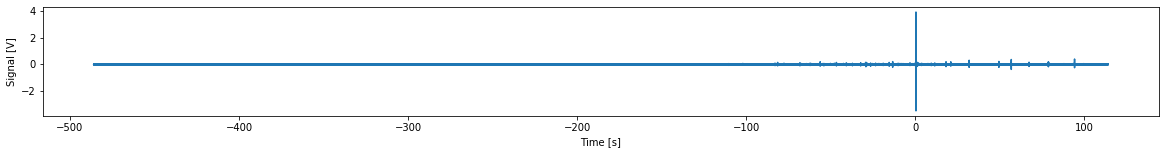

In [32]:
plot_sensor("Ramp_46", "15T_data", 1)

Flushing input history


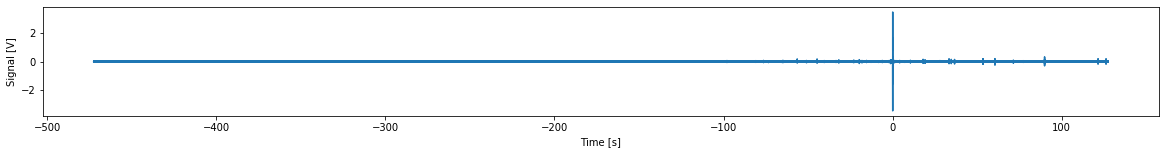

In [31]:
plot_sensor("Ramp_24", "15T_data", 1)

Flushing input history


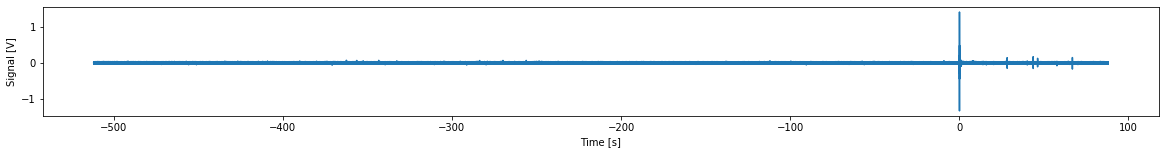

In [21]:
plot_sensor("Ramp_54", "15T_data", 0)

Flushing input history


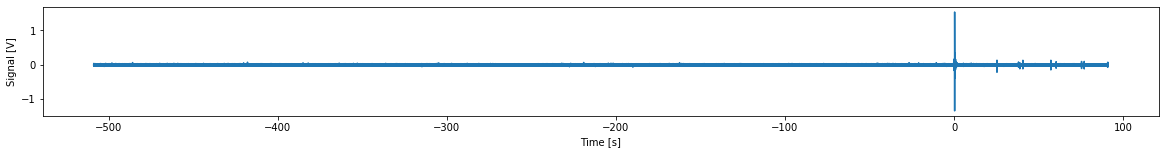

In [20]:
plot_sensor("Ramp_53", "15T_data", 0)

In [ ]:
plot_sensor("Ramp_50", "15T_data", 0)

Flushing input history


Flushing input history


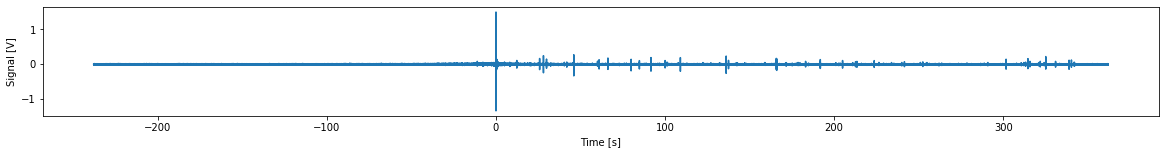

In [33]:
plot_sensor("Ramp_79", "15T_data", 0)

Flushing input history


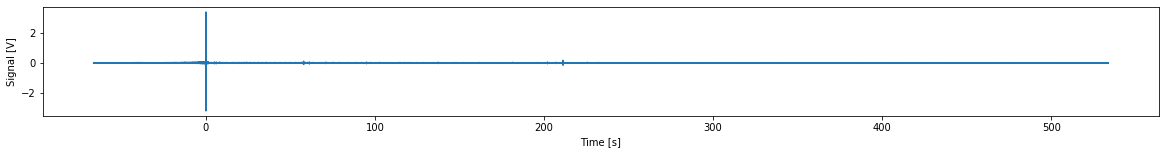

In [5]:
plot_sensor("Ramp_76", "15T_data", 1)

Flushing input history


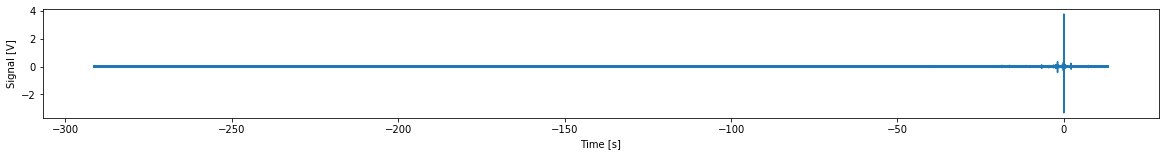

In [17]:
plot_sensor("Ramp_8", "15T_data", 1)

Flushing input history


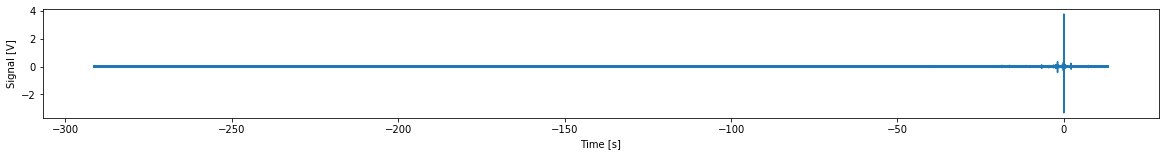

In [17]:
plot_sensor("Ramp_8", "15T_data", 1)

Flushing input history


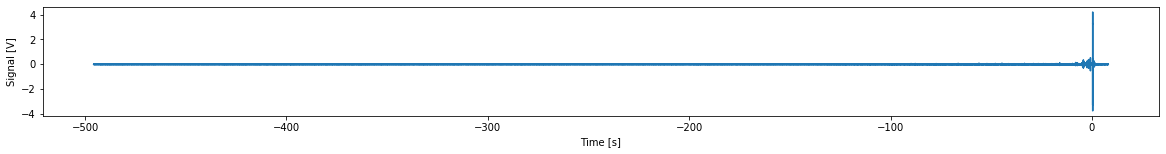

In [8]:
plot_sensor("Ramp_1", "15T_data", 1)

Flushing input history


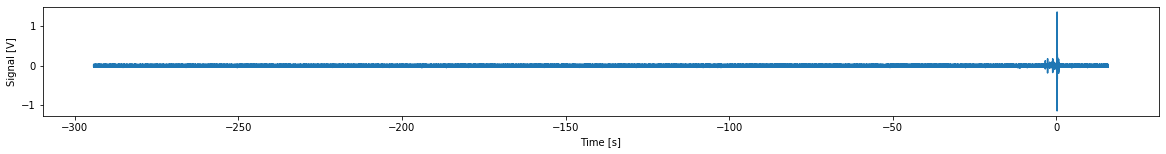

In [19]:
plot_sensor("Ramp_7", "15T_data", 0)

Flushing input history


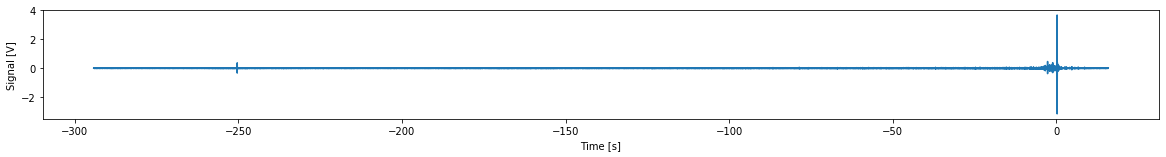

In [20]:
plot_sensor("Ramp_7", "15T_data", 1)

Flushing input history


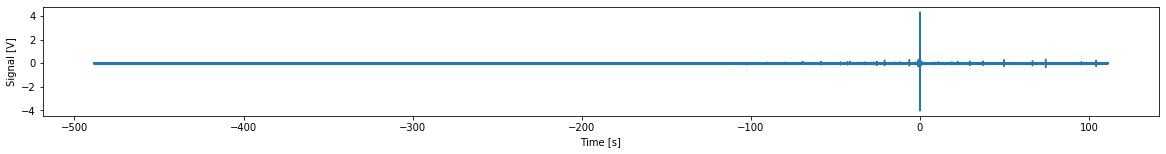

In [12]:
plot_sensor("Ramp_40", "15T_data", 1)

Flushing input history


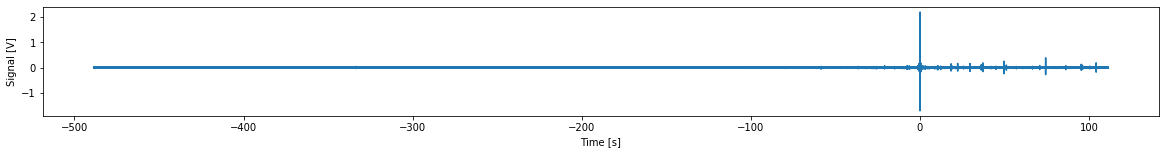

In [13]:
plot_sensor("Ramp_40", "15T_data", 0)

Flushing input history


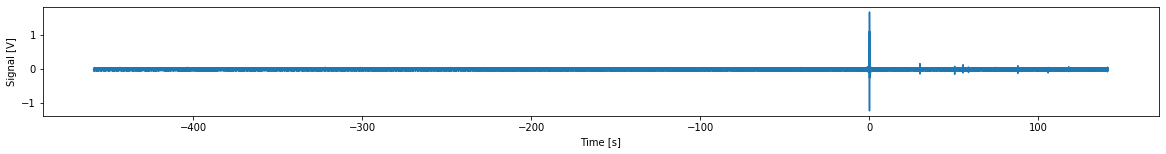

In [21]:
plot_sensor("Ramp_19", "15T_data", 0)

Flushing input history


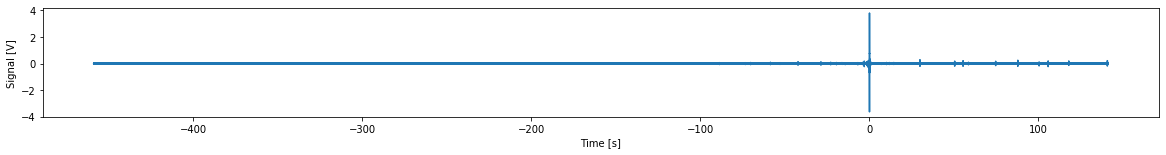

In [22]:
plot_sensor("Ramp_19", "15T_data", 1)

Flushing input history


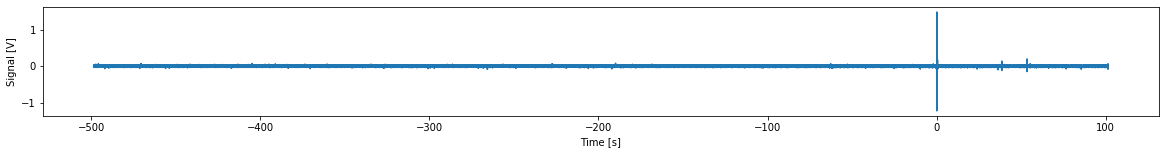

In [23]:
plot_sensor("Ramp_57", "15T_data", 0)

Flushing input history


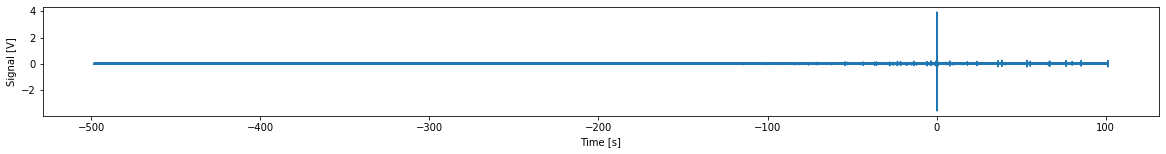

In [24]:
plot_sensor("Ramp_57", "15T_data", 1)

Flushing input history


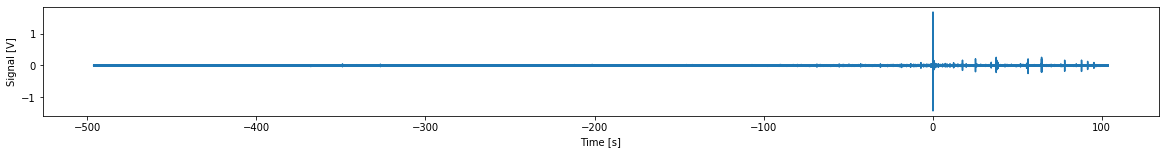

In [25]:
plot_sensor("Ramp_43", "15T_data", 0)

Flushing input history


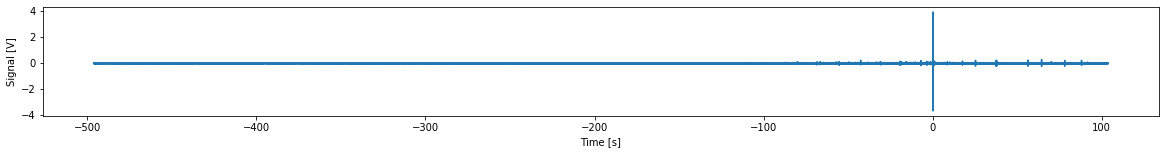

In [26]:
plot_sensor("Ramp_43", "15T_data", 1)

-----------

In [4]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from nptdms import TdmsFile #Process ramping file

#For building ML models
import keras
import keras.models as models
from keras.layers.core import Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.signal import find_peaks

np.random.seed(1337) # for reproducibility

Using TensorFlow backend.


In [10]:
def load_sensor(ramp_num, dir_path, sensor, time_range = None):
    """
    Load a sensor's data in the specified time range.
    
    Example usage: load_sensor("Ramp_7", "15T_data", 0, time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified sensor in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    df_data = pd.DataFrame(data = {"dummy": data[sensor, :][selection_index]})
    
    #Return the sensor's data accoring to the index 
    return df_data["dummy"]
    
    %reset -f in
    
def load_time_label(ramp_num, dir_path, time_range = None, window = 2000, step = 10):
    """
    Load a ramp time axis in a specified range.
    
    Example usage: load_time_label("Ramp_7", "15T_data", time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified time axis in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    %reset -f in
    
    return time_axis[selection_index][window-1::step]


#### Mean of abs(signal)
def generate_mean_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    #Load the data
    ai0 = load_sensor(ramp_num, dir_path, 0, time_range = time_range).abs().rolling(window=window).mean().to_numpy()[window-1::step]
    ai1 = load_sensor(ramp_num, dir_path, 1, time_range = time_range).abs().rolling(window=window).mean().to_numpy()[window-1::step]
    
    #Calculate the product
    product = ai0*ai1
    
    #Stack them together
    all_mean = np.vstack((ai0,ai1,product)).transpose()
    
    %reset -f in
    
    return all_mean

#### SD of signal
def generate_sd_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    #Load the data
    ai0 = load_sensor(ramp_num, dir_path, 0, time_range = time_range).rolling(window=window).std().to_numpy()[window-1::step]
    ai1 = load_sensor(ramp_num, dir_path, 1, time_range = time_range).rolling(window=window).std().to_numpy()[window-1::step]
    
    #Calculate the product
    product = ai0*ai1
    
    #Stack them together
    all_sd = np.vstack((ai0,ai1, product)).transpose()
    
    %reset -f in
    
    return all_sd

def generate_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    
    #Selection index due to using different window
    #selection_index = int((thres_win - window)/step)
    
    moving_mean = generate_mean_data(ramp_num, dir_path, time_range, window = window, step = step)
    moving_sd = generate_sd_data(ramp_num, dir_path, time_range, window = window, step = step)
    time_label = load_time_label(ramp_num, dir_path, time_range, window = window, step = step)
    
    all_data = np.concatenate((moving_mean, moving_sd), axis = 1)
    
    print("All data's shape: ", all_data.shape)
    
    %reset -f in
    
    return all_data, time_label

In [11]:
#####-------INCREMENTAL LEARNING IMPLEMENTATION-------######

def create_model():
    
    #================BUILD THE MODEL====================
    # Simple model
    # Simple model
    model = models.Sequential()

    model.add(Dense(4, activation = 'elu', kernel_initializer='glorot_uniform',
                    kernel_regularizer=regularizers.l2(0.0),
                    input_dim=6))

    model.add(Dense(2,activation='elu',
                    kernel_initializer='glorot_uniform'))

    model.add(Dense(4,activation='elu',
                    kernel_initializer='glorot_uniform'))

    model.add(Dense(6,
                    kernel_initializer='glorot_uniform'))

    model.compile(loss='mse',optimizer='adam')


    return model

def train(current_weights, X, time_axis, time_range):
    """Take a model, train it in the appropritate time range, return the new weights
    and its reconstruction loss distribution"""
    
    print("Training for section: ", time_range)
    #Select the appropriate time
    start_index = None
    
    if time_range[0] is not None:
        start_index = np.argmax(time_axis > time_range[0])
    else:
        start_index = 0
    
    if time_range[1] == 0:
        end_index = None
    else:
        end_index = np.argmax(time_axis > time_range[1])
    
    X_train = np.copy(X[start_index:end_index])
    time_train = time_axis[start_index:end_index]
    
    #Create model
    model = create_model()
    
    if current_weights:
        model.set_weights(current_weights)
    
    #Scaler initiation
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    #Train the model and extract new weights
    model.fit(X_train, X_train,
              batch_size=2000,
              epochs=30, verbose = 0)
    
    new_weights = model.get_weights()
    
    #Evaluate the losses and update the distribution
    X_pred = model.predict(X_train)
    loss = np.mean(np.abs(X_pred-X_train), axis = 1)
    
    #Plot the reconstruction loss
    plt.figure(figsize=(20,2))
    plt.plot(time_train, loss)
    plt.title("TRAINING reconstruction loss on {}".format(time_range))
    plt.xlabel("Time [s]")
    plt.show()
    
    #Take the mean of the log loss and update the mean threshold
    current_median = np.median(np.log10(loss))
    
    print("Finished training, median of the log(loss) is: ", current_median)
    
    return new_weights, current_median, scaler

def trigger(current_weights, X, time_axis, time_range, prev_median, scaler):
    
    print("Triggering for section: ", time_range)
    print("Using this median for triggering:", prev_median)
    
    #Select the appropriate time
    start_index = None
    
    if time_range[0] is not None:
        start_index = np.argmax(time_axis > time_range[0])
    else:
        start_index = 0
    
    if time_range[1] == 0:
        end_index = None
    else:
        end_index = np.argmax(time_axis > time_range[1])
    
    time_test = time_axis[start_index:end_index]
    X_test = np.copy(X[start_index:end_index])
    
    X_test = scaler.transform(X_test) #Scale the current data
    
    #Create model
    model = create_model()
    model.set_weights(current_weights)
        
    #Find the test loss (doing this in parallel for the sake of simulation), but in a practical system
    #Ideally we need to do inference every single data point come in
    X_pred_test = model.predict(X_test)
    test_loss = np.mean(np.abs(X_pred_test-X_test), axis = 1)
    
    
    #Plot the reconstruction loss just to check
    plt.figure(figsize=(20,2))
    plt.plot(time_test, test_loss)
    plt.title("Reconstruction loss on {}".format(time_range))
    plt.xlabel("Time [s]")
    plt.show()
    
    #Quantify how much each data point is far away from the distribution
    log_test_loss = np.log10(test_loss) - prev_median
    
    #Find the trigger time
    trigger_index = np.argmax(log_test_loss > 1.6)
    
    if  trigger_index != 0:
        #Plot the triggered time
        plt.figure(figsize=(20,2))
        plt.plot(time_test, log_test_loss, color = "firebrick")
        plt.title("Log reconstruction loss on {}".format(time_range))
        plt.xlabel("Time [s]")
        
        #Trigger time
        plt.vlines(time_test[trigger_index], log_test_loss.min(), log_test_loss.max(), color = "blue", linestyles = "dashed", label = "Trigger time")
        plt.legend(loc = "upper left")
        
        
        ### Find trigger times
        peaks, _ = find_peaks(log_test_loss, height=1.6, distance = 5000)
        print("Other trigger time: ", time_test[peaks])
        print("Their log loss values are: ", log_test_loss[peaks])
        
        for i in range(len(peaks)):
            plt.vlines(time_test[peaks[i]], log_test_loss.min(), log_test_loss.max(), color = "blue", linestyles = "dashed")
            
        plt.show()
        
        return list(time_test[peaks])
    
    else:
        return None
    

def simulation(ramp_num, dir_path, section_size, time_range):
    
    #Load data and create the model
    X, time_axis = generate_data(ramp_num, dir_path, time_range = time_range, window = 2000, step = 10)
    
    #For updating model
    current_weights = None
    new_weights = None
    
    #For keeping track of distribution history
    prev_median = None
    updated_median = None
    
    #Keeping track of scaler after training
    past_scaler = None
    
    #Calculate number of sections
    num_section = int(abs(time_range[0])/section_size)
    print("Number of sections:", num_section)
    
    #Keeping log of all the trigger time
    trigger_log = []
    
    #Sequentially go through the data
    for i in range(num_section):
        
        print("Entering sections: ", (-section_size*(num_section - i), -section_size*(num_section - i - 1)))
        print("-------->")
        
        if i == 0:
            continue
        elif i == 1:
            #Train on the first segment
            time_range = (None, -section_size*(num_section - i))
            new_weights, updated_median, new_scaler = train(current_weights, X, time_axis, time_range)
        else:
            
            #Set previous distrubution to the newly trained disttribution
            prev_median = updated_median
            current_scaler = new_scaler
            current_weights = new_weights
            
            #Selecting appropriate time range for training and triggering
            train_time_range = (-section_size*(num_section - i + 1), -section_size*(num_section - i))
            trigger_time_range = (-section_size*(num_section - i), -section_size*(num_section - i - 1))
            
            #Train and predict simutaneously
            new_weights, updated_median, new_scaler = train(current_weights, X, time_axis, train_time_range)
            trigger_time = trigger(current_weights, X, time_axis, trigger_time_range, prev_median, current_scaler)
            
            if trigger_time is not None:
                print("Triggered at: ", trigger_time)
                trigger_log.extend(trigger_time)
        
        print("<--------")
        
    print("Finished simulation, all the triggered times are: ", trigger_log)

In [12]:
simulation("Ramp_2", "15T_data", 10,  time_range = (-50,0))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60000004 but corresponding boolean dimension is 27460870

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (1999800, 6)
Flushing input history
Number of sections: 20
Entering sections:  (-200, -190)
-------->
Entering sections:  (-190, -180)
-------->
Training for section:  (None, -190)


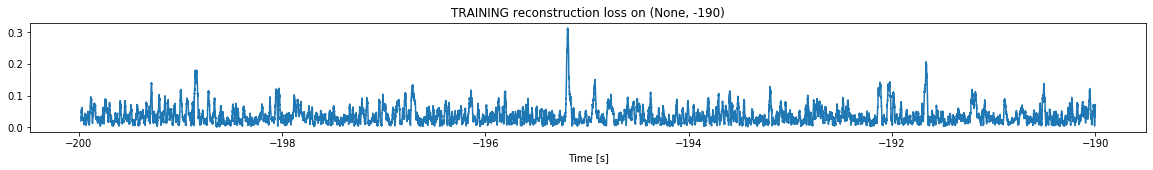

Finished training, median of the log(loss) is:  -1.530262846232997
<--------
Entering sections:  (-180, -170)
-------->
Training for section:  (-190, -180)


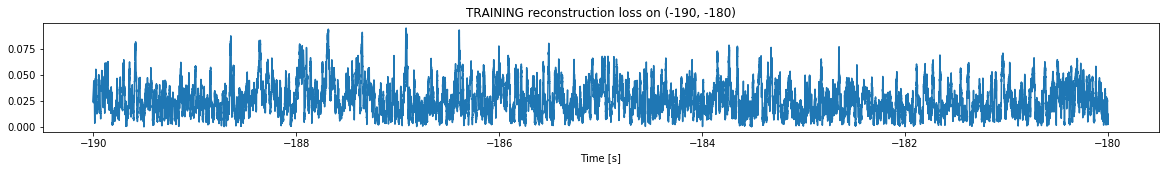

Finished training, median of the log(loss) is:  -1.6238346841912215
Triggering for section:  (-180, -170)
Using this median for triggering: -1.530262846232997


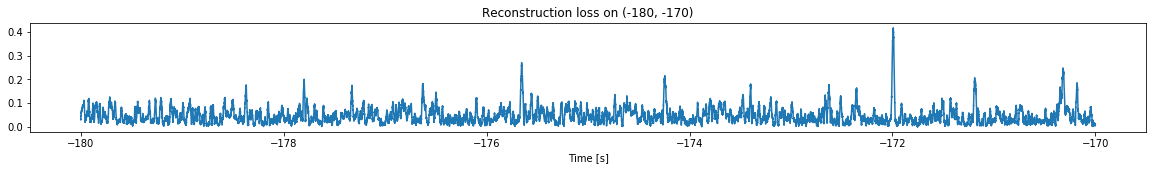

<--------
Entering sections:  (-170, -160)
-------->
Training for section:  (-180, -170)


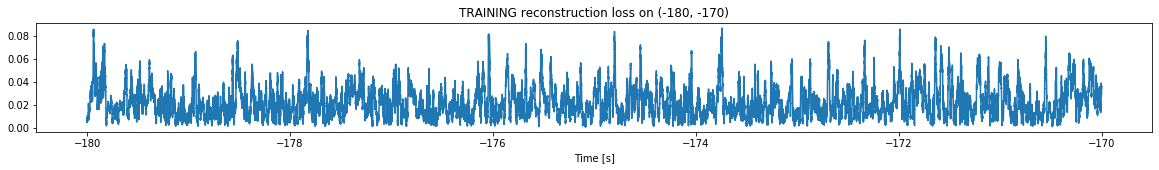

Finished training, median of the log(loss) is:  -1.7231396987268195
Triggering for section:  (-170, -160)
Using this median for triggering: -1.6238346841912215


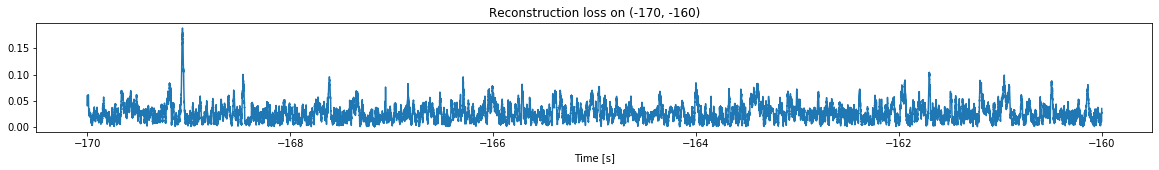

<--------
Entering sections:  (-160, -150)
-------->
Training for section:  (-170, -160)


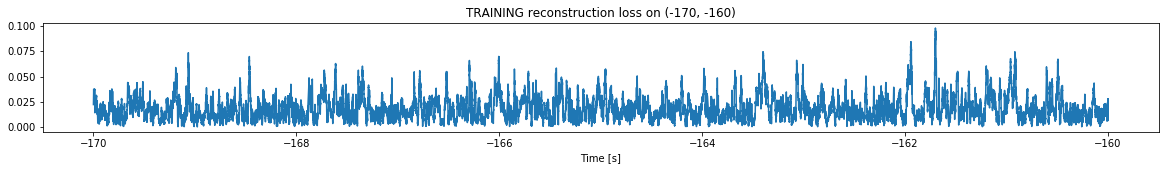

Finished training, median of the log(loss) is:  -1.7920683688311332
Triggering for section:  (-160, -150)
Using this median for triggering: -1.7231396987268195


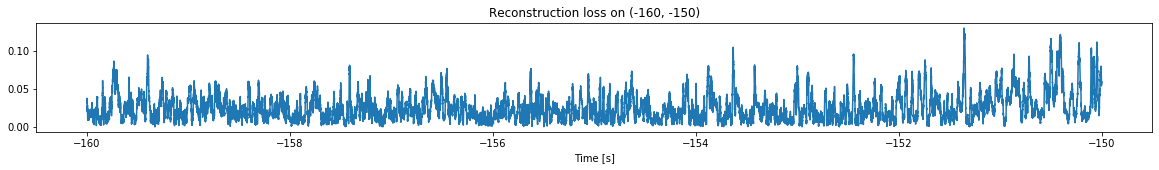

<--------
Entering sections:  (-150, -140)
-------->
Training for section:  (-160, -150)


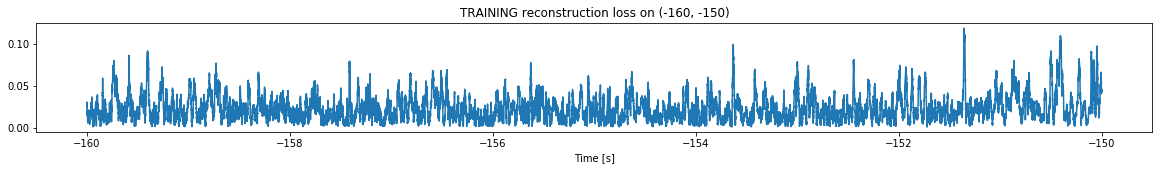

Finished training, median of the log(loss) is:  -1.7111797960079458
Triggering for section:  (-150, -140)
Using this median for triggering: -1.7920683688311332


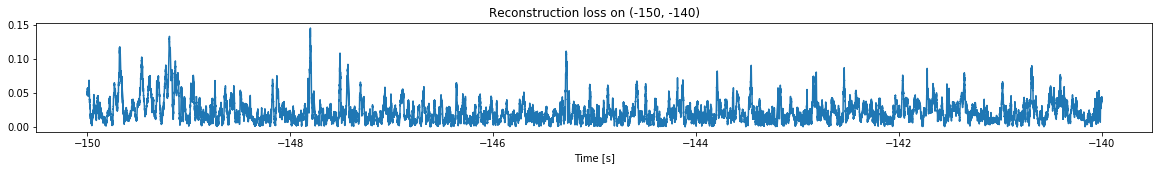

<--------
Entering sections:  (-140, -130)
-------->
Training for section:  (-150, -140)


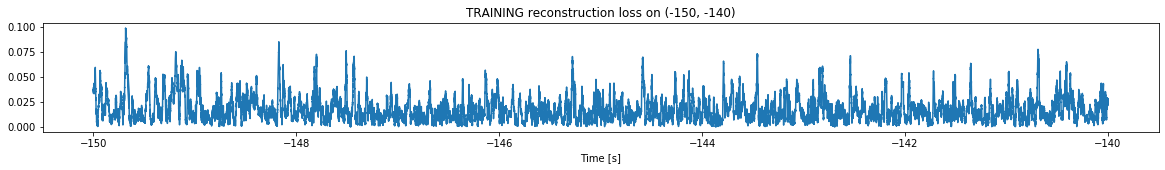

Finished training, median of the log(loss) is:  -1.8328871546609262
Triggering for section:  (-140, -130)
Using this median for triggering: -1.7111797960079458


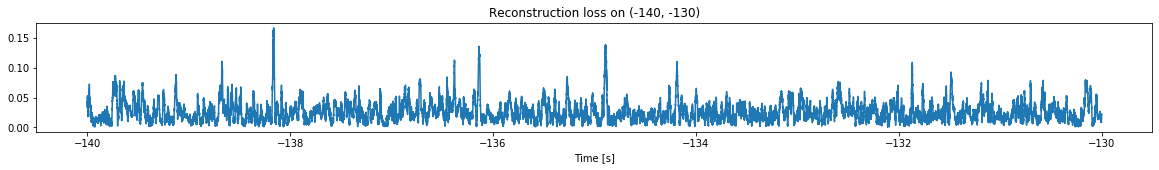

<--------
Entering sections:  (-130, -120)
-------->
Training for section:  (-140, -130)


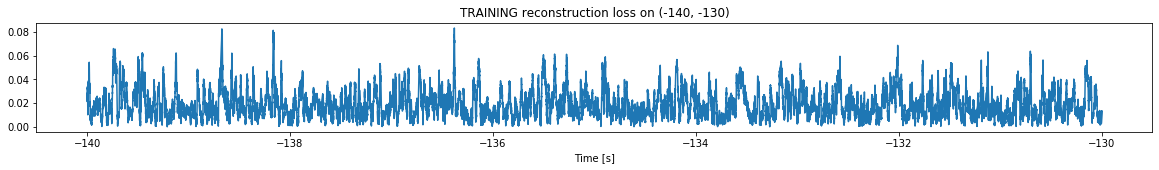

Finished training, median of the log(loss) is:  -1.7761338872079873
Triggering for section:  (-130, -120)
Using this median for triggering: -1.8328871546609262


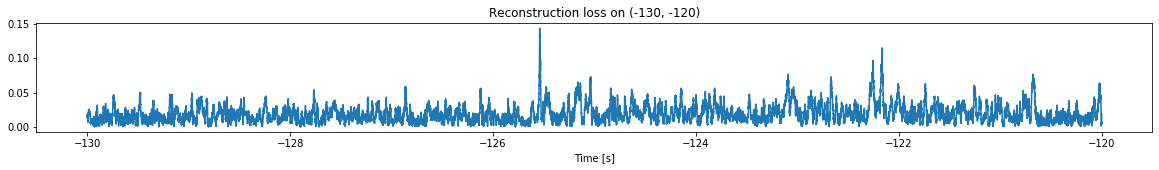

<--------
Entering sections:  (-120, -110)
-------->
Training for section:  (-130, -120)


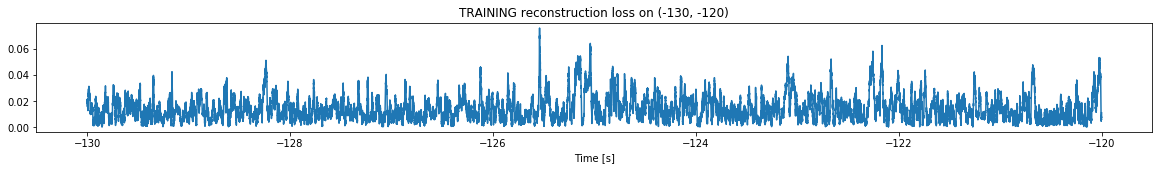

Finished training, median of the log(loss) is:  -1.9167889698713056
Triggering for section:  (-120, -110)
Using this median for triggering: -1.7761338872079873


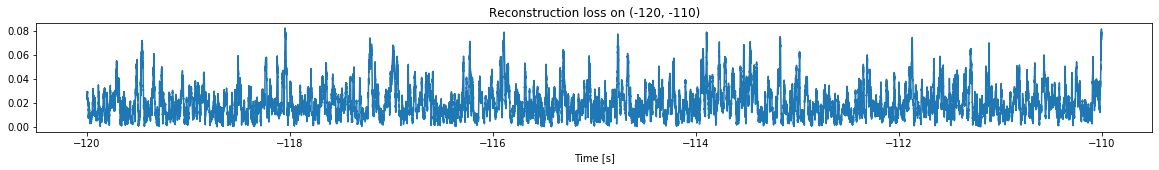

<--------
Entering sections:  (-110, -100)
-------->
Training for section:  (-120, -110)


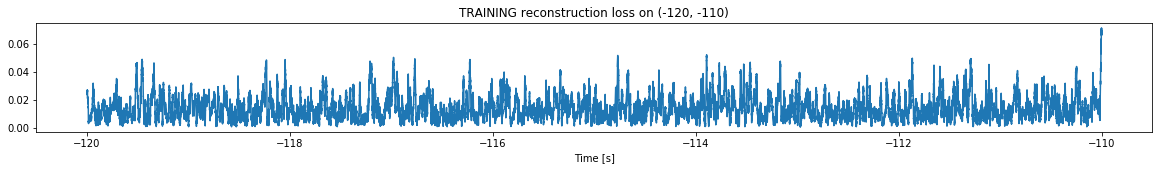

Finished training, median of the log(loss) is:  -1.9040555091886389
Triggering for section:  (-110, -100)
Using this median for triggering: -1.9167889698713056


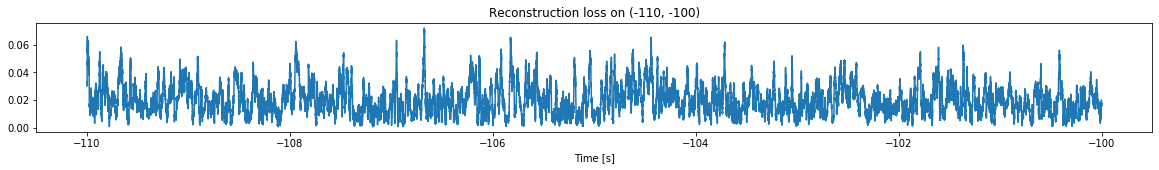

<--------
Entering sections:  (-100, -90)
-------->
Training for section:  (-110, -100)


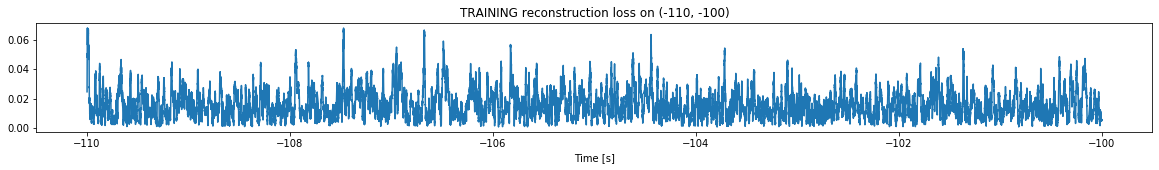

Finished training, median of the log(loss) is:  -1.85428685414975
Triggering for section:  (-100, -90)
Using this median for triggering: -1.9040555091886389


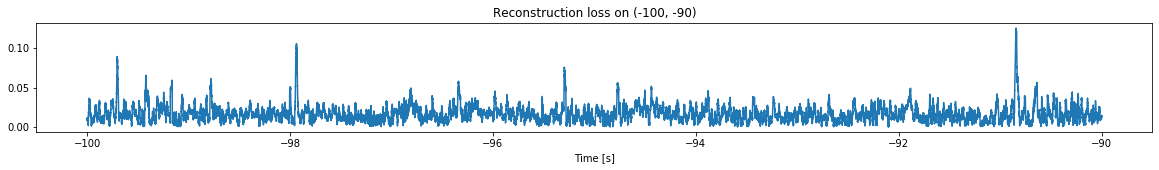

<--------
Entering sections:  (-90, -80)
-------->
Training for section:  (-100, -90)


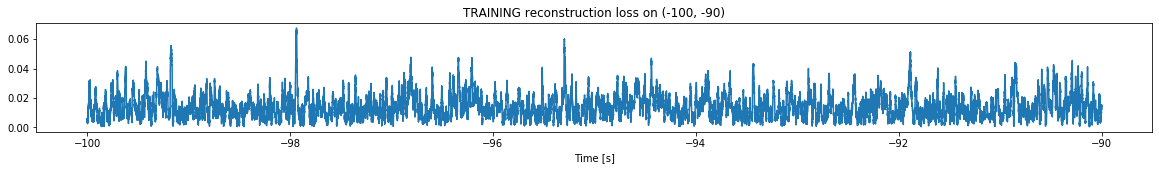

Finished training, median of the log(loss) is:  -1.8980830060341065
Triggering for section:  (-90, -80)
Using this median for triggering: -1.85428685414975


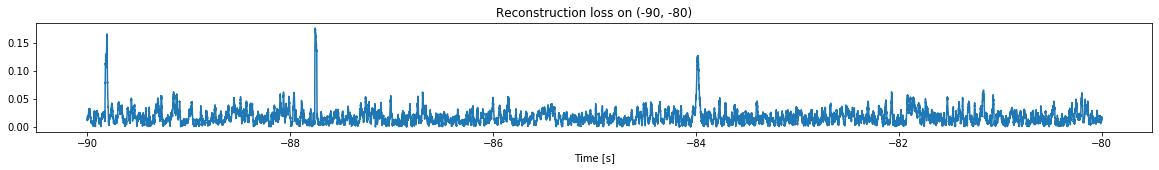

<--------
Entering sections:  (-80, -70)
-------->
Training for section:  (-90, -80)


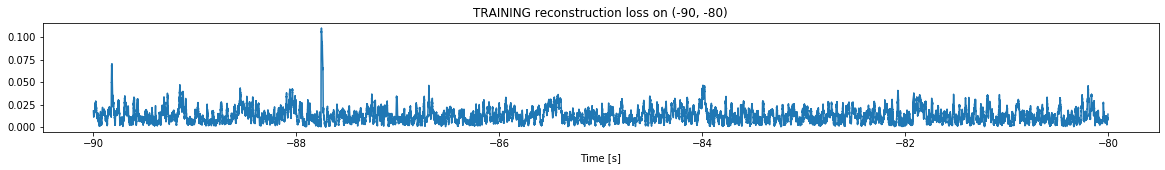

Finished training, median of the log(loss) is:  -1.9423048059800978
Triggering for section:  (-80, -70)
Using this median for triggering: -1.8980830060341065


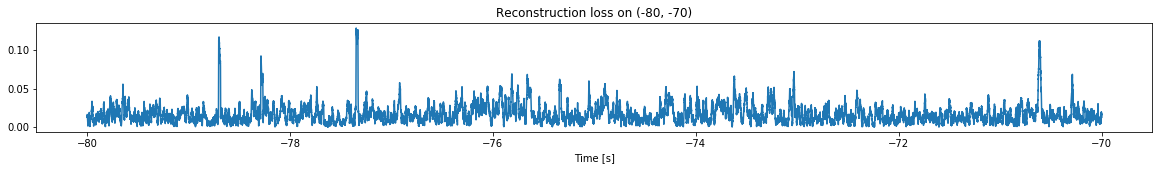

<--------
Entering sections:  (-70, -60)
-------->
Training for section:  (-80, -70)


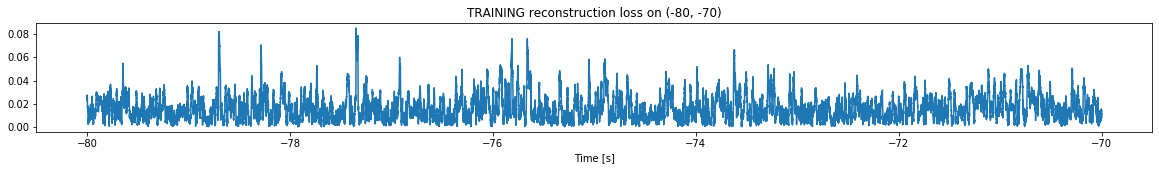

Finished training, median of the log(loss) is:  -1.8466081444773923
Triggering for section:  (-70, -60)
Using this median for triggering: -1.9423048059800978


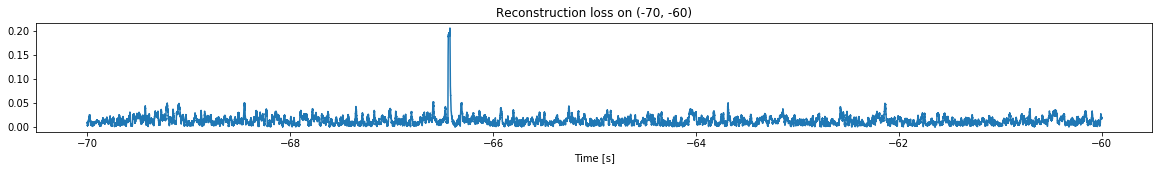

<--------
Entering sections:  (-60, -50)
-------->
Training for section:  (-70, -60)


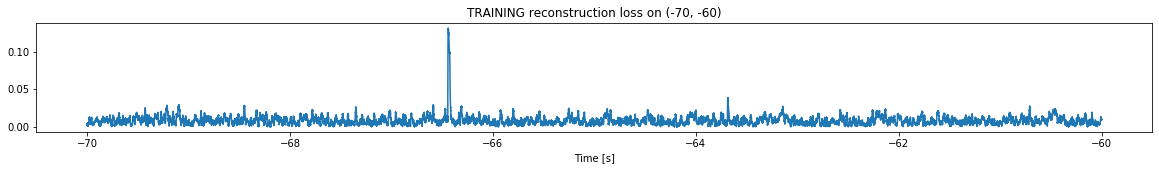

Finished training, median of the log(loss) is:  -2.1042715228250866
Triggering for section:  (-60, -50)
Using this median for triggering: -1.8466081444773923


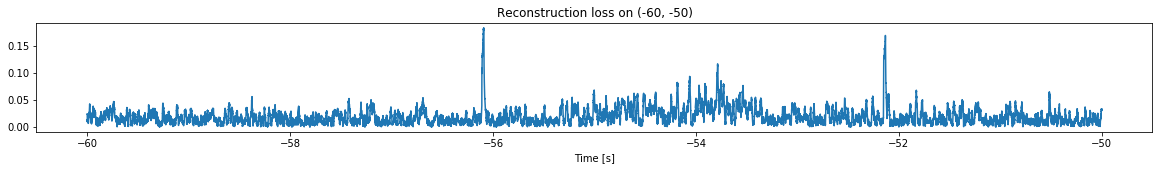

<--------
Entering sections:  (-50, -40)
-------->
Training for section:  (-60, -50)


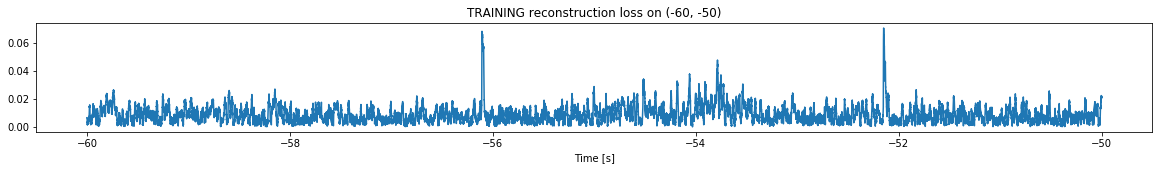

Finished training, median of the log(loss) is:  -2.1059474984493978
Triggering for section:  (-50, -40)
Using this median for triggering: -2.1042715228250866


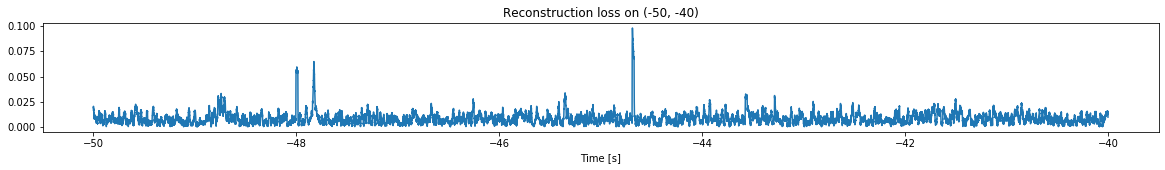

<--------
Entering sections:  (-40, -30)
-------->
Training for section:  (-50, -40)


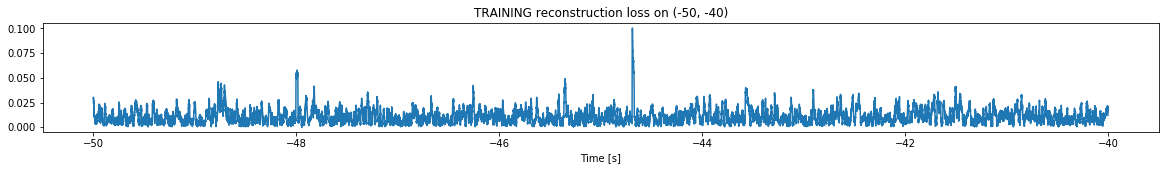

Finished training, median of the log(loss) is:  -2.0111064989002436
Triggering for section:  (-40, -30)
Using this median for triggering: -2.1059474984493978


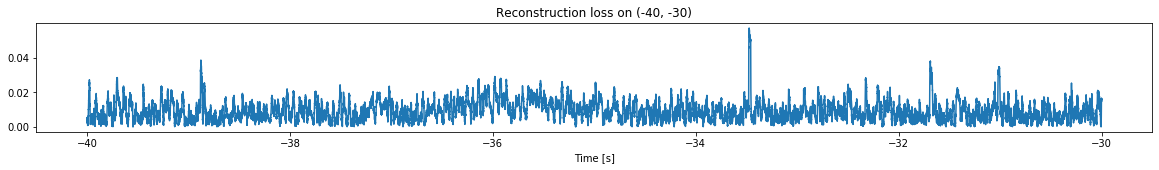

<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


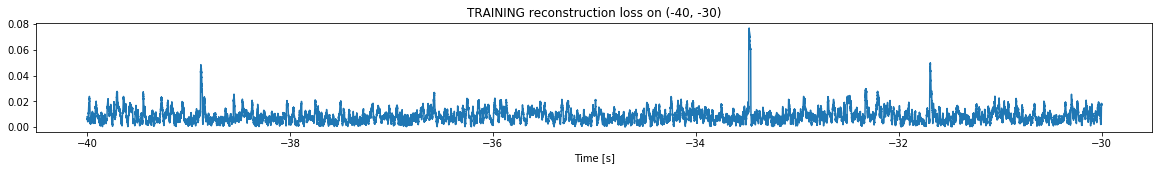

Finished training, median of the log(loss) is:  -2.10932725897964
Triggering for section:  (-30, -20)
Using this median for triggering: -2.0111064989002436


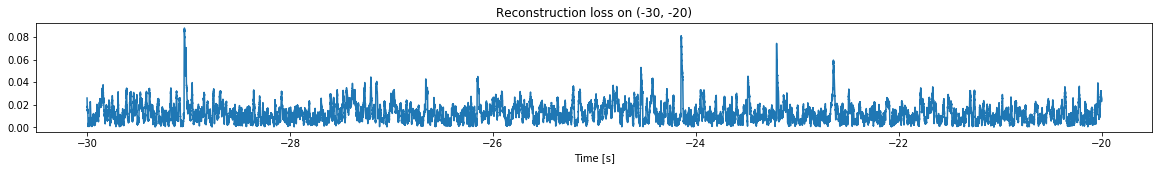

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


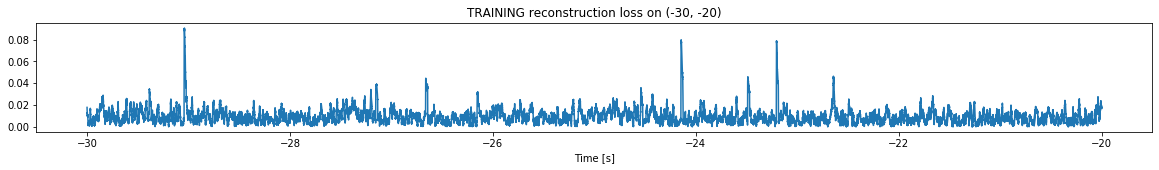

Finished training, median of the log(loss) is:  -2.0673656486993277
Triggering for section:  (-20, -10)
Using this median for triggering: -2.10932725897964


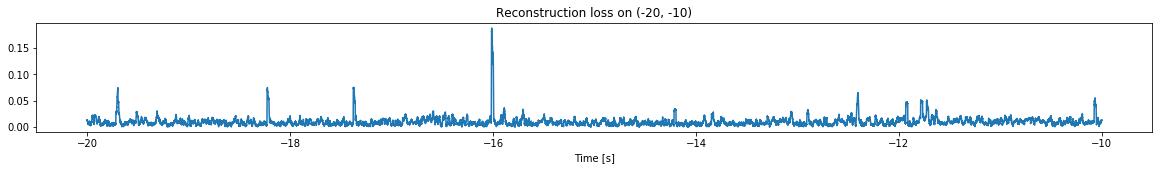

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


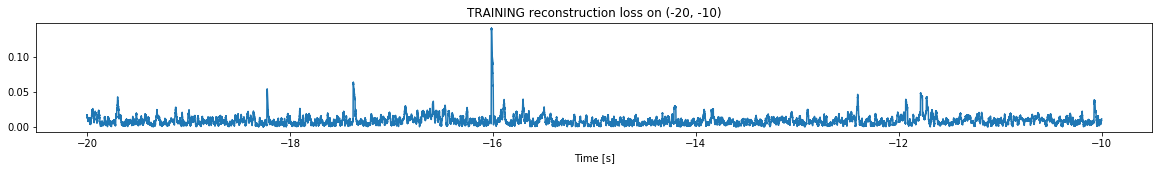

Finished training, median of the log(loss) is:  -2.117875209163449
Triggering for section:  (-10, 0)
Using this median for triggering: -2.0673656486993277


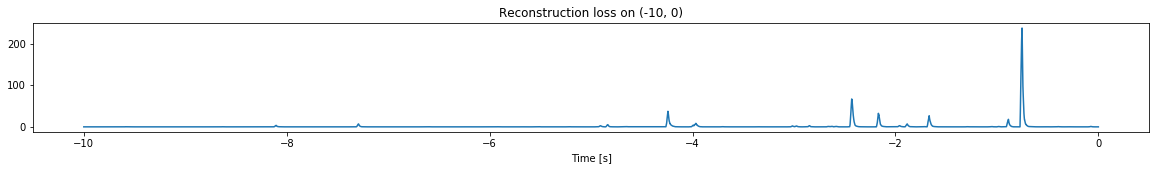

Other trigger time:  [-8.10439   -7.29349   -5.9109898 -4.83739   -4.24249   -3.6989899
 -3.0147898 -2.43099   -1.6677899 -0.75219   -0.07489  ]
Their log loss values are:  [2.62796706 2.92158973 1.66424851 2.79337933 3.64075616 1.69869737
 2.42034656 3.89471913 3.4953913  4.4441503  2.06363336]


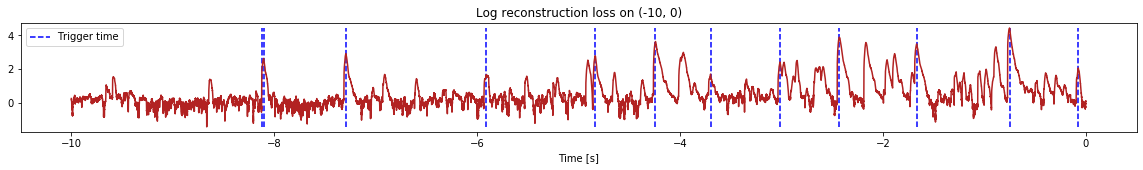

Triggered at:  [-8.10439, -7.29349, -5.9109898, -4.83739, -4.24249, -3.6989899, -3.0147898, -2.43099, -1.6677899, -0.75219, -0.074889995]
<--------
Finished simulation, all the triggered times are:  [-8.10439, -7.29349, -5.9109898, -4.83739, -4.24249, -3.6989899, -3.0147898, -2.43099, -1.6677899, -0.75219, -0.074889995]


In [7]:
simulation("Ramp_1", "15T_data", 10,  time_range = (-200,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


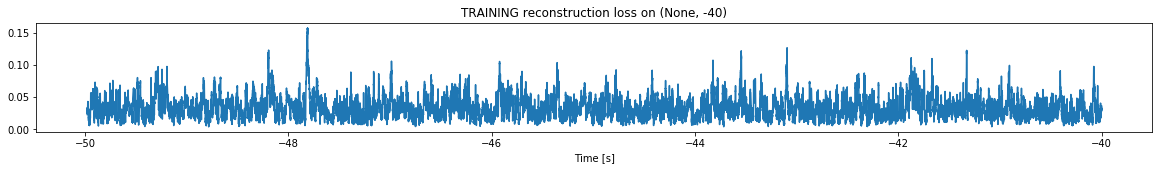

Finished training, median of the log(loss) is:  -1.5260979144236453
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


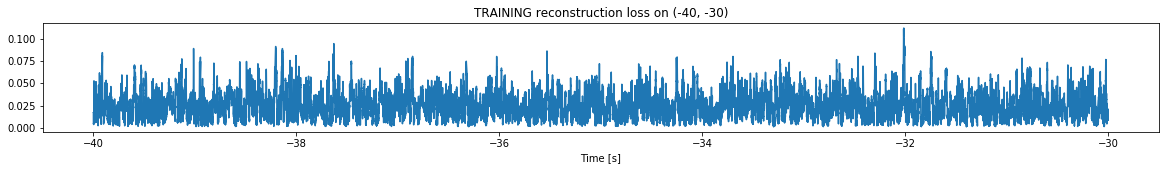

Finished training, median of the log(loss) is:  -1.6385263023522665
Triggering for section:  (-30, -20)
Using this median for triggering: -1.5260979144236453


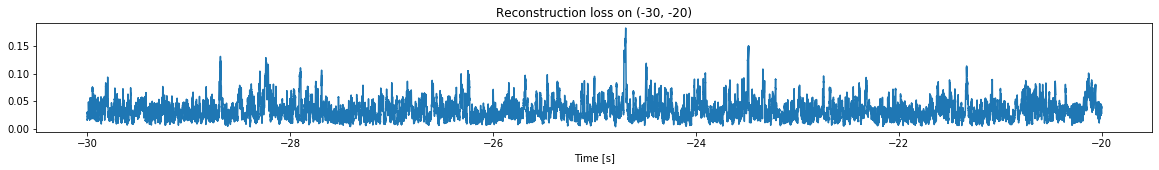

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


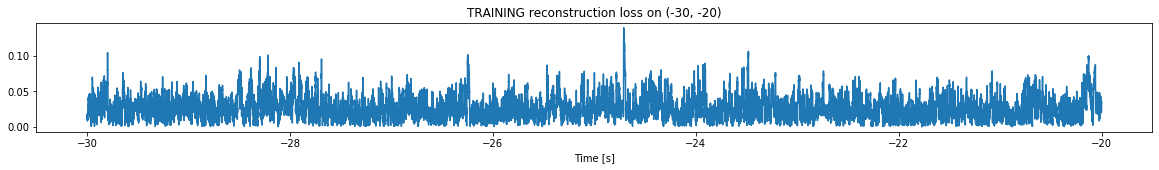

Finished training, median of the log(loss) is:  -1.6280819939127165
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6385263023522665


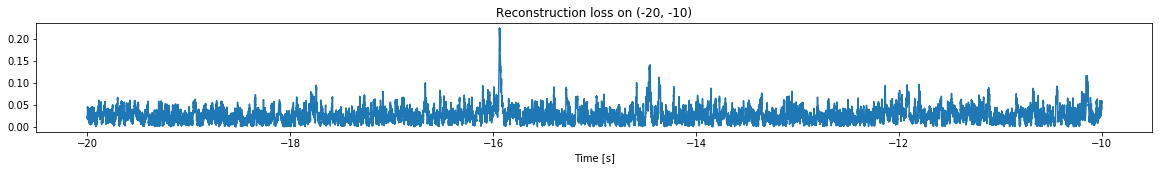

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


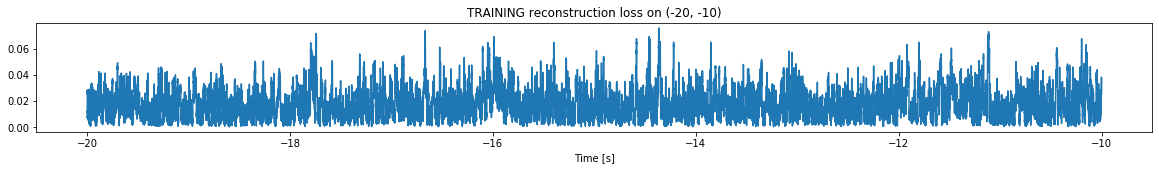

Finished training, median of the log(loss) is:  -1.7934564535137363
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6280819939127165


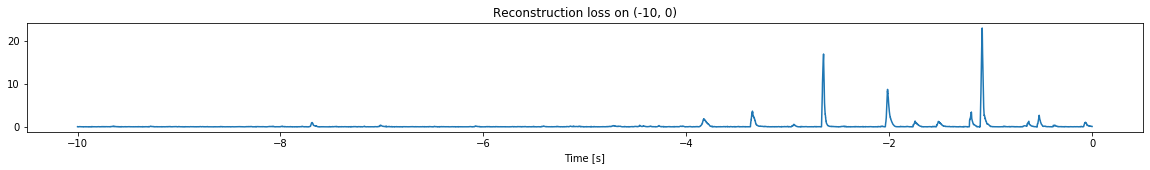

Other trigger time:  [-7.6875     -3.3476     -2.6469998  -2.0161     -1.0834     -0.52169997]
Their log loss values are:  [1.62874115 2.19255059 2.85785071 2.56941665 2.99049701 2.05849779]


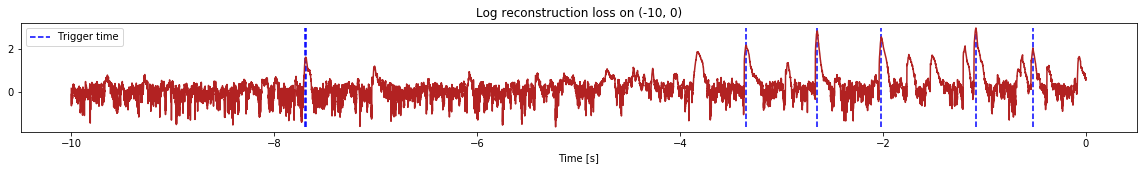

Triggered at:  [-7.6875, -3.3476, -2.6469998, -2.0161, -1.0834, -0.52169997]
<--------
Finished simulation, all the triggered times are:  [-7.6875, -3.3476, -2.6469998, -2.0161, -1.0834, -0.52169997]


In [63]:
simulation("Ramp_7", "15T_data", 10,  time_range = (-50,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


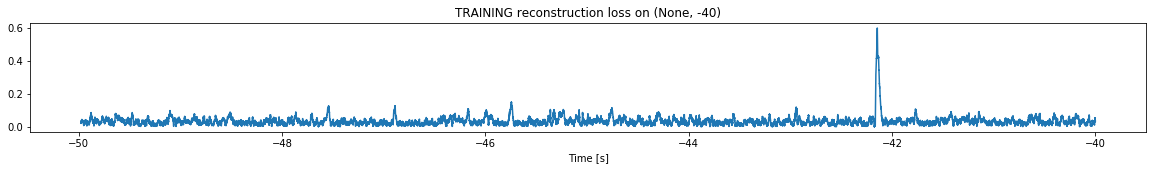

Finished training, median of the log(loss) is:  -1.5072007385206485
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


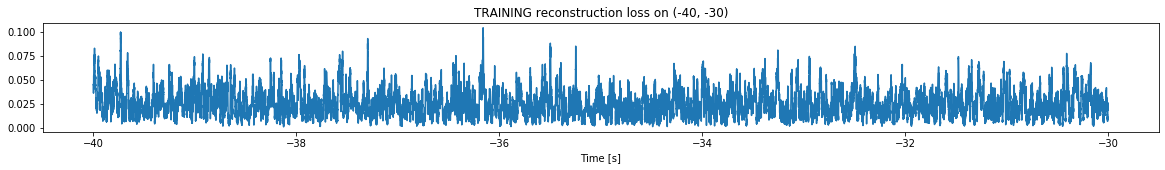

Finished training, median of the log(loss) is:  -1.6372138995399275
Triggering for section:  (-30, -20)
Using this median for triggering: -1.5072007385206485


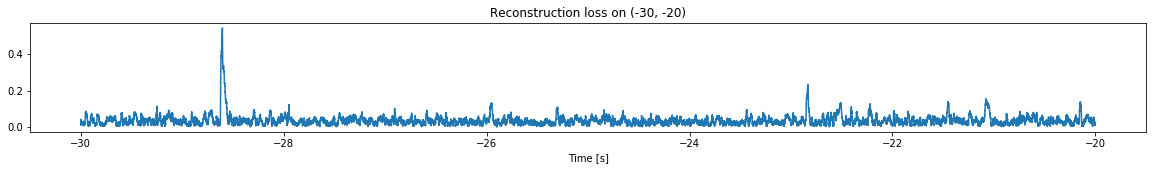

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


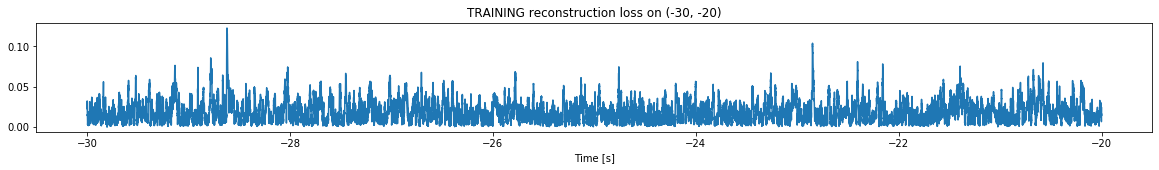

Finished training, median of the log(loss) is:  -1.7887970506024333
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6372138995399275


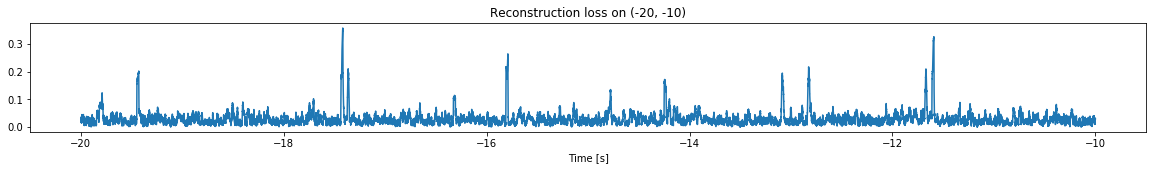

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


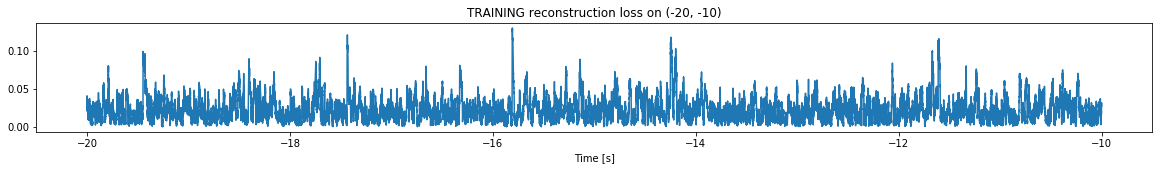

Finished training, median of the log(loss) is:  -1.693493954182268
Triggering for section:  (-10, 0)
Using this median for triggering: -1.7887970506024333


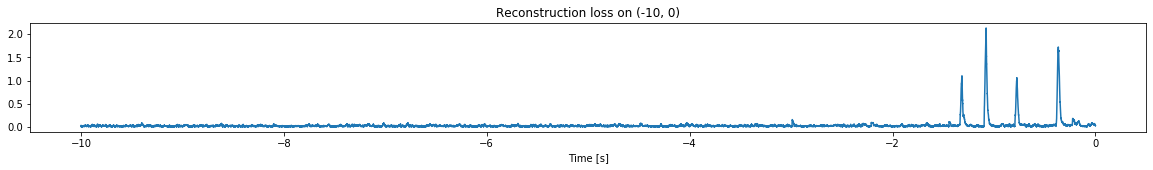

Other trigger time:  [-1.0781 -0.3664]
Their log loss values are:  [2.11800387 2.02538791]


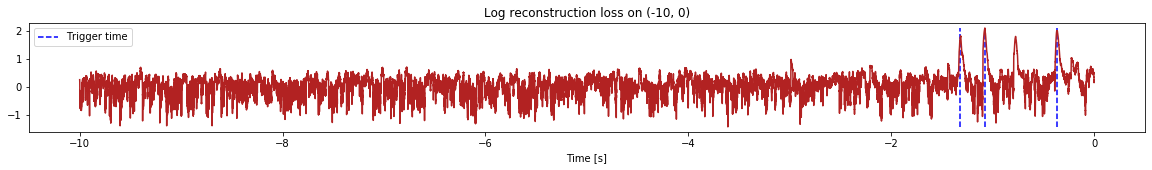

Triggered at:  [-1.0781, -0.3664]
<--------
Finished simulation, all the triggered times are:  [-1.0781, -0.3664]


In [64]:
simulation("Ramp_19", "15T_data", 10,  time_range = (-50,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


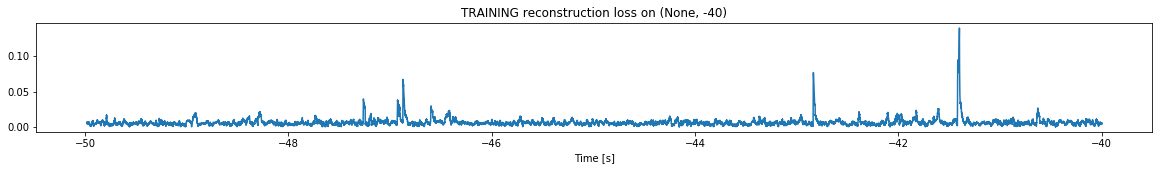

Finished training, median of the log(loss) is:  -2.249846702653257
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


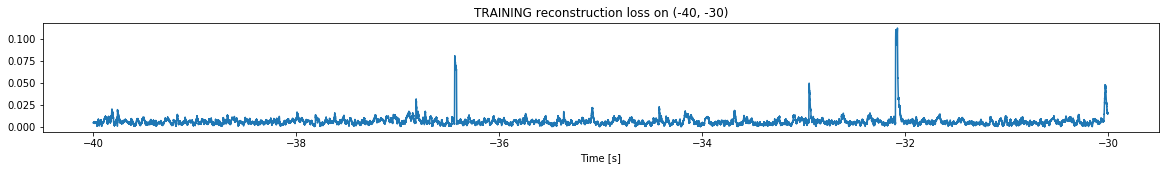

Finished training, median of the log(loss) is:  -2.2500013798456244
Triggering for section:  (-30, -20)
Using this median for triggering: -2.249846702653257


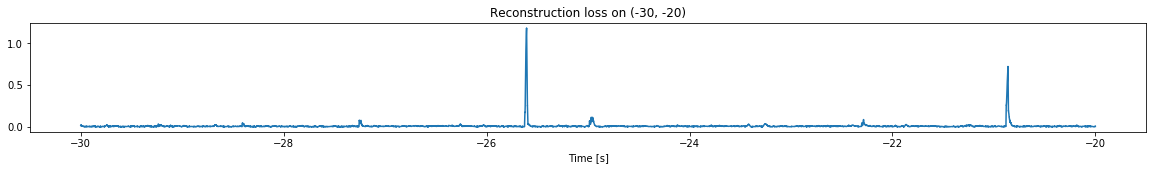

Other trigger time:  [-25.605999 -20.8611  ]
Their log loss values are:  [2.32330986 2.10939263]


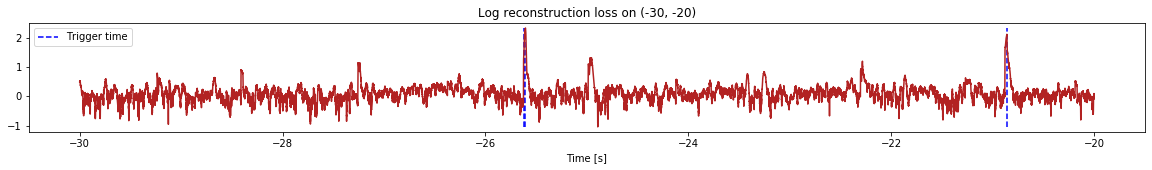

Triggered at:  [-25.605999, -20.8611]
<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


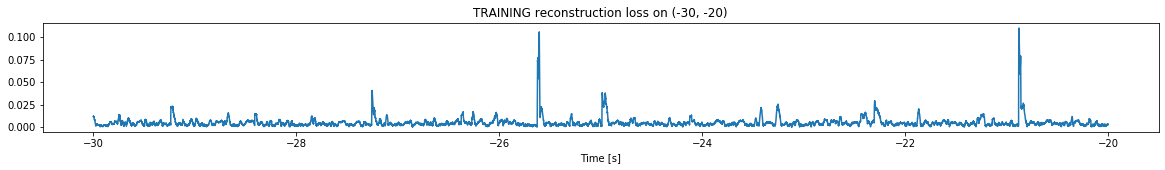

Finished training, median of the log(loss) is:  -2.4322605977970264
Triggering for section:  (-20, -10)
Using this median for triggering: -2.2500013798456244


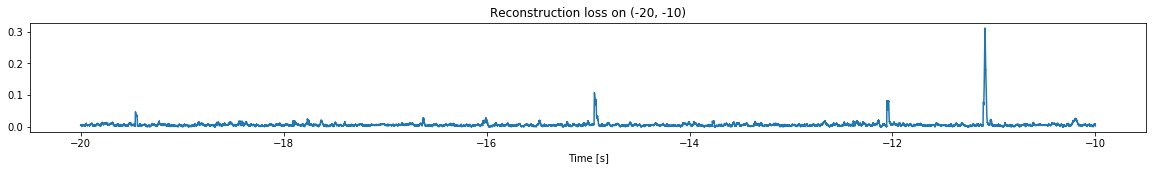

Other trigger time:  [-11.0869]
Their log loss values are:  [1.7431879]


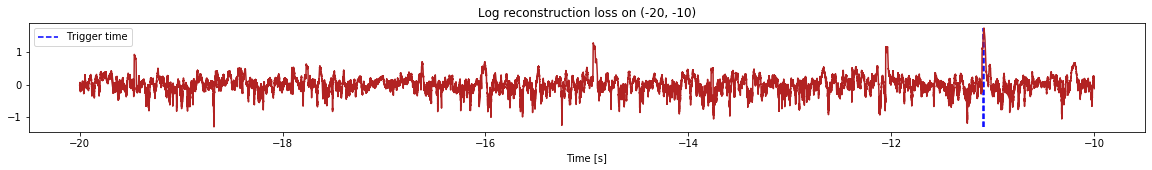

Triggered at:  [-11.0869]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


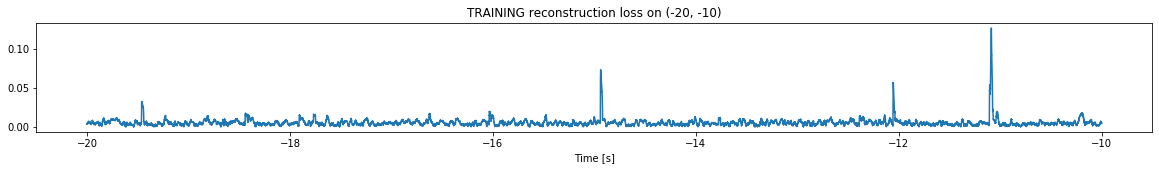

Finished training, median of the log(loss) is:  -2.311252523200701
Triggering for section:  (-10, 0)
Using this median for triggering: -2.4322605977970264


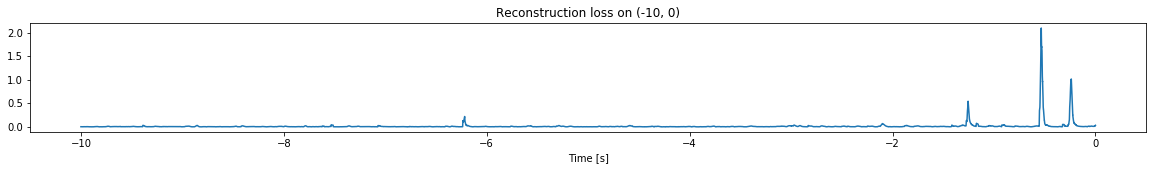

Other trigger time:  [-6.2176     -1.2555     -0.53459996]
Their log loss values are:  [1.77444861 2.16795098 2.75434379]


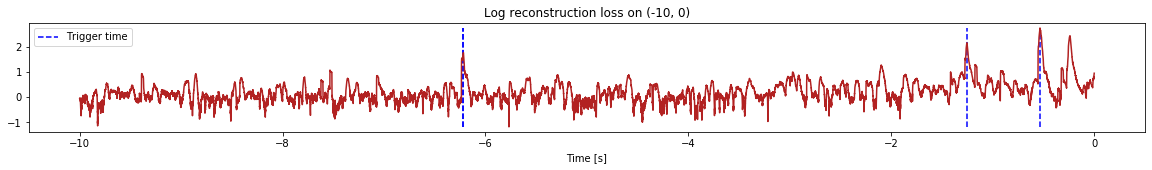

Triggered at:  [-6.2176, -1.2555, -0.53459996]
<--------
Finished simulation, all the triggered times are:  [-25.605999, -20.8611, -11.0869, -6.2176, -1.2555, -0.53459996]


In [65]:
simulation("Ramp_40", "15T_data", 10,  time_range = (-50,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


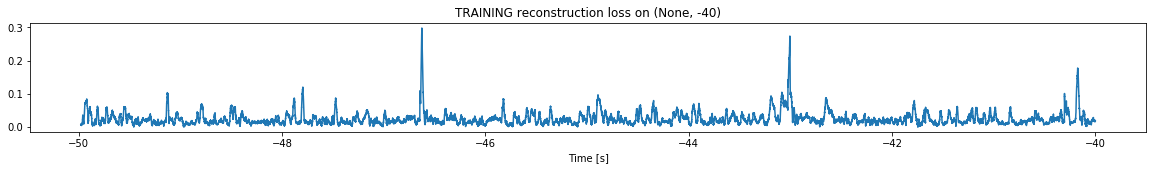

Finished training, median of the log(loss) is:  -1.6991049840620733
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


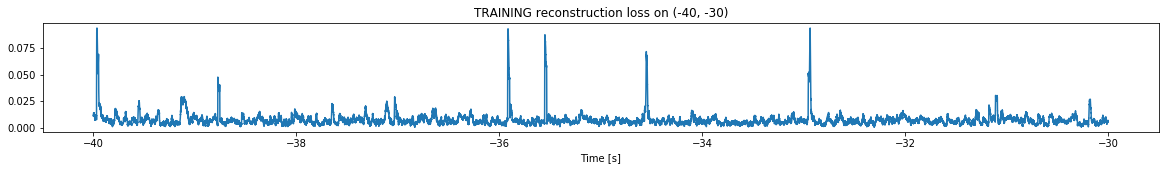

Finished training, median of the log(loss) is:  -2.1996446692419127
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6991049840620733


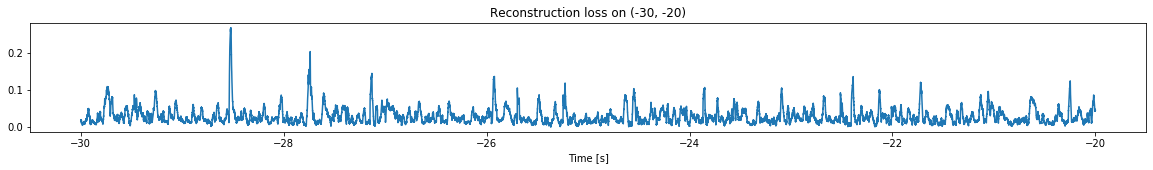

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


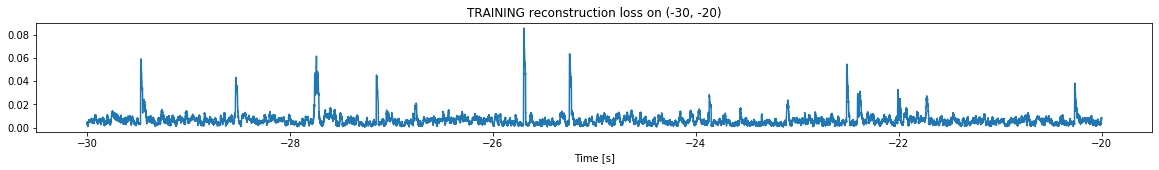

Finished training, median of the log(loss) is:  -2.2637557082078508
Triggering for section:  (-20, -10)
Using this median for triggering: -2.1996446692419127


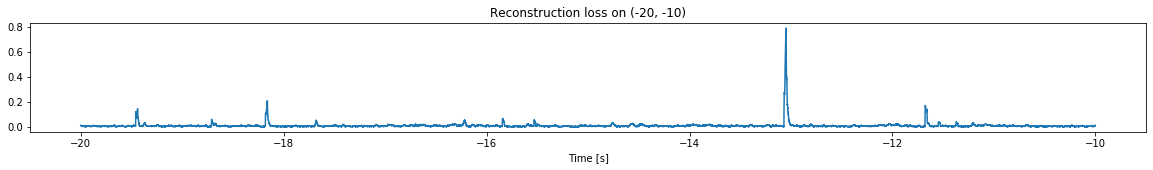

Other trigger time:  [-13.0497]
Their log loss values are:  [2.09795756]


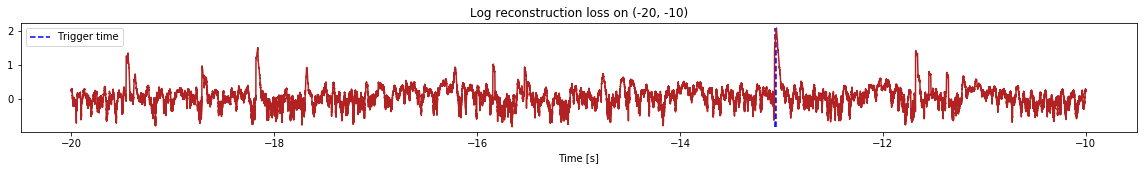

Triggered at:  [-13.0497]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


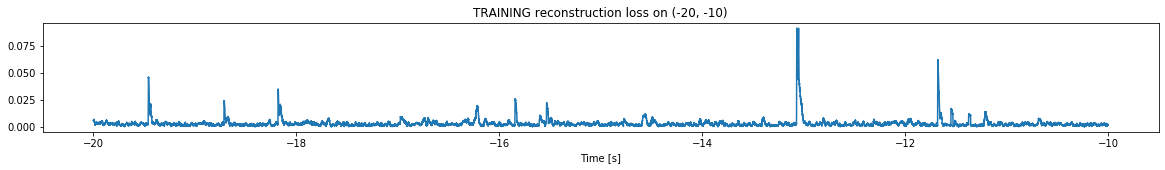

Finished training, median of the log(loss) is:  -2.5867466635810774
Triggering for section:  (-10, 0)
Using this median for triggering: -2.2637557082078508


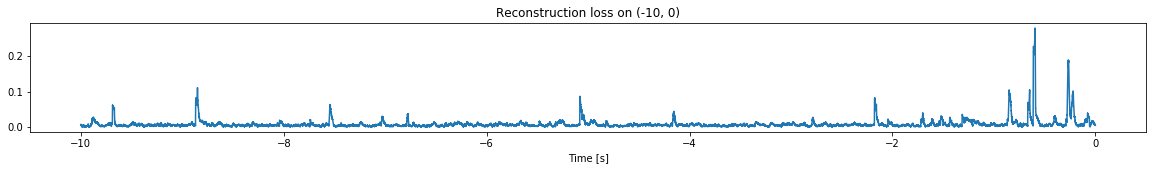

Other trigger time:  [-0.5937]
Their log loss values are:  [1.71115503]


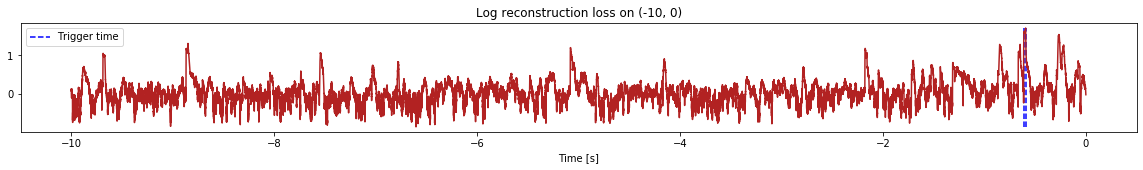

Triggered at:  [-0.5937]
<--------
Finished simulation, all the triggered times are:  [-13.0497, -0.5937]


In [66]:
simulation("Ramp_42", "15T_data", 10,  time_range = (-50,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


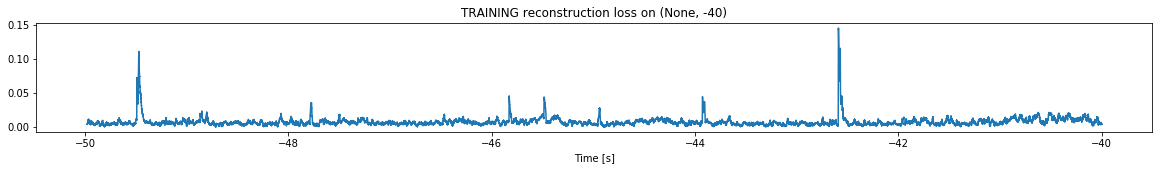

Finished training, median of the log(loss) is:  -2.1819407017187356
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


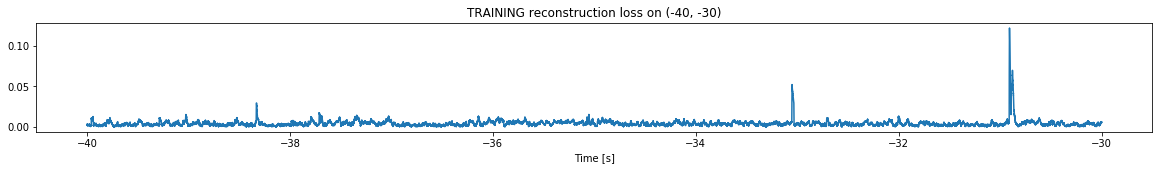

Finished training, median of the log(loss) is:  -2.4233001383373844
Triggering for section:  (-30, -20)
Using this median for triggering: -2.1819407017187356


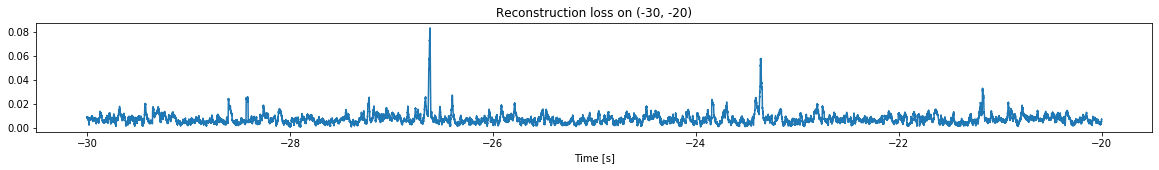

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


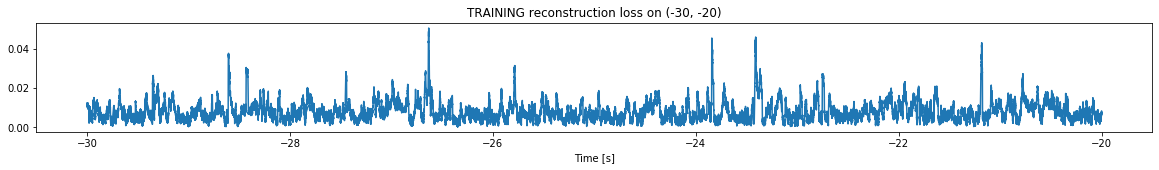

Finished training, median of the log(loss) is:  -2.148601669821678
Triggering for section:  (-20, -10)
Using this median for triggering: -2.4233001383373844


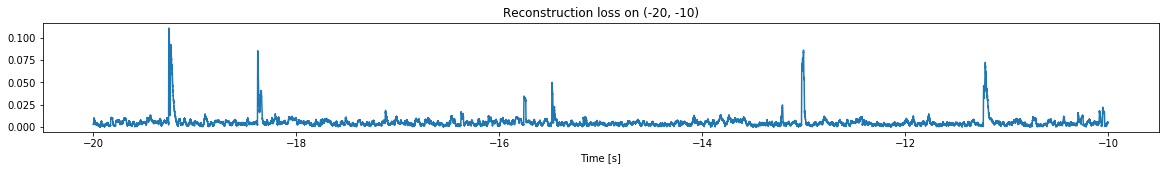

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


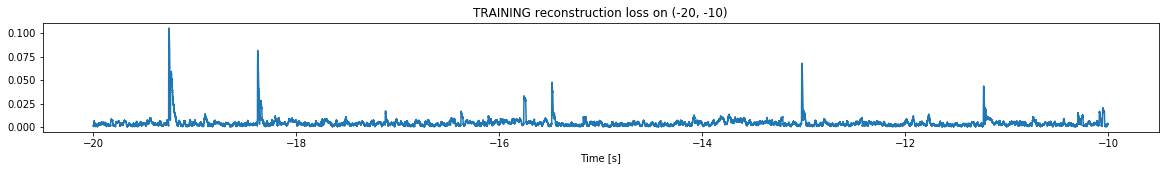

Finished training, median of the log(loss) is:  -2.491482702049212
Triggering for section:  (-10, 0)
Using this median for triggering: -2.148601669821678


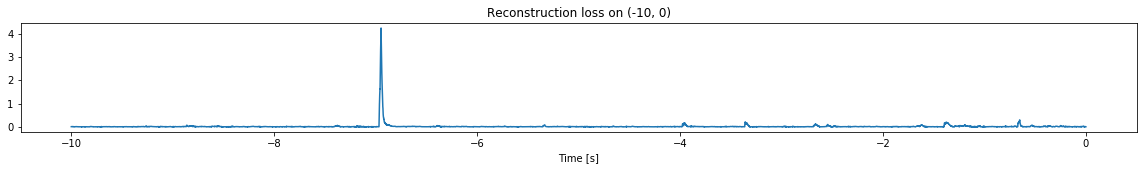

Other trigger time:  [-6.9467998 -0.6522   ]
Their log loss values are:  [2.77590708 1.62336911]


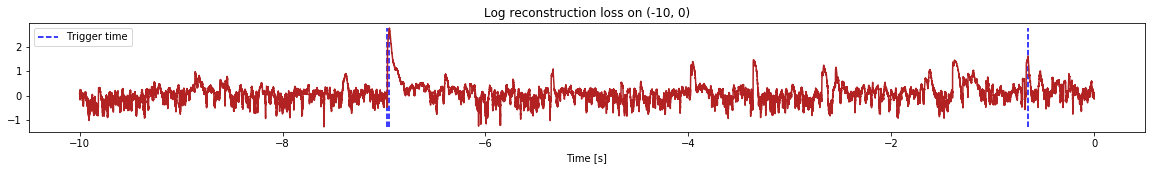

Triggered at:  [-6.9467998, -0.6522]
<--------
Finished simulation, all the triggered times are:  [-6.9467998, -0.6522]


In [67]:
simulation("Ramp_43", "15T_data", 10,  time_range = (-50,0))

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


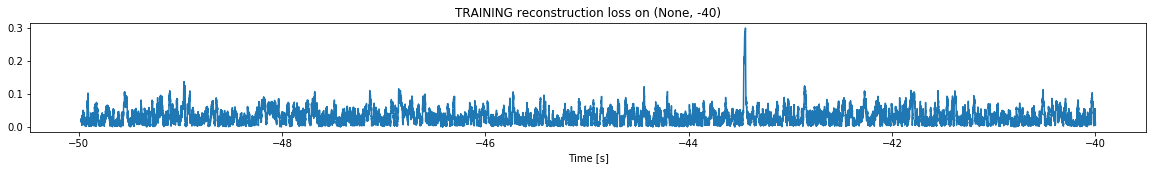

Finished training, median of the log(loss) is:  -1.5797205543743449
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


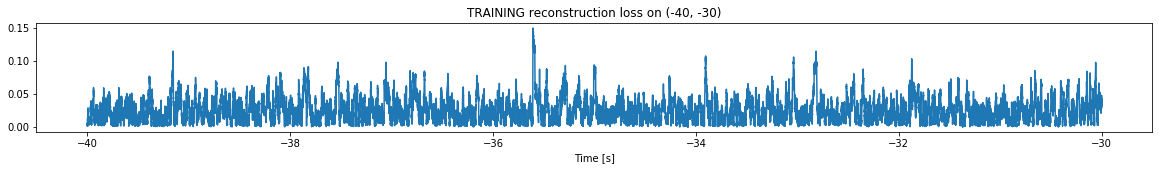

Finished training, median of the log(loss) is:  -1.6585920205686588
Triggering for section:  (-30, -20)
Using this median for triggering: -1.5797205543743449


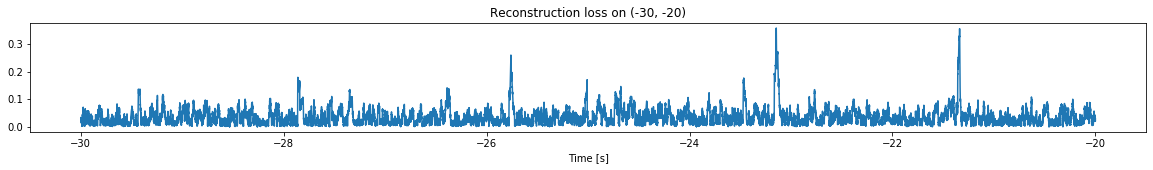

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


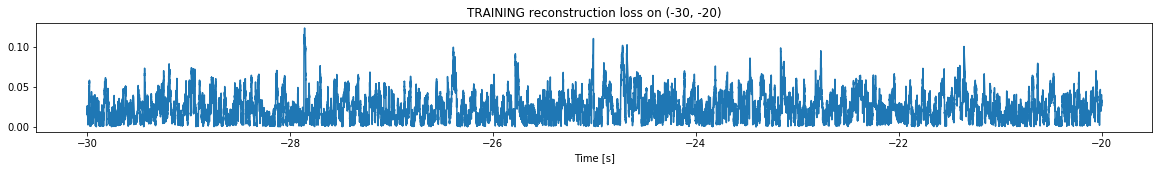

Finished training, median of the log(loss) is:  -1.6931737002197491
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6585920205686588


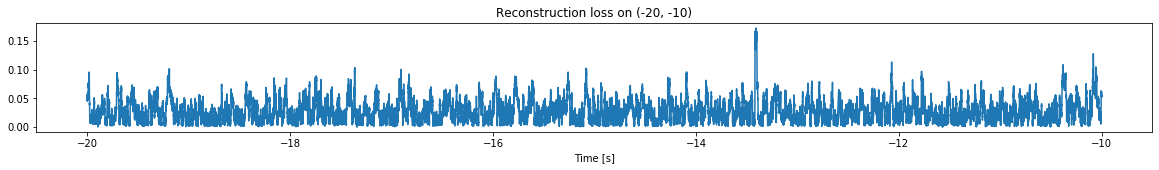

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


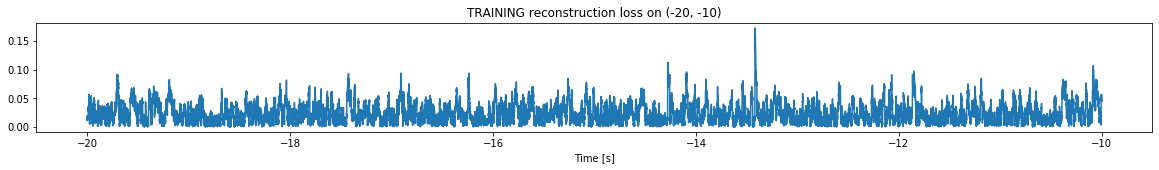

Finished training, median of the log(loss) is:  -1.7003822071769972
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6931737002197491


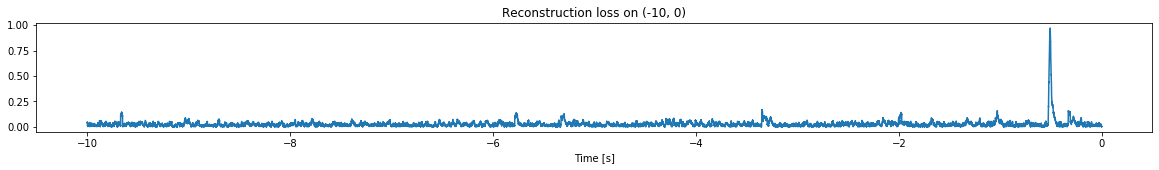

Other trigger time:  [-0.5082]
Their log loss values are:  [1.68126367]


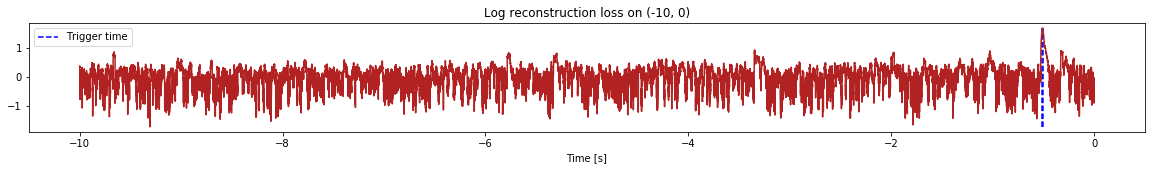

Triggered at:  [-0.5082]
<--------
Finished simulation, all the triggered times are:  [-0.5082]


In [68]:
simulation("Ramp_57", "15T_data", 10,  time_range = (-50,0))

---------------

# Dynamic threshold

In [5]:
#Data processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from nptdms import TdmsFile #Process ramping file

#For building ML models
import keras
import keras.models as models
from keras.layers.core import Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.signal import find_peaks

np.random.seed(1337) # for reproducibility

def load_sensor(ramp_num, dir_path, sensor, time_range = None):
    """
    Load a sensor's data in the specified time range.
    
    Example usage: load_sensor("Ramp_7", "15T_data", 0, time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - sensor (int): sensor index (0 or 1)
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified sensor in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    df_data = pd.DataFrame(data = {"dummy": data[sensor, :][selection_index]})
    
    #Return the sensor's data accoring to the index 
    return df_data["dummy"]
    
    %reset -f in
    
def load_time_label(ramp_num, dir_path, time_range = None, window = 2000, step = 10):
    """
    Load a ramp time axis in a specified range.
    
    Example usage: load_time_label("Ramp_7", "15T_data", time_range = (-20,0))
    
    Args:
     - ramp_num (str): ramp number
     - dir_path (str): path to directory containing all the ramp's data
     - time_range (tuple): time range in which the data should be loaded
    
    Returns: The specified time axis in specified time range
    """
    
    needed_file = None
    
    #Scan the directory for correct ramp file
    for filename in os.listdir(dir_path):
        if filename.startswith(ramp_num):
            needed_file = dir_path + "/" + filename
            
    #Load the file
    f = h5py.File(needed_file,'r')
    data = np.array(f['chanvals'], dtype = 'float16')
    
    #Load time
    time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")
    
    #Calculate index for selecting data
    selection_index = (time_axis > time_range[0]) & (time_axis < time_range[1])
    
    %reset -f in
    
    return time_axis[selection_index][window-1::step]


#### Mean of abs(signal)
def generate_mean_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    #Load the data
    ai0 = load_sensor(ramp_num, dir_path, 0, time_range = time_range).abs().rolling(window=window).mean().to_numpy()[window-1::step]
    ai1 = load_sensor(ramp_num, dir_path, 1, time_range = time_range).abs().rolling(window=window).mean().to_numpy()[window-1::step]
    
    #Calculate the product
    product = ai0*ai1
    
    #Stack them together
    all_mean = np.vstack((ai0,ai1,product)).transpose()
    
    %reset -f in
    
    return all_mean

#### SD of signal
def generate_sd_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    #Load the data
    ai0 = load_sensor(ramp_num, dir_path, 0, time_range = time_range).rolling(window=window).std().to_numpy()[window-1::step]
    ai1 = load_sensor(ramp_num, dir_path, 1, time_range = time_range).rolling(window=window).std().to_numpy()[window-1::step]
    
    #Calculate the product
    product = ai0*ai1
    
    #Stack them together
    all_sd = np.vstack((ai0,ai1, product)).transpose()
    
    %reset -f in
    
    return all_sd

def generate_data(ramp_num, dir_path, time_range, window = 2000, step = 10):
    
    #Selection index due to using different window
    #selection_index = int((thres_win - window)/step)
    
    moving_mean = generate_mean_data(ramp_num, dir_path, time_range, window = window, step = step)
    moving_sd = generate_sd_data(ramp_num, dir_path, time_range, window = window, step = step)
    time_label = load_time_label(ramp_num, dir_path, time_range, window = window, step = step)
    
    all_data = np.concatenate((moving_mean, moving_sd), axis = 1)
    
    print("All data's shape: ", all_data.shape)
    
    %reset -f in
    
    return all_data, time_label


def create_threshold_list(trigger_sections, start_thres = 4.0, end_thres = 2.6):
    
    increment = (start_thres - end_thres)/(trigger_sections-3)
    
    trigger_thres = [0,0] #No trigger in the first two sections
    
    trigger_thres.extend([start_thres - i*increment for i in range(trigger_sections - 2)])
    
    return trigger_thres

def create_model():
    
    #================BUILD THE MODEL====================
    # Simple model
    # Simple model
    model = models.Sequential()

    model.add(Dense(4, activation = 'elu', kernel_initializer='glorot_uniform',
                    kernel_regularizer=regularizers.l2(0.0),
                    input_dim=6))

    model.add(Dense(2,activation='elu',
                    kernel_initializer='glorot_uniform'))

    model.add(Dense(4,activation='elu',
                    kernel_initializer='glorot_uniform'))

    model.add(Dense(6,
                    kernel_initializer='glorot_uniform'))

    model.compile(loss='mse',optimizer='adam')


    return model

def train(current_weights, X, time_axis, time_range):
    """Take a model, train it in the appropritate time range, return the new weights
    and its reconstruction loss distribution"""
    
    print("Training for section: ", time_range)
    #Select the appropriate time
    start_index = None
    
    if time_range[0] is not None:
        start_index = np.argmax(time_axis > time_range[0])
    else:
        start_index = 0
    
    if time_range[1] == 0:
        end_index = None
    else:
        end_index = np.argmax(time_axis > time_range[1])
    
    X_train = np.copy(X[start_index:end_index])
    time_train = time_axis[start_index:end_index]
    
    #Create model
    model = create_model()
    
    if current_weights:
        model.set_weights(current_weights)
    
    #Scaler initiation
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    
    #Train the model and extract new weights
    model.fit(X_train, X_train,
              batch_size=2000,
              epochs=30, verbose = 0)
    
    new_weights = model.get_weights()
    
    #Evaluate the losses and update the distribution
    X_pred = model.predict(X_train)
    loss = np.mean(np.abs(X_pred-X_train), axis = 1)
    
    #Plot the reconstruction loss
    plt.figure(figsize=(20,2))
    plt.plot(time_train, loss)
    plt.title("TRAINING reconstruction loss on {}".format(time_range))
    plt.xlabel("Time [s]")
    plt.show()
    
    #Take the mean of the log loss and update the mean threshold
    current_median = np.median(np.log10(loss))
    
    print("Finished training, median of the log(loss) is: ", current_median)
    
    return new_weights, current_median, scaler

def trigger(trigger_threshold, current_weights, X, time_axis, time_range, prev_median, scaler):
    
    print("Triggering for section: ", time_range)
    print("Using this median for triggering:", prev_median)
    print("Triggering threshold is: ", trigger_threshold)
    
    #Select the appropriate time
    start_index = None
    
    if time_range[0] is not None:
        start_index = np.argmax(time_axis > time_range[0])
    else:
        start_index = 0
    
    if time_range[1] == 0:
        end_index = None
    else:
        end_index = np.argmax(time_axis > time_range[1])
    
    time_test = time_axis[start_index:end_index]
    X_test = np.copy(X[start_index:end_index])
    
    X_test = scaler.transform(X_test) #Scale the current data
    
    #Create model
    model = create_model()
    model.set_weights(current_weights)
        
    #Find the test loss (doing this in parallel for the sake of simulation), but in a practical system
    #Ideally we need to do inference every single data point come in
    X_pred_test = model.predict(X_test)
    test_loss = np.mean(np.abs(X_pred_test-X_test), axis = 1)
    
    
    #Plot the reconstruction loss just to check
    plt.figure(figsize=(20,2))
    plt.plot(time_test, test_loss)
    plt.title("Reconstruction loss on {}".format(time_range))
    plt.xlabel("Time [s]")
    plt.show()
    
    #Quantify how much each data point is far away from the distribution
    log_test_loss = np.log10(test_loss) - prev_median
    
    #Find the trigger time
    trigger_index = np.argmax(log_test_loss > trigger_threshold)
    
    if  trigger_index != 0:
        #Plot the triggered time
        plt.figure(figsize=(20,2))
        plt.plot(time_test, log_test_loss, color = "firebrick")
        plt.title("Log reconstruction loss on {}".format(time_range))
        plt.xlabel("Time [s]")
        
        #Trigger time
        plt.vlines(time_test[trigger_index], log_test_loss.min(), log_test_loss.max(), color = "blue", linestyles = "dashed", label = "Trigger time")
        plt.legend(loc = "upper left")
        
        
        ### Find trigger times
        peaks, _ = find_peaks(log_test_loss, height=trigger_threshold, distance = 5000)
        print("Other trigger time: ", time_test[peaks])
        print("Their log loss values are: ", log_test_loss[peaks])
        
        for i in range(len(peaks)):
            plt.vlines(time_test[peaks[i]], log_test_loss.min(), log_test_loss.max(), color = "blue", linestyles = "dashed")
            
        plt.show()
        
        return list(time_test[peaks])
    
    else:
        return None
    

def simulation(ramp_num, dir_path, section_size, time_range, reached_max):
    
    #Load data and create the model
    X, time_axis = generate_data(ramp_num, dir_path, time_range = time_range, window = 2000, step = 10)
    
    #For updating model
    current_weights = None
    new_weights = None
    
    #For keeping track of distribution history
    prev_median = None
    updated_median = None
    
    #Keeping track of scaler after training
    past_scaler = None
    
    #Calculate number of sections
    num_section = int(abs(time_range[0])/section_size)
    print("Number of sections:", num_section)
    
    #Keeping log of all the trigger time
    trigger_log = []
    
    #Setting dynamic trigger threshold
    start_time = time_range[0]
    
    changing_range = abs(start_time - reached_max)
    
    trigger_sections = int(changing_range/section_size - (changing_range/section_size)%1)
    
    print("Number of triggering sections", trigger_sections)
    
    trigger_thres = create_threshold_list(trigger_sections, start_thres = 3, end_thres = 1.6)
    
    print("List of trigger thresholds: ", trigger_thres)
    
    #Sequentially go through the data
    for i in range(num_section):
        
        print("Entering sections: ", (-section_size*(num_section - i), -section_size*(num_section - i - 1)))
        print("-------->")
        
        if i == 0:
            continue
        elif i == 1:
            #Train on the first segment
            time_range = (None, -section_size*(num_section - i))
            new_weights, updated_median, new_scaler = train(current_weights, X, time_axis, time_range)
        else:
            
            #Set previous distrubution to the newly trained disttribution
            prev_median = updated_median
            current_scaler = new_scaler
            current_weights = new_weights
            
            #Selecting appropriate time range for training and triggering
            train_time_range = (-section_size*(num_section - i + 1), -section_size*(num_section - i))
            trigger_time_range = (-section_size*(num_section - i), -section_size*(num_section - i - 1))
            
            #Train and predict simutaneously
            new_weights, updated_median, new_scaler = train(current_weights, X, time_axis, train_time_range)
            
            
            #Select the trigger threshold
            
            if i >= len(trigger_thres):
                trigger_threshold = trigger_thres[-1]
            else:
                trigger_threshold = trigger_thres[i]
                
            
            trigger_time = trigger(trigger_threshold, current_weights, X, time_axis, trigger_time_range, prev_median, current_scaler)
            
            if trigger_time is not None:
                print("Triggered at: ", trigger_time)
                trigger_log.extend(trigger_time)
        
        print("<--------")
        
    print("Finished simulation, all the triggered times are: ", trigger_log)

Using TensorFlow backend.


Flushing input history
Flushing input history
Flushing input history
All data's shape:  (599800, 6)
Flushing input history
Number of sections: 6
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-60, -50)
-------->
Entering sections:  (-50, -40)
-------->
Training for section:  (None, -50)


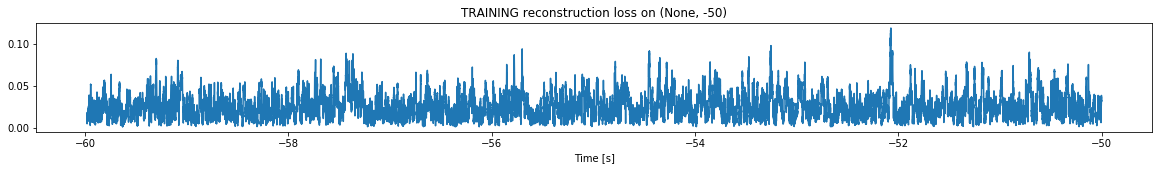

Finished training, median of the log(loss) is:  -1.6503232425580925
<--------
Entering sections:  (-40, -30)
-------->
Training for section:  (-50, -40)


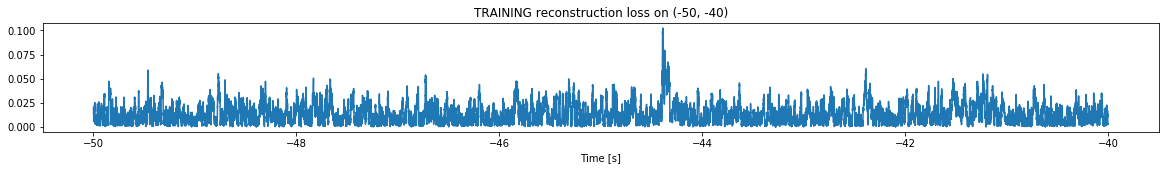

Finished training, median of the log(loss) is:  -1.9579597083163667
Triggering for section:  (-40, -30)
Using this median for triggering: -1.6503232425580925
Triggering threshold is:  3.0


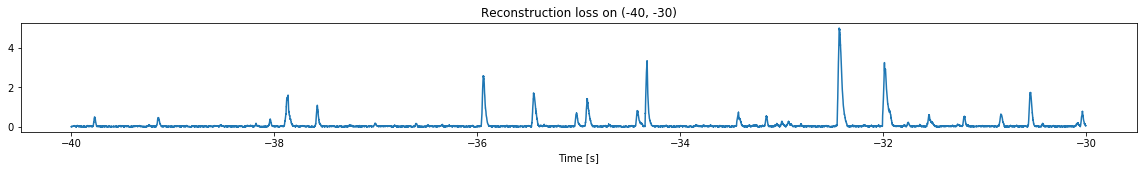

<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


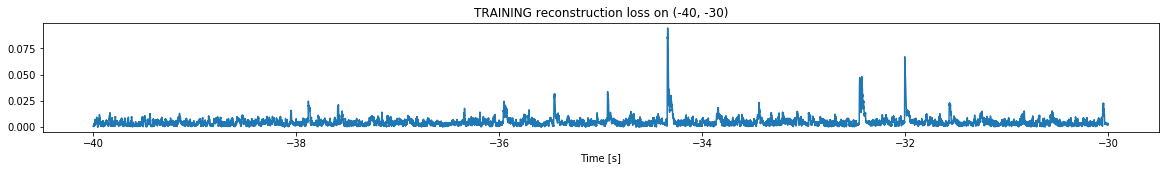

Finished training, median of the log(loss) is:  -2.4080937670324234
Triggering for section:  (-30, -20)
Using this median for triggering: -1.9579597083163667
Triggering threshold is:  1.6


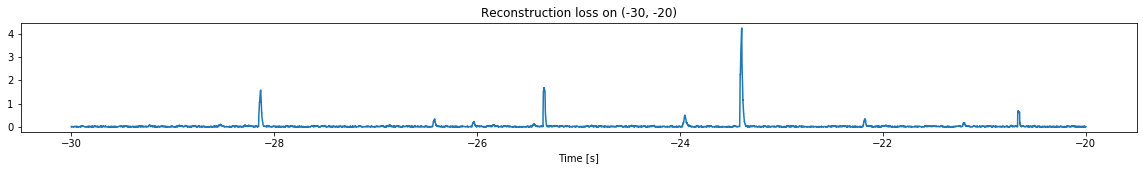

Other trigger time:  [-28.1337   -25.3406   -23.952099 -23.392    -20.668   ]
Their log loss values are:  [2.1559067  2.18397494 1.65584092 2.58513575 1.78642306]


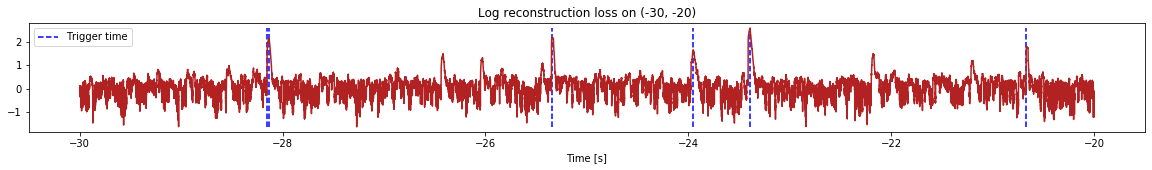

Triggered at:  [-28.1337, -25.3406, -23.952099, -23.392, -20.668]
<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


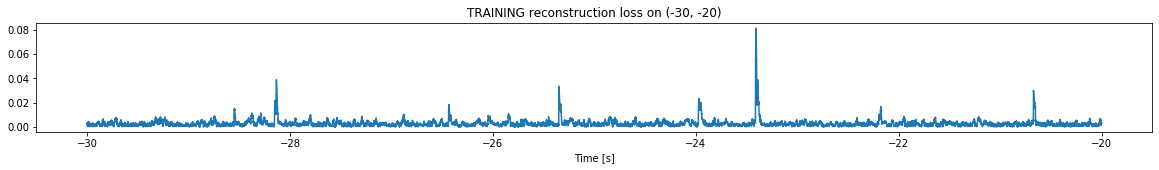

Finished training, median of the log(loss) is:  -2.6447927803796762
Triggering for section:  (-20, -10)
Using this median for triggering: -2.4080937670324234
Triggering threshold is:  1.6


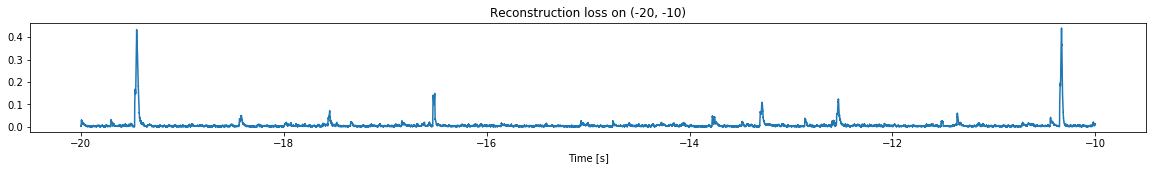

Other trigger time:  [-19.4495 -10.3334]
Their log loss values are:  [2.04499543 2.05191758]


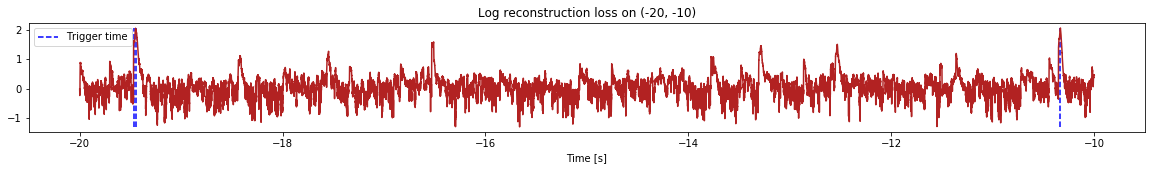

Triggered at:  [-19.4495, -10.3334]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


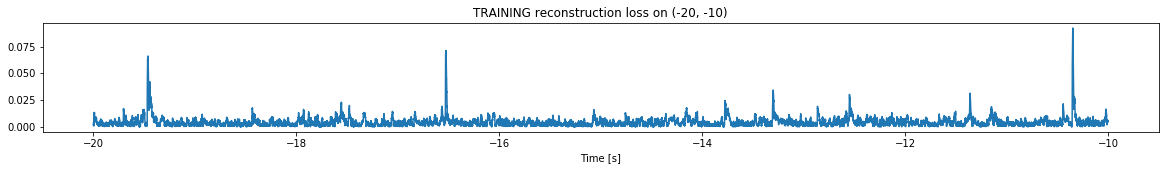

Finished training, median of the log(loss) is:  -2.4580831069534312
Triggering for section:  (-10, 0)
Using this median for triggering: -2.6447927803796762
Triggering threshold is:  1.6


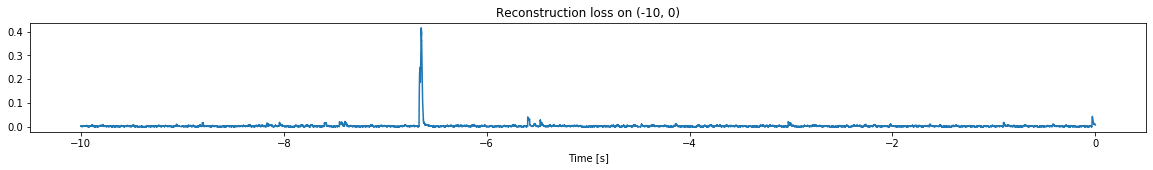

Other trigger time:  [-6.6449]
Their log loss values are:  [2.26300697]


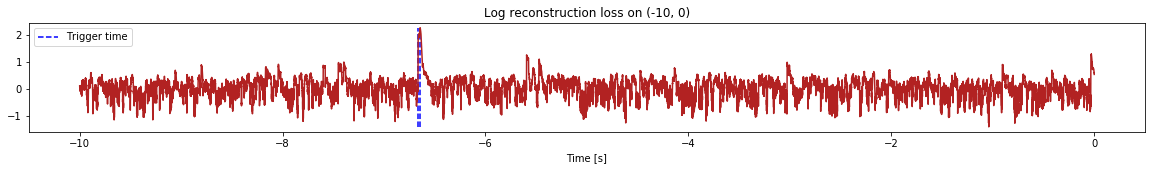

Triggered at:  [-6.6449]
<--------
Finished simulation, all the triggered times are:  [-28.1337, -25.3406, -23.952099, -23.392, -20.668, -19.4495, -10.3334, -6.6449]


In [13]:
simulation("Ramp_2", "15T_data", 10,  time_range = (-60,0), reached_max = -19.7)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (599800, 6)
Flushing input history
Number of sections: 6
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-60, -50)
-------->
Entering sections:  (-50, -40)
-------->
Training for section:  (None, -50)


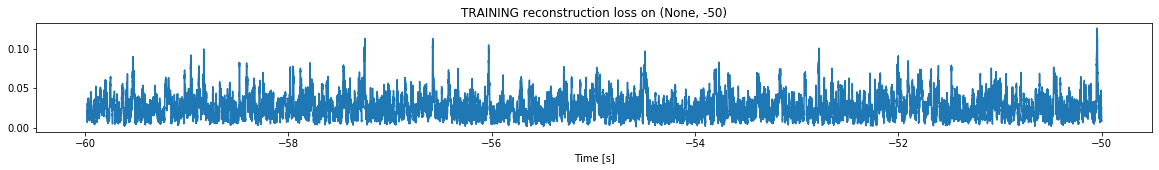

Finished training, median of the log(loss) is:  -1.64155581124515
<--------
Entering sections:  (-40, -30)
-------->
Training for section:  (-50, -40)


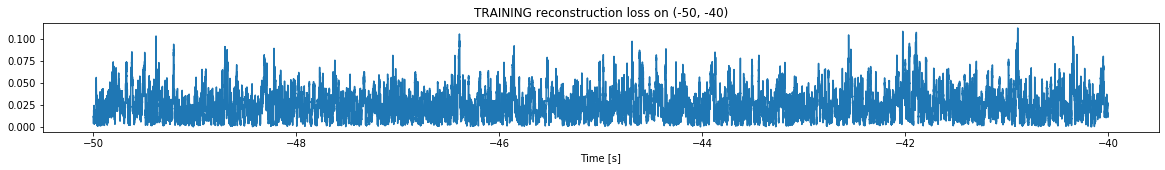

Finished training, median of the log(loss) is:  -1.6453673771946358
Triggering for section:  (-40, -30)
Using this median for triggering: -1.64155581124515
Triggering threshold is:  3.0


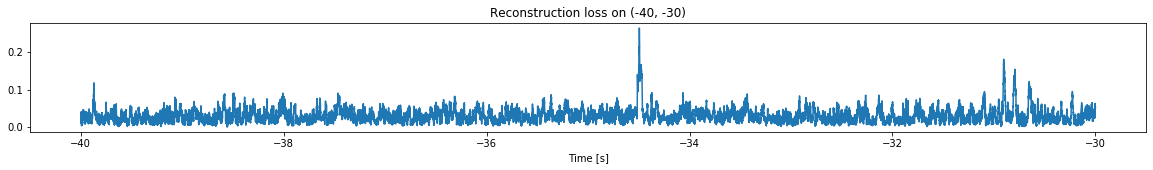

<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


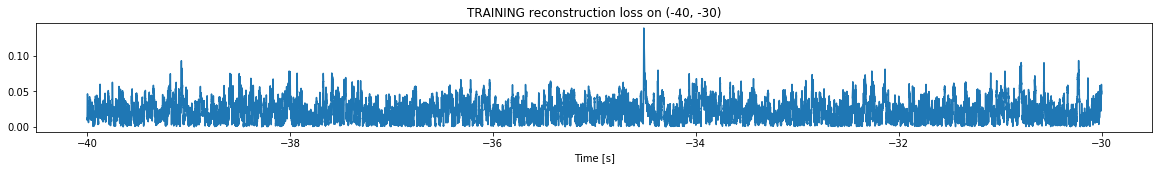

Finished training, median of the log(loss) is:  -1.7051199575651959
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6453673771946358
Triggering threshold is:  1.6


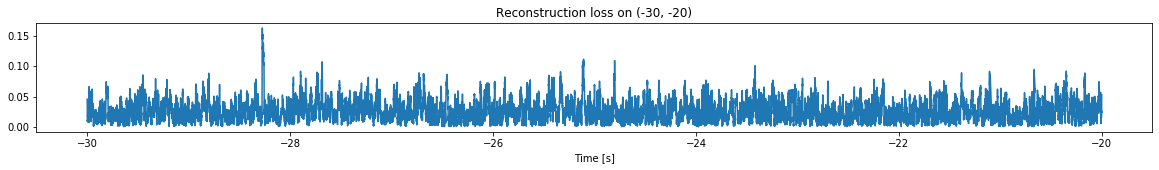

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


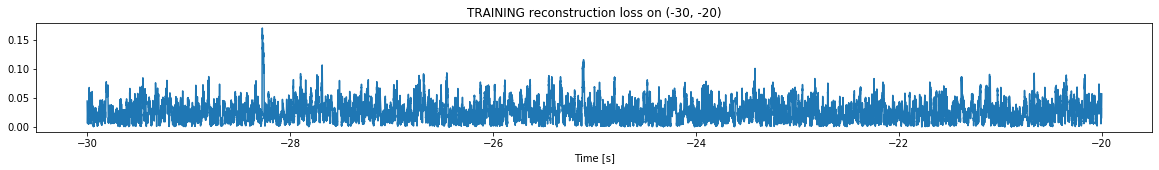

Finished training, median of the log(loss) is:  -1.6307874278706784
Triggering for section:  (-20, -10)
Using this median for triggering: -1.7051199575651959
Triggering threshold is:  1.6


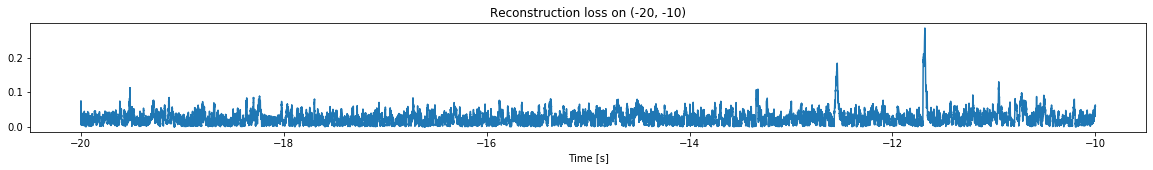

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


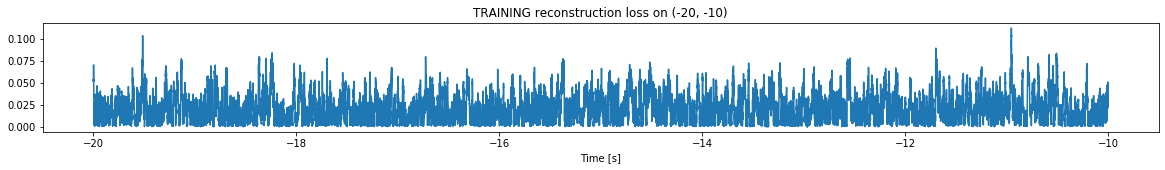

Finished training, median of the log(loss) is:  -1.7376725304563294
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6307874278706784
Triggering threshold is:  1.6


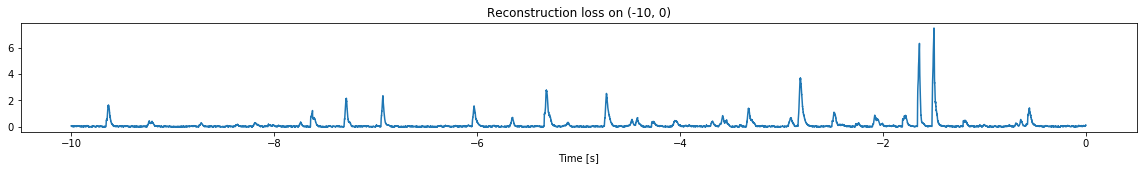

Other trigger time:  [-9.6339    -7.6225996 -6.9283    -6.0299997 -5.3178    -4.7251
 -3.326     -2.8137999 -1.4969    -0.5563   ]
Their log loss values are:  [1.85125314 1.72270557 2.00306696 1.83153188 2.07408071 2.03398351
 1.7770195  2.20015742 2.50509763 1.78515107]


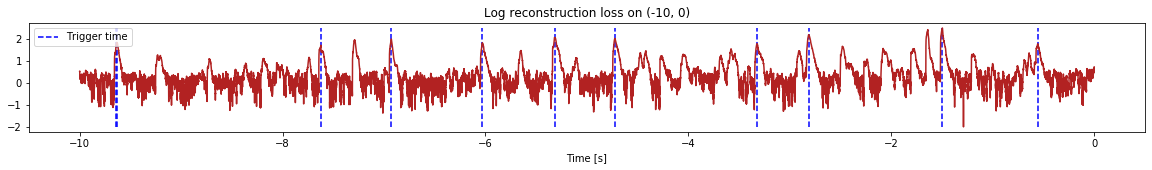

Triggered at:  [-9.6339, -7.6225996, -6.9283, -6.0299997, -5.3178, -4.7251, -3.326, -2.8137999, -1.4969, -0.5563]
<--------
Finished simulation, all the triggered times are:  [-9.6339, -7.6225996, -6.9283, -6.0299997, -5.3178, -4.7251, -3.326, -2.8137999, -1.4969, -0.5563]


In [3]:
simulation("Ramp_3", "15T_data", 10,  time_range = (-60,0), reached_max = -17)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


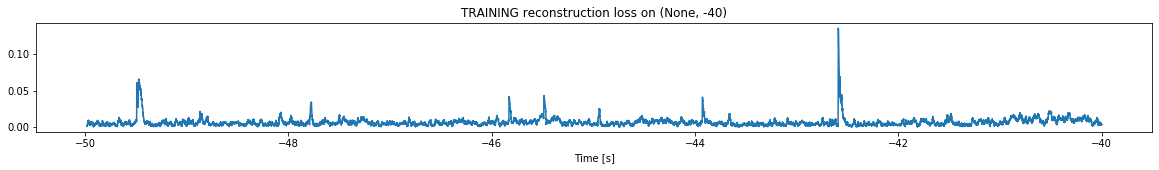

Finished training, median of the log(loss) is:  -2.2419734357668895
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


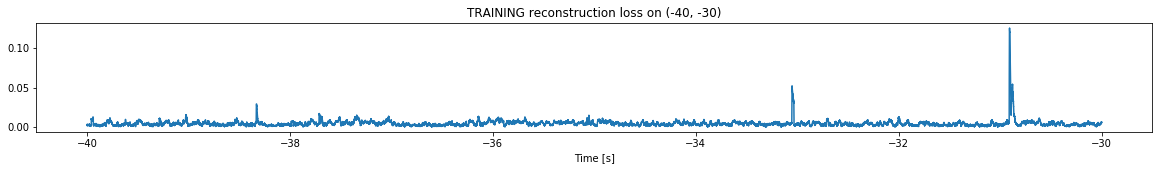

Finished training, median of the log(loss) is:  -2.4102602383128353
Triggering for section:  (-30, -20)
Using this median for triggering: -2.2419734357668895
Triggering threshold is:  3.0


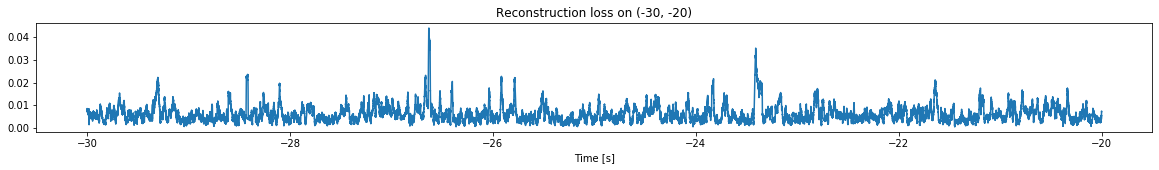

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


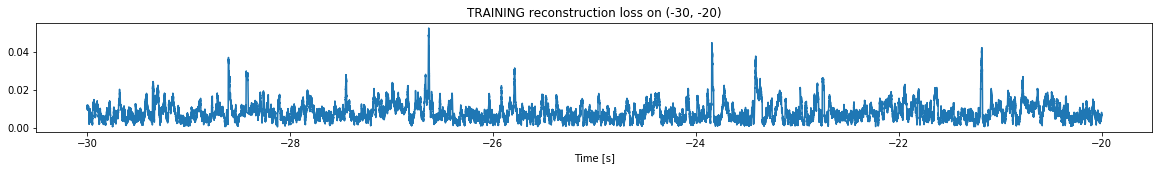

Finished training, median of the log(loss) is:  -2.149068357069397
Triggering for section:  (-20, -10)
Using this median for triggering: -2.4102602383128353
Triggering threshold is:  1.6


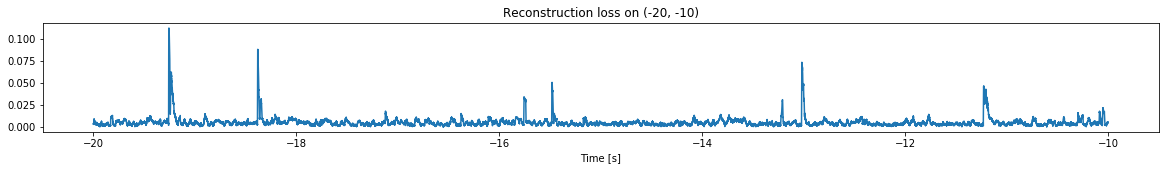

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


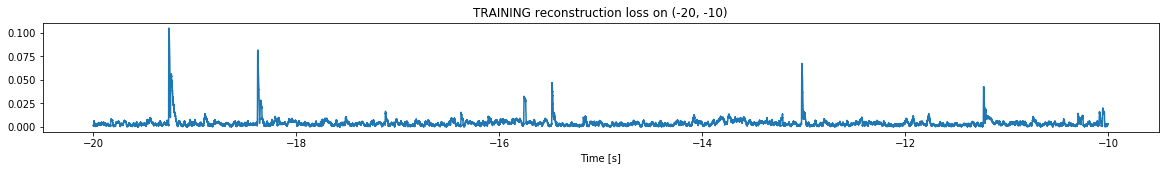

Finished training, median of the log(loss) is:  -2.4834151855274573
Triggering for section:  (-10, 0)
Using this median for triggering: -2.149068357069397
Triggering threshold is:  1.6


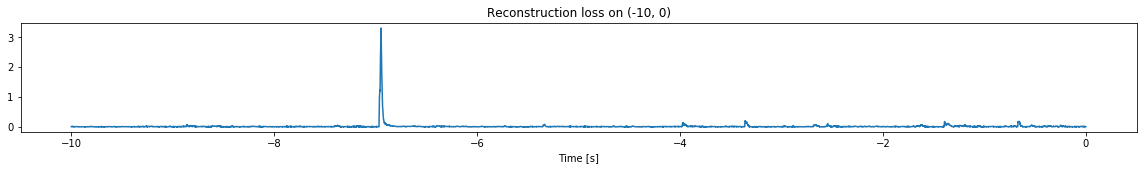

Other trigger time:  [-6.9467998]
Their log loss values are:  [2.66986556]


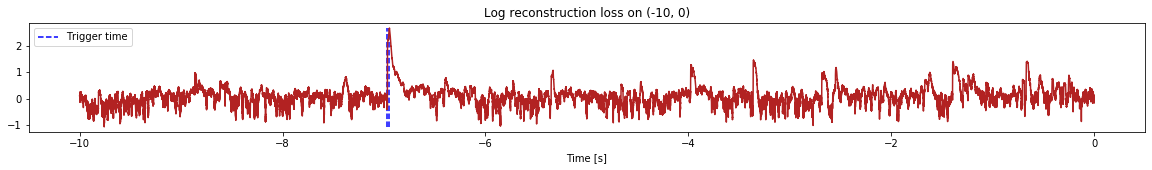

Triggered at:  [-6.9467998]
<--------
Finished simulation, all the triggered times are:  [-6.9467998]


In [6]:
simulation("Ramp_4", "15T_data", 10,  time_range = (-50,0), reached_max = -6.3)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


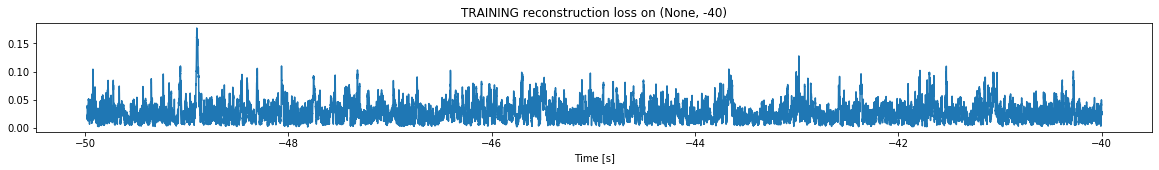

Finished training, median of the log(loss) is:  -1.6094068914929023
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


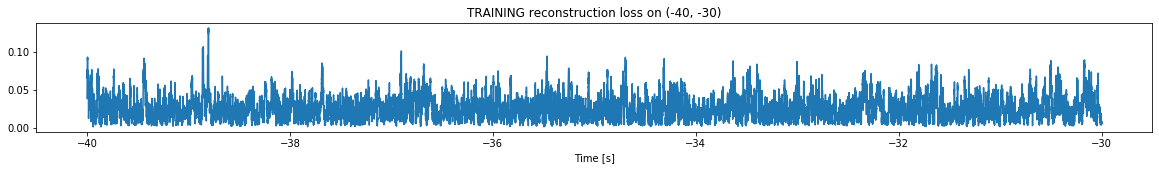

Finished training, median of the log(loss) is:  -1.6407766598789761
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6094068914929023
Triggering threshold is:  3.0


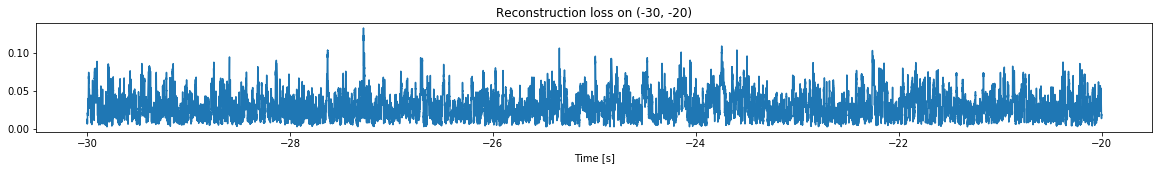

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


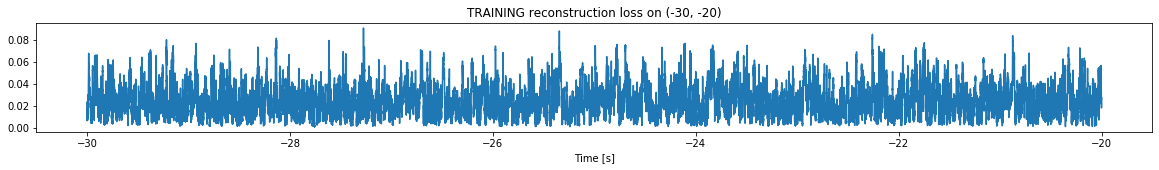

Finished training, median of the log(loss) is:  -1.6511305958245535
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6407766598789761
Triggering threshold is:  1.6


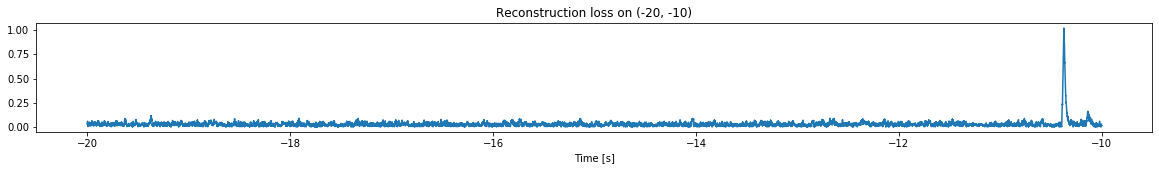

Other trigger time:  [-10.373099]
Their log loss values are:  [1.65008078]


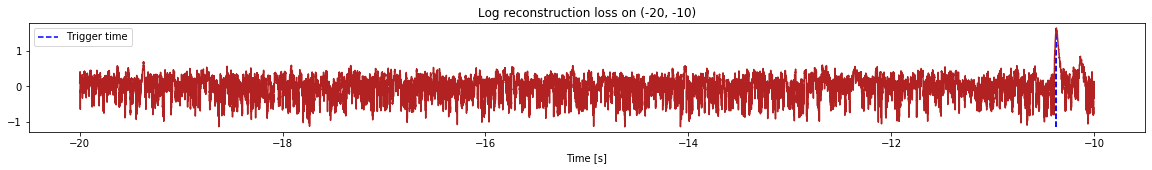

Triggered at:  [-10.373099]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


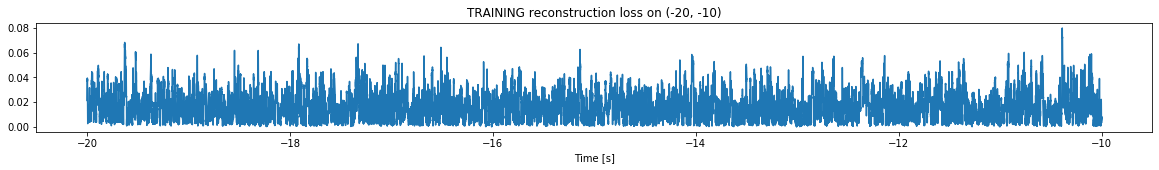

Finished training, median of the log(loss) is:  -1.83397377780519
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6511305958245535
Triggering threshold is:  1.6


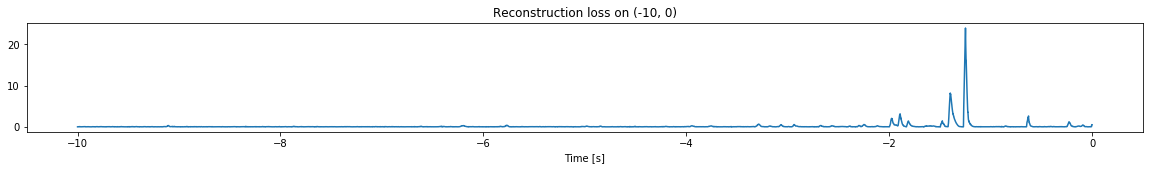

Other trigger time:  [-1.8928     -1.2480999  -0.62659997]
Their log loss values are:  [2.15164249 3.03091868 2.07172892]


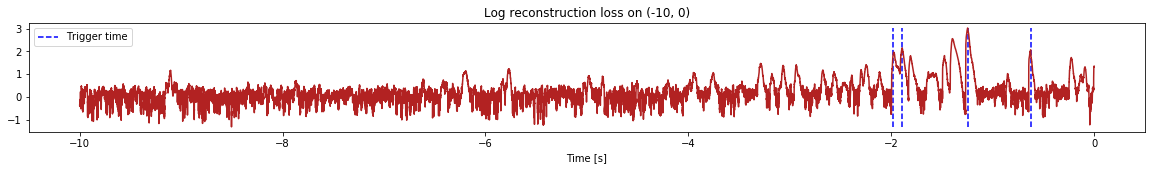

Triggered at:  [-1.8928, -1.2480999, -0.62659997]
<--------
Finished simulation, all the triggered times are:  [-10.373099, -1.8928, -1.2480999, -0.62659997]


In [10]:
simulation("Ramp_5", "15T_data", 10,  time_range = (-50,0), reached_max = -2.55)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


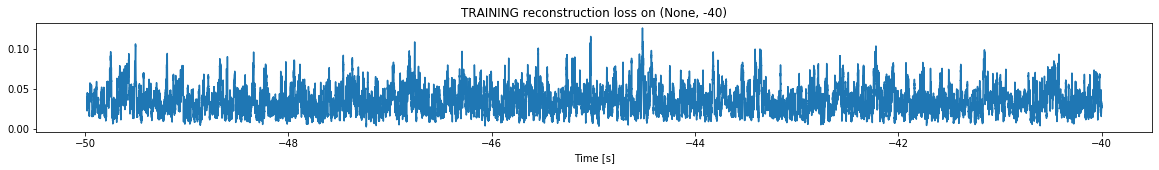

Finished training, median of the log(loss) is:  -1.487431648294091
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


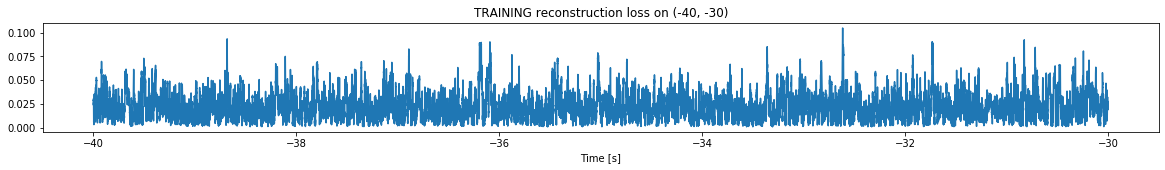

Finished training, median of the log(loss) is:  -1.7039766833189856
Triggering for section:  (-30, -20)
Using this median for triggering: -1.487431648294091
Triggering threshold is:  3.0


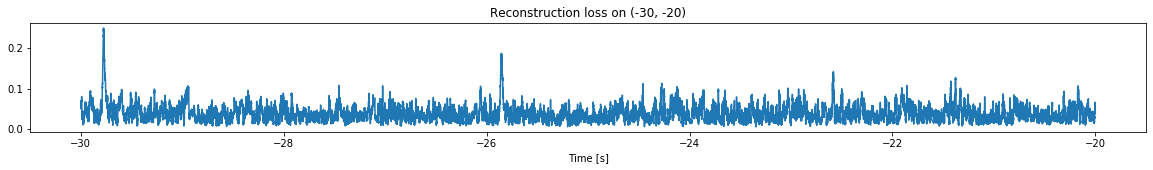

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


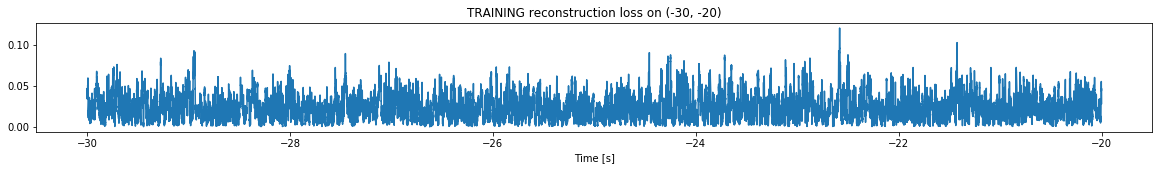

Finished training, median of the log(loss) is:  -1.6567433939843625
Triggering for section:  (-20, -10)
Using this median for triggering: -1.7039766833189856
Triggering threshold is:  1.6


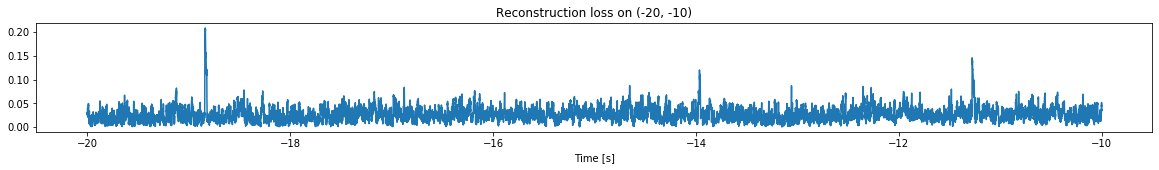

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


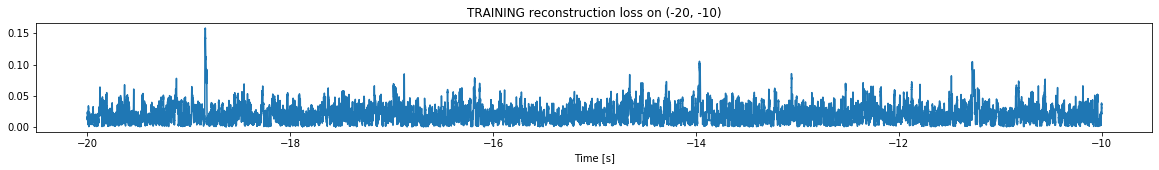

Finished training, median of the log(loss) is:  -1.7486182088237796
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6567433939843625
Triggering threshold is:  1.6


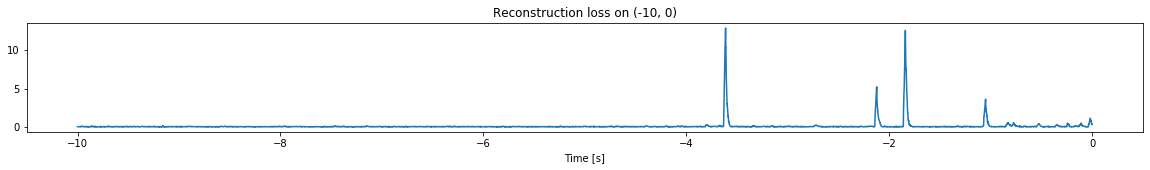

Other trigger time:  [-3.6125998 -1.8406999 -1.05      -0.0176   ]
Their log loss values are:  [2.76754319 2.75665787 2.21438735 1.71030956]


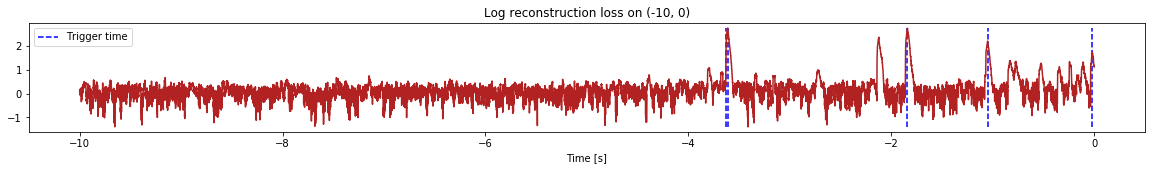

Triggered at:  [-3.6125998, -1.8406999, -1.05, -0.0176]
<--------
Finished simulation, all the triggered times are:  [-3.6125998, -1.8406999, -1.05, -0.0176]


In [14]:
simulation("Ramp_6", "15T_data", 10,  time_range = (-50,0), reached_max = -2.8)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


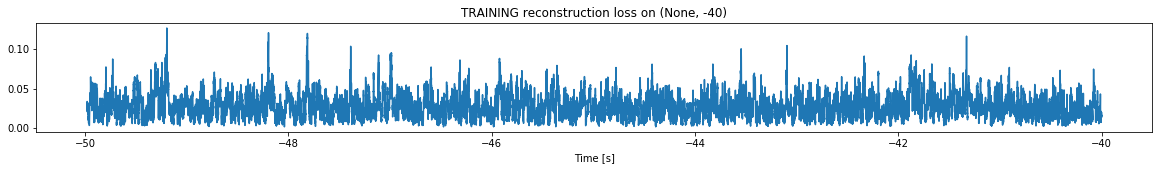

Finished training, median of the log(loss) is:  -1.6052452952828367
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


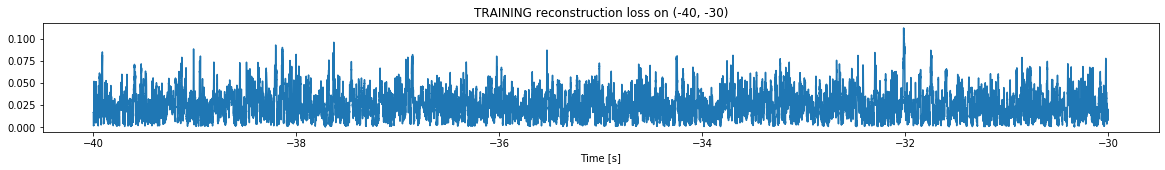

Finished training, median of the log(loss) is:  -1.6427210992448518
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6052452952828367
Triggering threshold is:  3.0


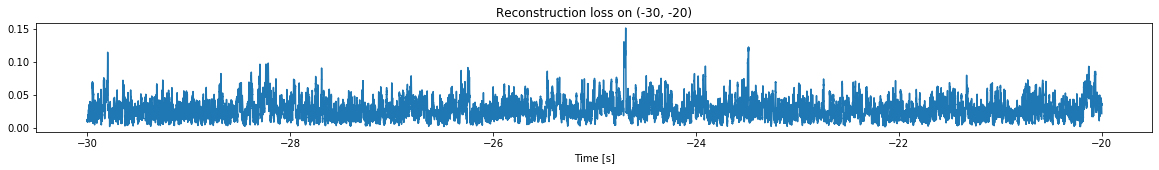

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


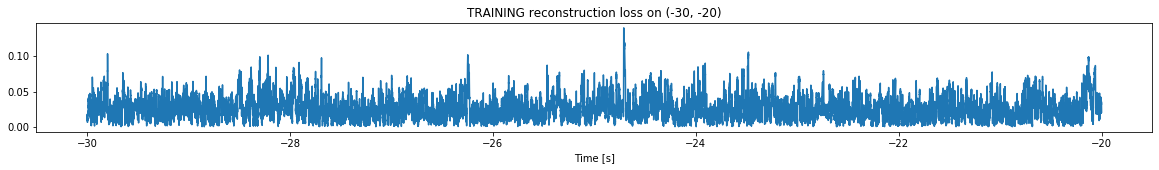

Finished training, median of the log(loss) is:  -1.6287910985064902
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6427210992448518
Triggering threshold is:  1.6


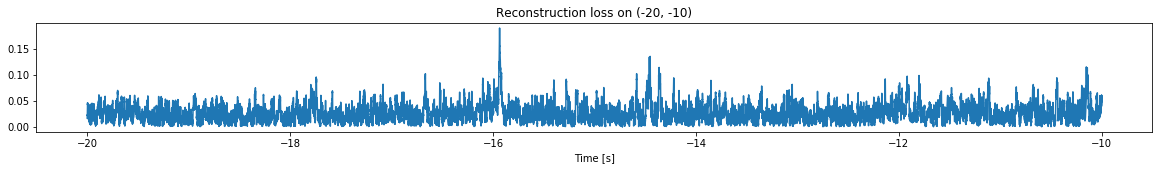

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


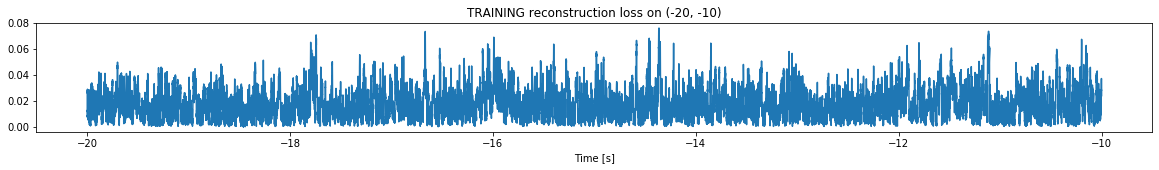

Finished training, median of the log(loss) is:  -1.7946960576025142
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6287910985064902
Triggering threshold is:  1.6


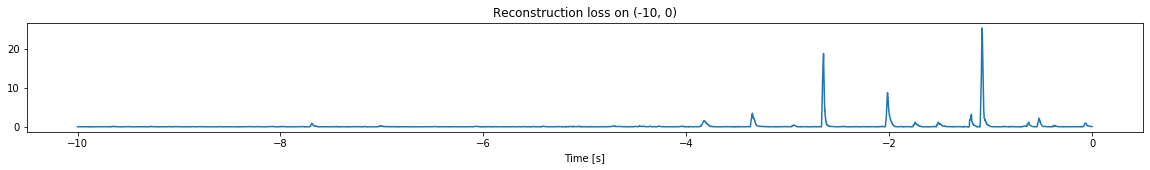

Other trigger time:  [-3.3479998  -2.6469998  -2.0161     -1.0834     -0.52169997]
Their log loss values are:  [2.17676548 2.90523775 2.5739725  3.03514439 1.97075526]


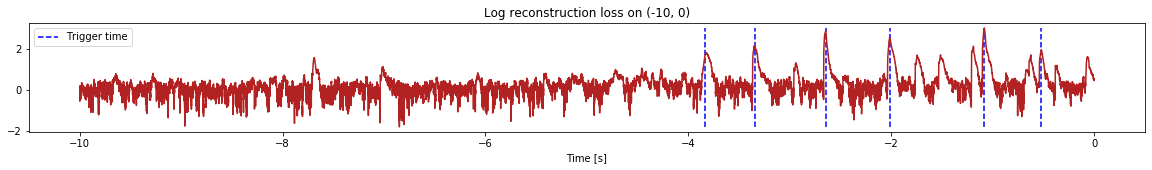

Triggered at:  [-3.3479998, -2.6469998, -2.0161, -1.0834, -0.52169997]
<--------
Finished simulation, all the triggered times are:  [-3.3479998, -2.6469998, -2.0161, -1.0834, -0.52169997]


In [10]:
simulation("Ramp_7", "15T_data", 10,  time_range = (-50,0), reached_max = -6.15)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


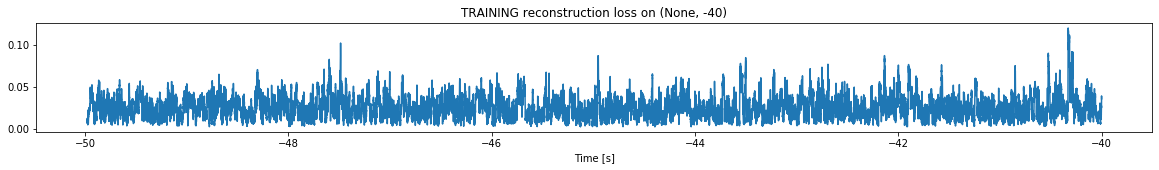

Finished training, median of the log(loss) is:  -1.645188573083833
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


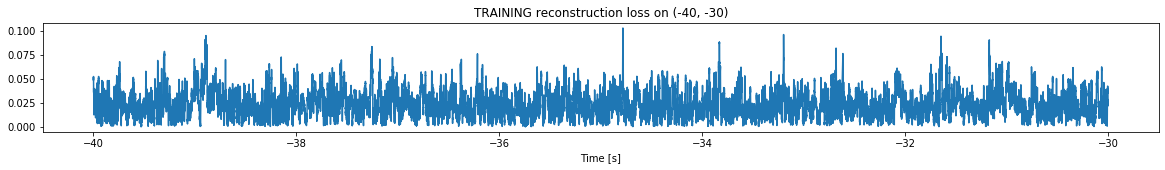

Finished training, median of the log(loss) is:  -1.6620371064330943
Triggering for section:  (-30, -20)
Using this median for triggering: -1.645188573083833
Triggering threshold is:  3.0


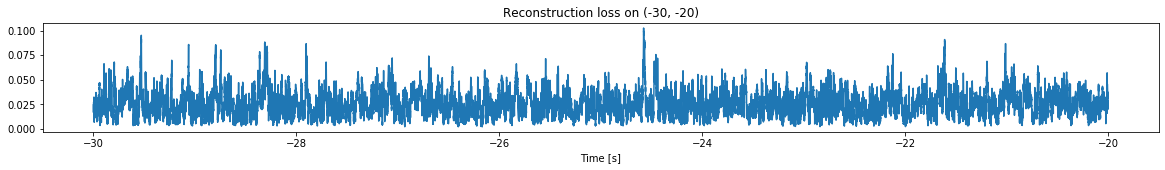

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


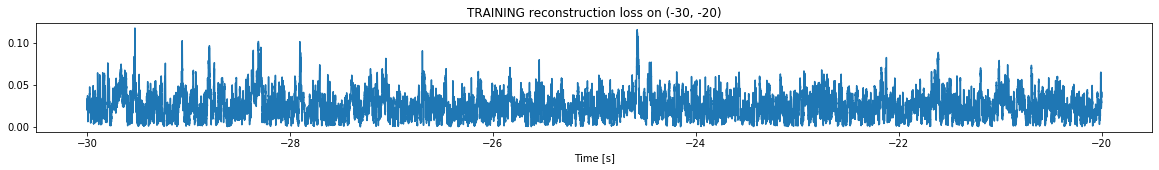

Finished training, median of the log(loss) is:  -1.6368077659126459
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6620371064330943
Triggering threshold is:  1.6


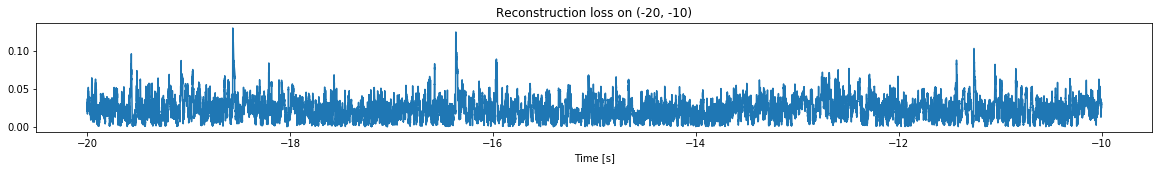

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


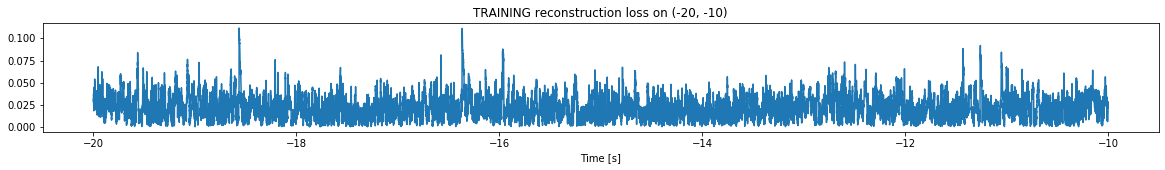

Finished training, median of the log(loss) is:  -1.6980406543186928
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6368077659126459
Triggering threshold is:  1.6


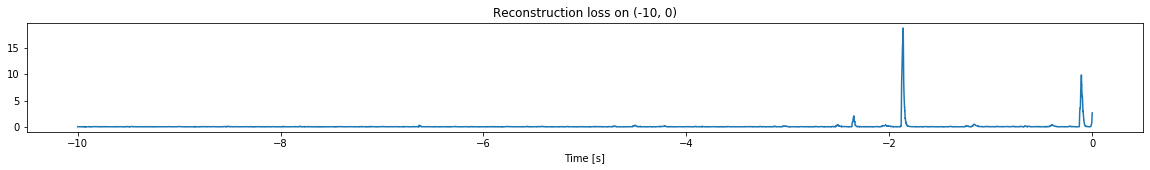

Other trigger time:  [-1.8632 -0.1069]
Their log loss values are:  [2.91120961 2.63156098]


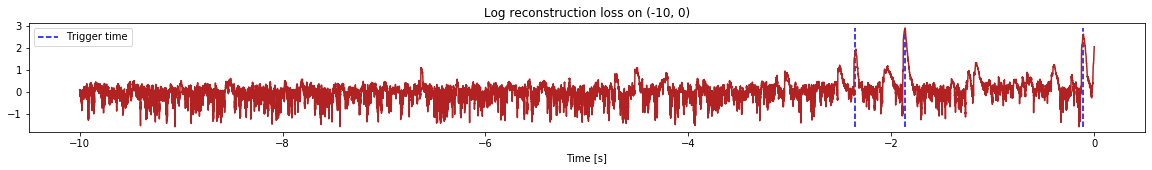

Triggered at:  [-1.8632, -0.1069]
<--------
Finished simulation, all the triggered times are:  [-1.8632, -0.1069]


In [18]:
simulation("Ramp_8", "15T_data", 10,  time_range = (-50,0), reached_max = -2.2)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


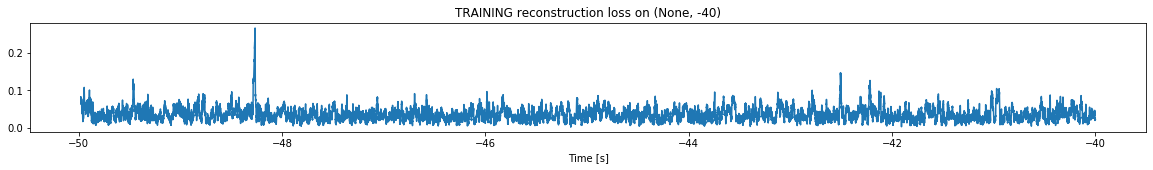

Finished training, median of the log(loss) is:  -1.4879090500522638
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


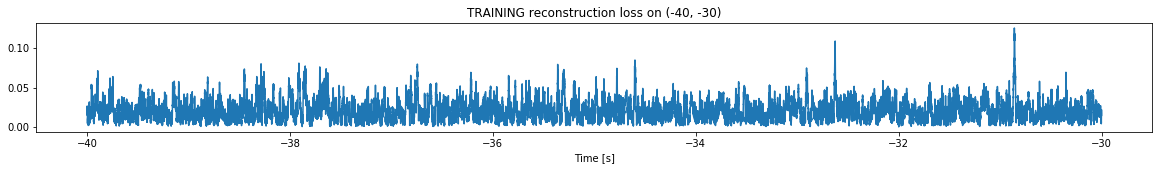

Finished training, median of the log(loss) is:  -1.7250254249809376
Triggering for section:  (-30, -20)
Using this median for triggering: -1.4879090500522638
Triggering threshold is:  3.0


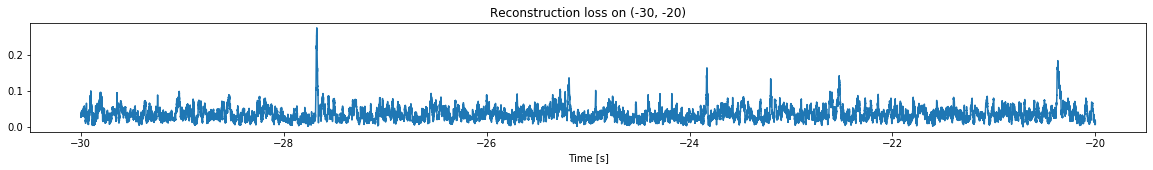

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


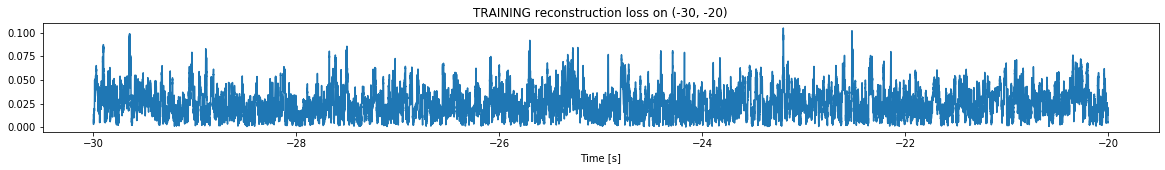

Finished training, median of the log(loss) is:  -1.651351287550309
Triggering for section:  (-20, -10)
Using this median for triggering: -1.7250254249809376
Triggering threshold is:  1.6


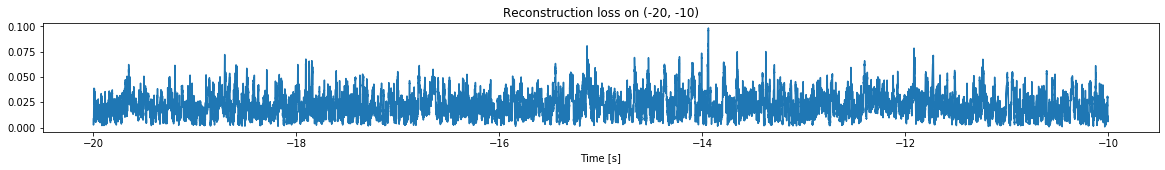

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


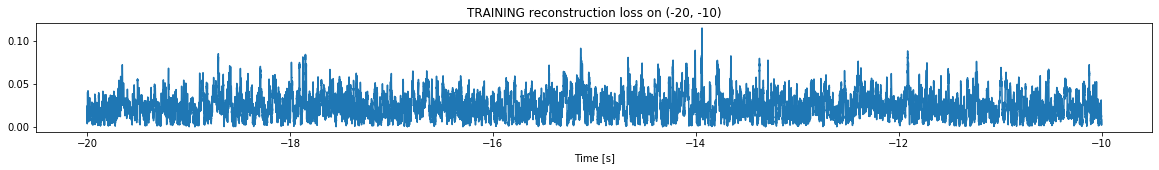

Finished training, median of the log(loss) is:  -1.6512395851023909
Triggering for section:  (-10, 0)
Using this median for triggering: -1.651351287550309
Triggering threshold is:  1.6


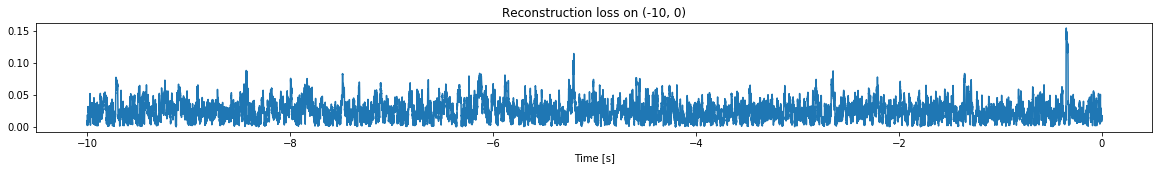

<--------
Finished simulation, all the triggered times are:  []


In [25]:
simulation("Ramp_10", "15T_data", 10,  time_range = (-50,0), reached_max = -2.75)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


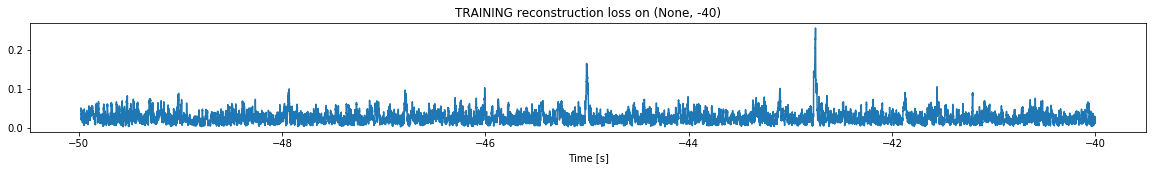

Finished training, median of the log(loss) is:  -1.6504359496071137
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


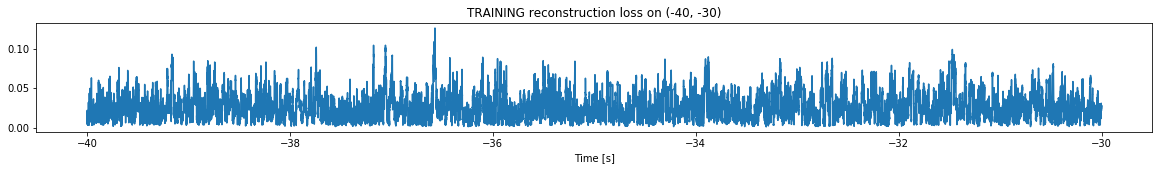

Finished training, median of the log(loss) is:  -1.6332351711243067
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6504359496071137
Triggering threshold is:  3.0


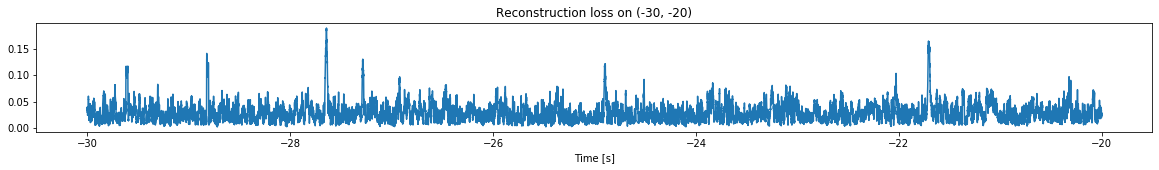

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


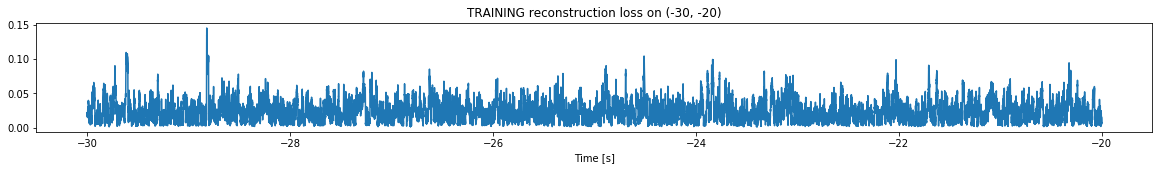

Finished training, median of the log(loss) is:  -1.6814856498438737
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6332351711243067
Triggering threshold is:  1.6


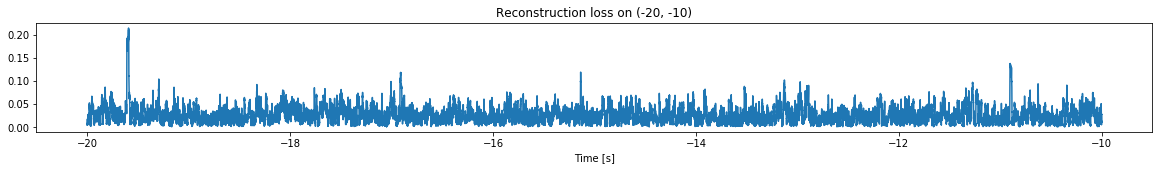

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


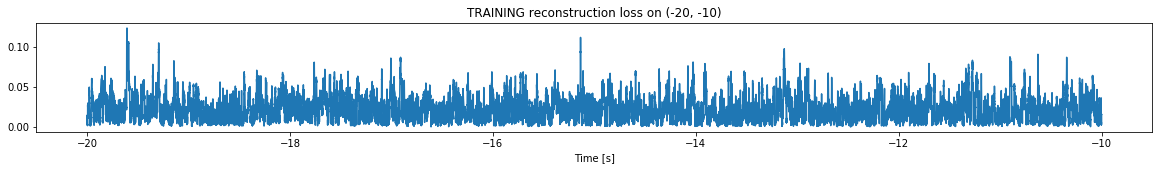

Finished training, median of the log(loss) is:  -1.7054255468757353
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6814856498438737
Triggering threshold is:  1.6


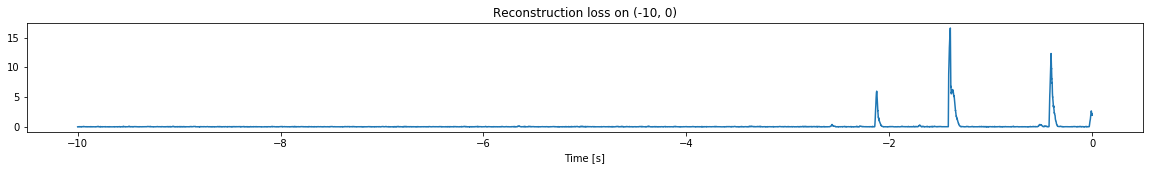

Other trigger time:  [-2.1239     -1.3987     -0.40559998]
Their log loss values are:  [2.45786715 2.90179158 2.77223041]


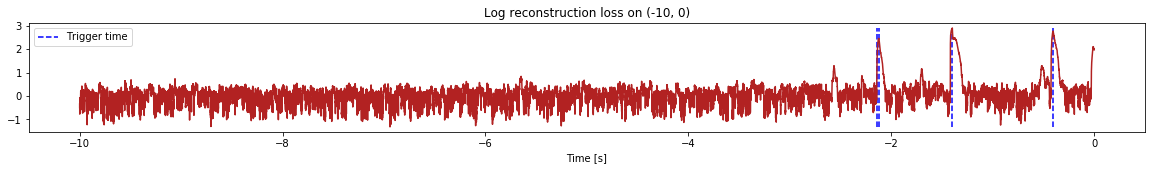

Triggered at:  [-2.1239, -1.3987, -0.40559998]
<--------
Finished simulation, all the triggered times are:  [-2.1239, -1.3987, -0.40559998]


In [26]:
simulation("Ramp_11", "15T_data", 10,  time_range = (-50,0), reached_max = -1.95)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


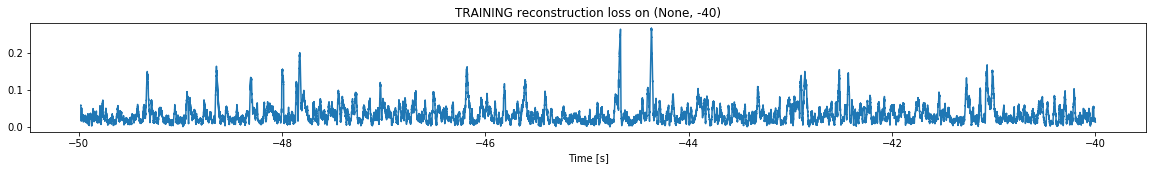

Finished training, median of the log(loss) is:  -1.548205411157845
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


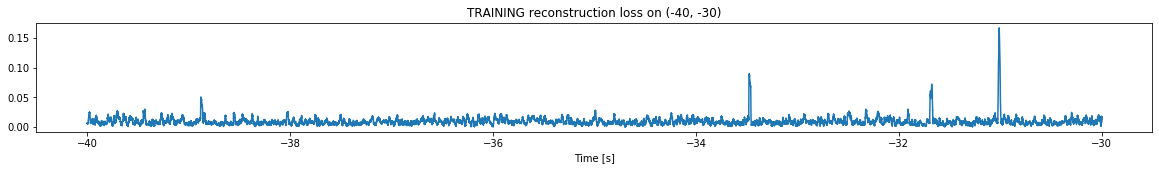

Finished training, median of the log(loss) is:  -2.073130583461878
Triggering for section:  (-30, -20)
Using this median for triggering: -1.548205411157845
Triggering threshold is:  3.0


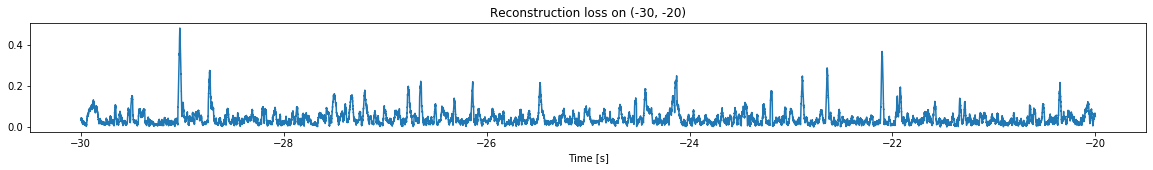

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


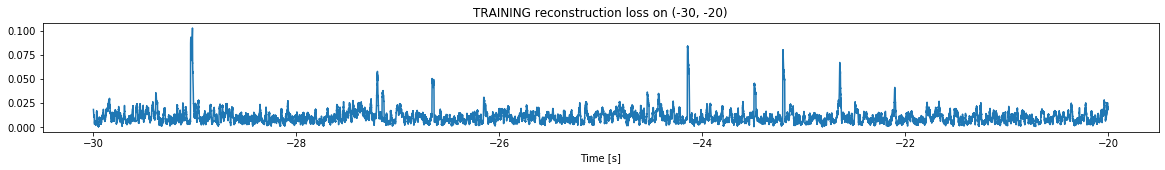

Finished training, median of the log(loss) is:  -2.024123899083681
Triggering for section:  (-20, -10)
Using this median for triggering: -2.073130583461878
Triggering threshold is:  1.6


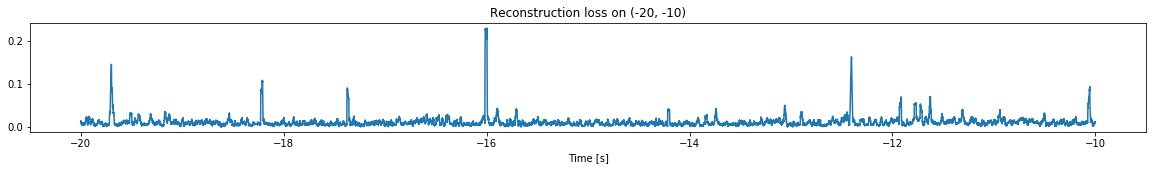

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


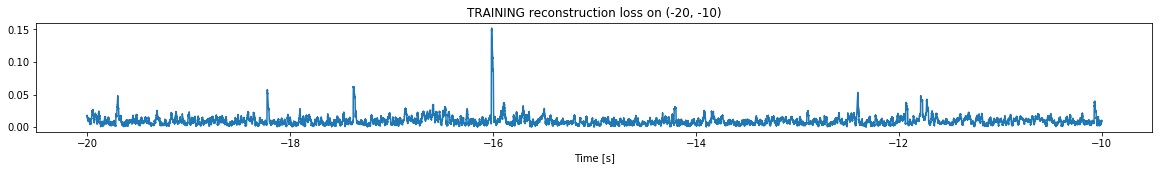

Finished training, median of the log(loss) is:  -2.085569531914258
Triggering for section:  (-10, 0)
Using this median for triggering: -2.024123899083681
Triggering threshold is:  1.6


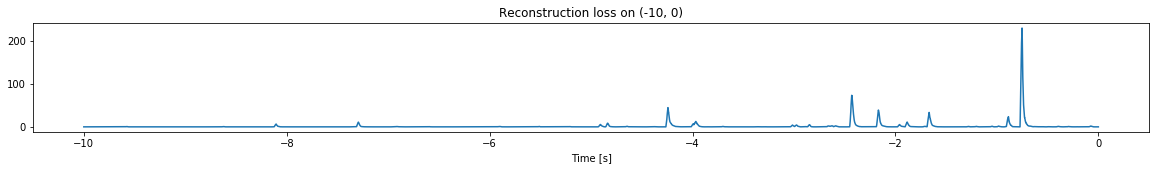

Other trigger time:  [-9.573999 -8.625899 -8.1044   -7.2935   -6.5983   -5.911    -4.8374
 -4.2426   -3.699    -2.9743   -2.431    -1.668    -0.7522   -0.0749  ]
Their log loss values are:  [1.9113971  1.93469037 2.84271229 3.06478345 1.71969905 1.99788258
 2.95664919 3.67287222 2.04754833 2.66599943 3.88795857 3.54815438
 4.3839436  2.34282422]


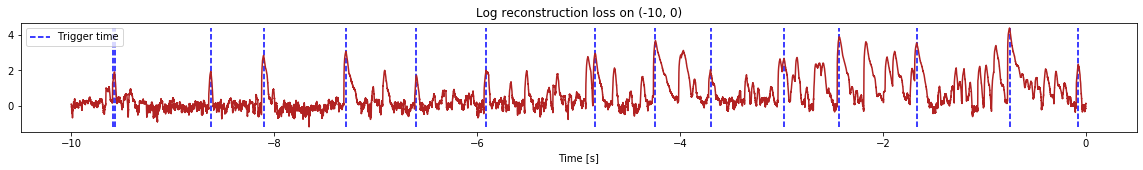

Triggered at:  [-9.573999, -8.625899, -8.1044, -7.2935, -6.5983, -5.911, -4.8374, -4.2426, -3.699, -2.9743, -2.431, -1.668, -0.7522, -0.0749]
<--------
Finished simulation, all the triggered times are:  [-9.573999, -8.625899, -8.1044, -7.2935, -6.5983, -5.911, -4.8374, -4.2426, -3.699, -2.9743, -2.431, -1.668, -0.7522, -0.0749]


In [27]:
simulation("Ramp_12", "15T_data", 10,  time_range = (-50,0), reached_max = -4.95)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


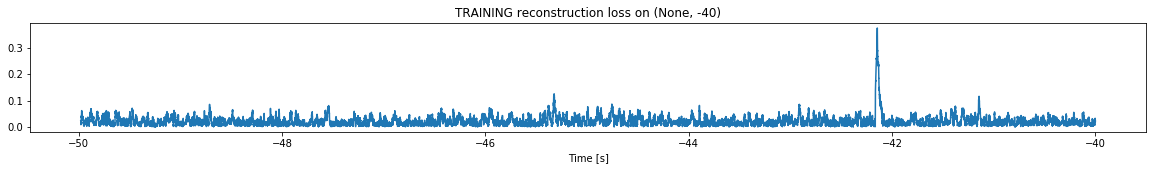

Finished training, median of the log(loss) is:  -1.7401075733111133
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


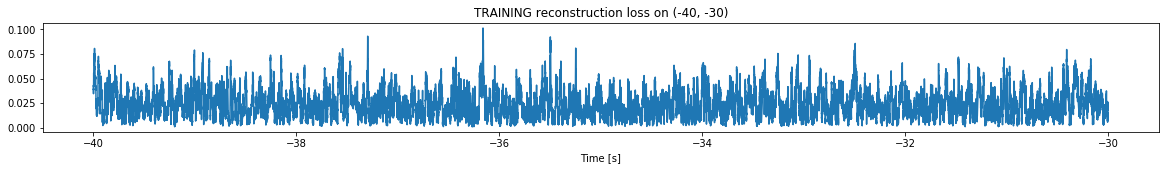

Finished training, median of the log(loss) is:  -1.6652361818632868
Triggering for section:  (-30, -20)
Using this median for triggering: -1.7401075733111133
Triggering threshold is:  3.0


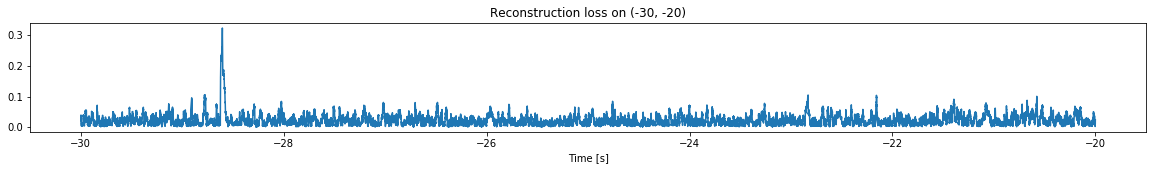

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


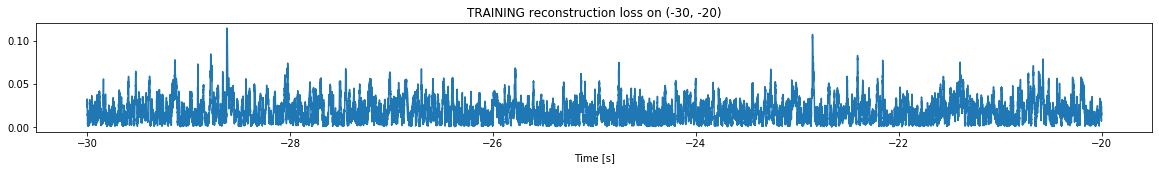

Finished training, median of the log(loss) is:  -1.7924482310123229
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6652361818632868
Triggering threshold is:  1.6


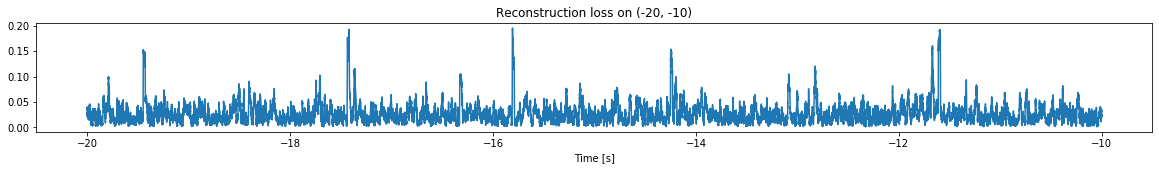

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


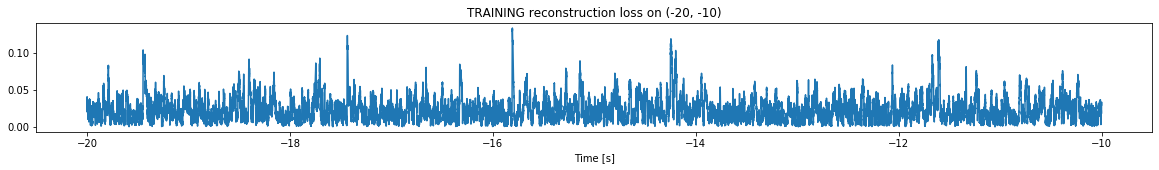

Finished training, median of the log(loss) is:  -1.694067493585571
Triggering for section:  (-10, 0)
Using this median for triggering: -1.7924482310123229
Triggering threshold is:  1.6


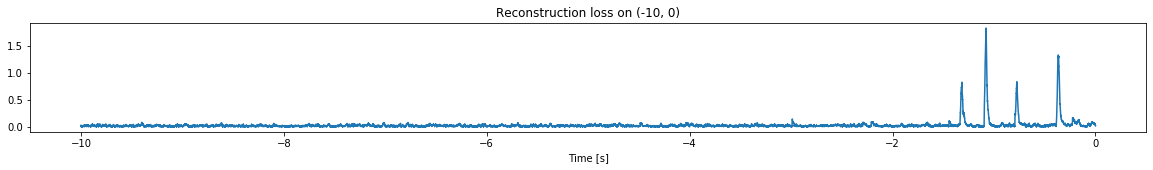

Other trigger time:  [-1.0781 -0.3664]
Their log loss values are:  [2.05614031 1.91784709]


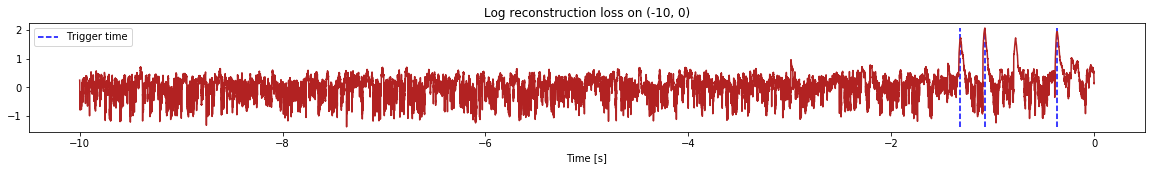

Triggered at:  [-1.0781, -0.3664]
<--------
Finished simulation, all the triggered times are:  [-1.0781, -0.3664]


In [11]:
simulation("Ramp_19", "15T_data", 10,  time_range = (-50,0), reached_max = -2.15)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


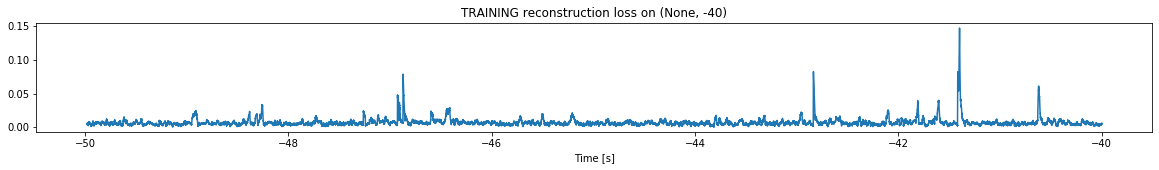

Finished training, median of the log(loss) is:  -2.2203010131097747
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


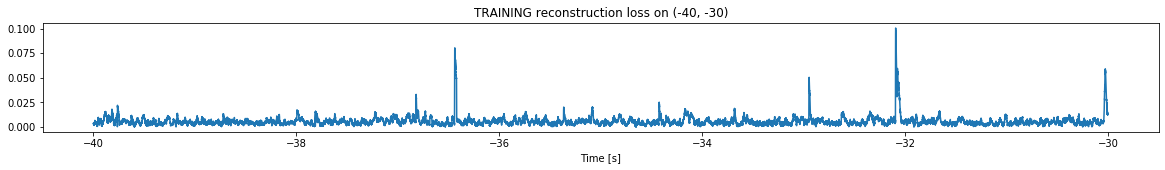

Finished training, median of the log(loss) is:  -2.30570615254779
Triggering for section:  (-30, -20)
Using this median for triggering: -2.2203010131097747
Triggering threshold is:  3.0


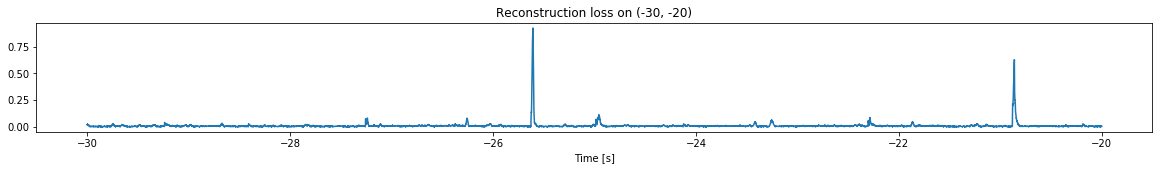

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


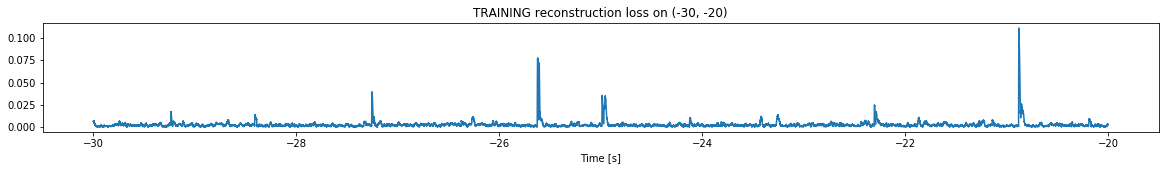

Finished training, median of the log(loss) is:  -2.706767222348873
Triggering for section:  (-20, -10)
Using this median for triggering: -2.30570615254779
Triggering threshold is:  1.6


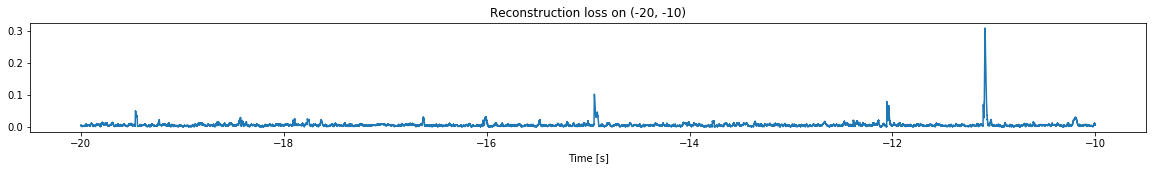

Other trigger time:  [-11.0868]
Their log loss values are:  [1.79568495]


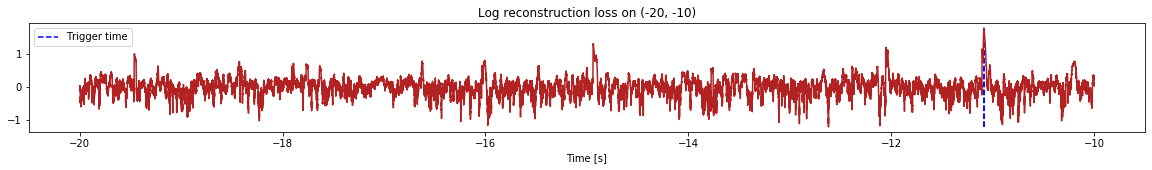

Triggered at:  [-11.0868]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


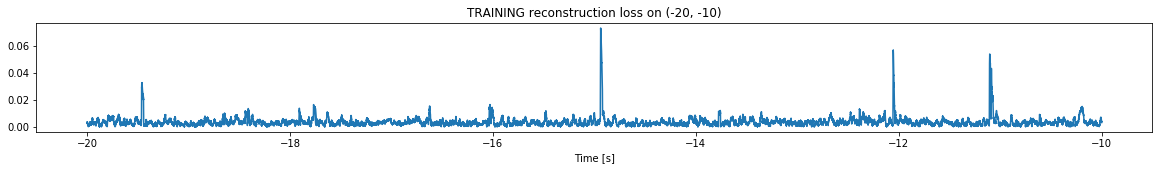

Finished training, median of the log(loss) is:  -2.5090595631995907
Triggering for section:  (-10, 0)
Using this median for triggering: -2.706767222348873
Triggering threshold is:  1.6


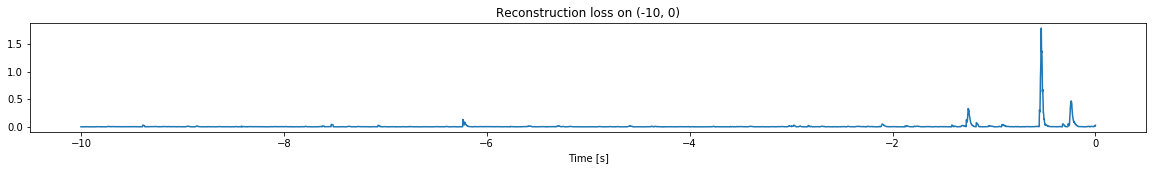

Other trigger time:  [-6.2345     -1.2544     -0.53459996]
Their log loss values are:  [1.82603638 2.23000824 2.95984159]


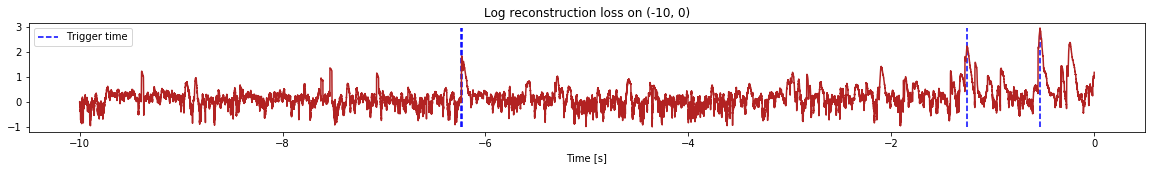

Triggered at:  [-6.2345, -1.2544, -0.53459996]
<--------
Finished simulation, all the triggered times are:  [-11.0868, -6.2345, -1.2544, -0.53459996]


In [12]:
simulation("Ramp_40", "15T_data", 10,  time_range = (-50,0), reached_max = -1.95)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


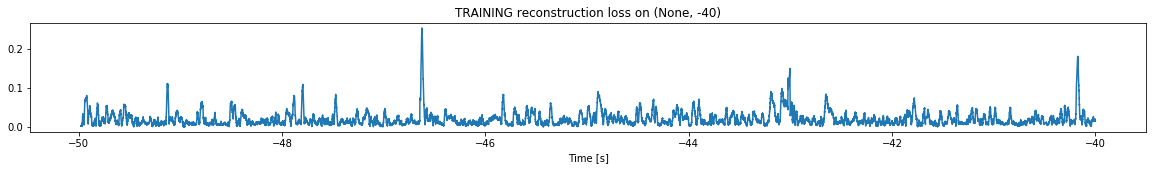

Finished training, median of the log(loss) is:  -1.8101278103762302
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


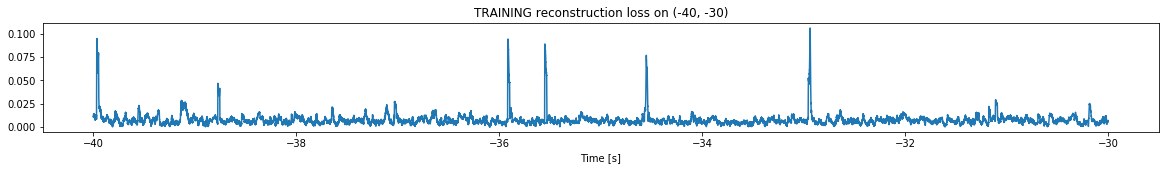

Finished training, median of the log(loss) is:  -2.1681654615058505
Triggering for section:  (-30, -20)
Using this median for triggering: -1.8101278103762302
Triggering threshold is:  3.0


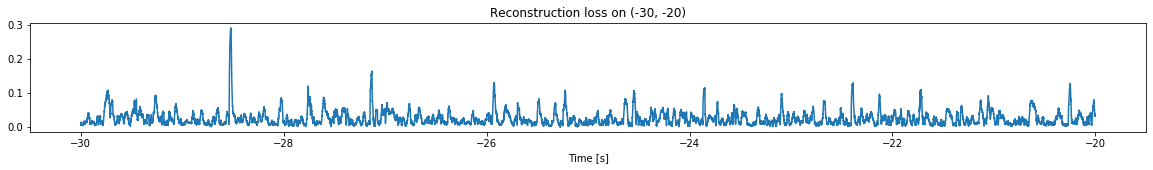

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


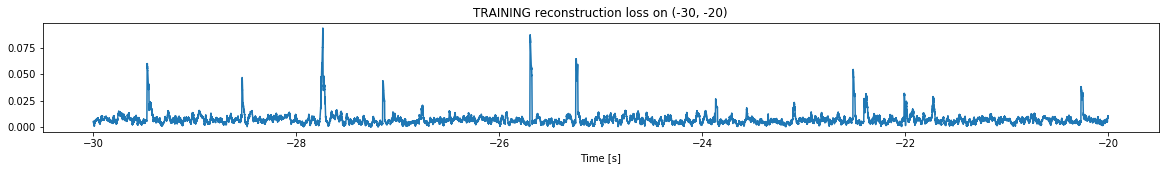

Finished training, median of the log(loss) is:  -2.196829907026226
Triggering for section:  (-20, -10)
Using this median for triggering: -2.1681654615058505
Triggering threshold is:  1.6


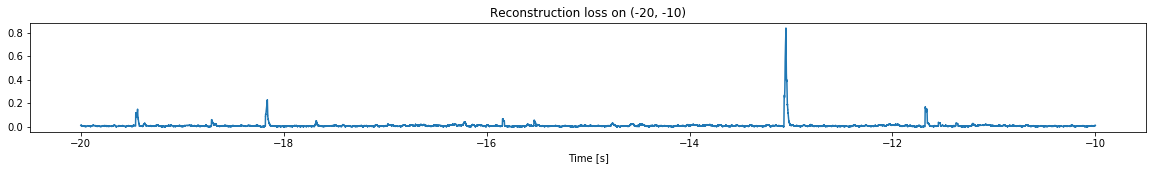

Other trigger time:  [-13.0497]
Their log loss values are:  [2.09276844]


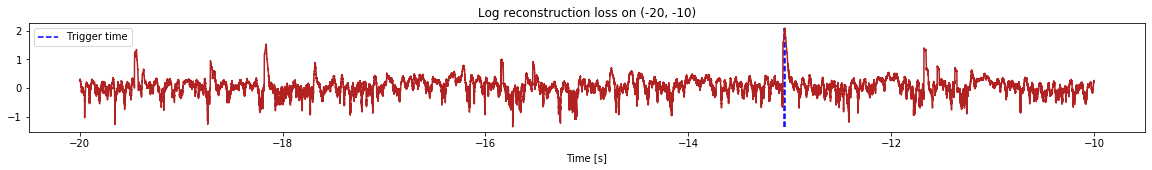

Triggered at:  [-13.0497]
<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


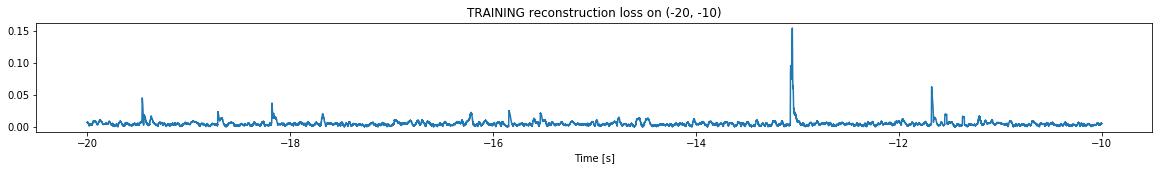

Finished training, median of the log(loss) is:  -2.3549754091428117
Triggering for section:  (-10, 0)
Using this median for triggering: -2.196829907026226
Triggering threshold is:  1.6


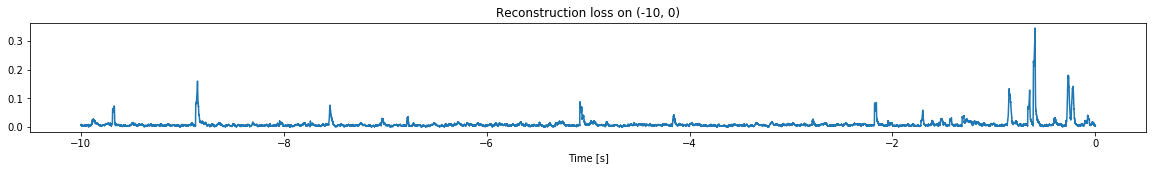

Other trigger time:  [-0.5936]
Their log loss values are:  [1.73643662]


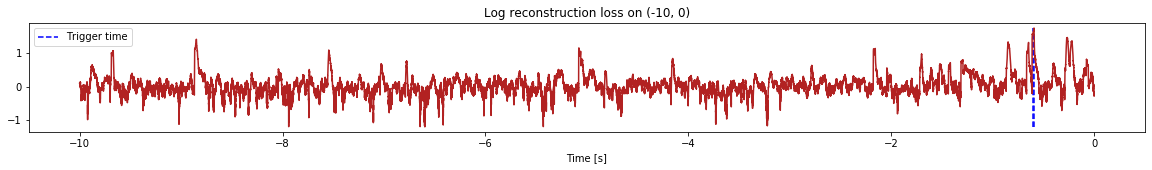

Triggered at:  [-0.5936]
<--------
Finished simulation, all the triggered times are:  [-13.0497, -0.5936]


In [13]:
simulation("Ramp_42", "15T_data", 10,  time_range = (-50,0), reached_max = -0.5)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


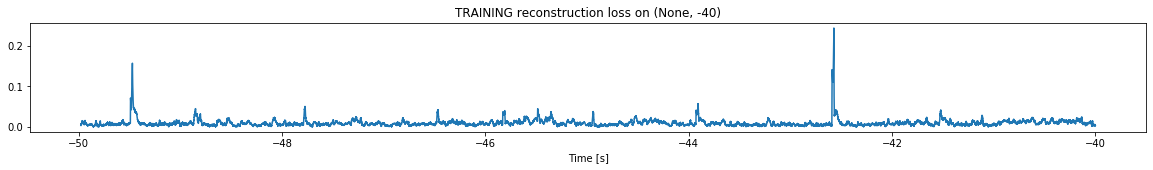

Finished training, median of the log(loss) is:  -2.0725533127835662
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


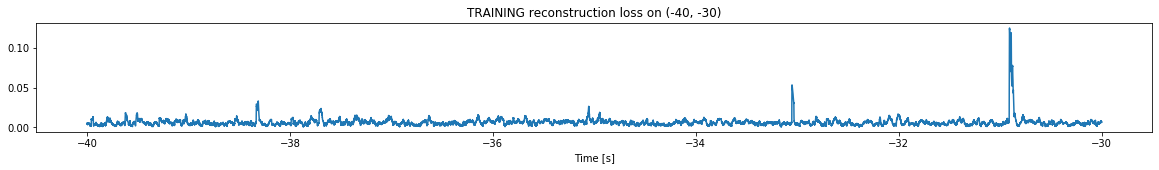

Finished training, median of the log(loss) is:  -2.246155589162399
Triggering for section:  (-30, -20)
Using this median for triggering: -2.0725533127835662
Triggering threshold is:  3.0


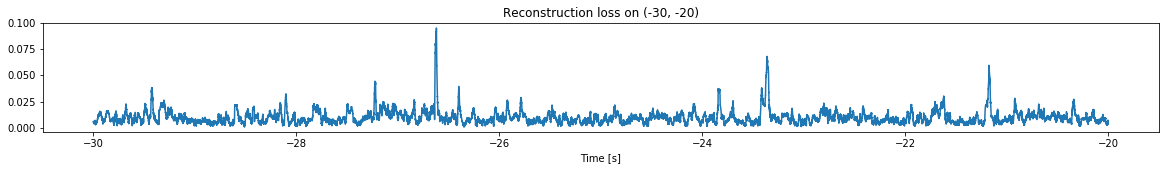

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


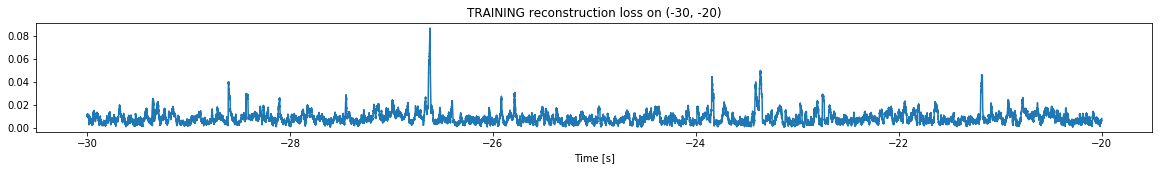

Finished training, median of the log(loss) is:  -2.10567942398224
Triggering for section:  (-20, -10)
Using this median for triggering: -2.246155589162399
Triggering threshold is:  1.6


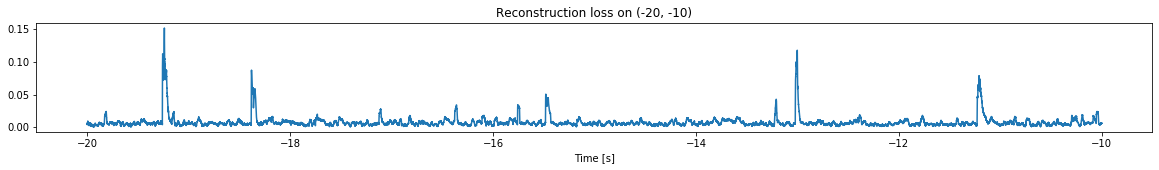

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


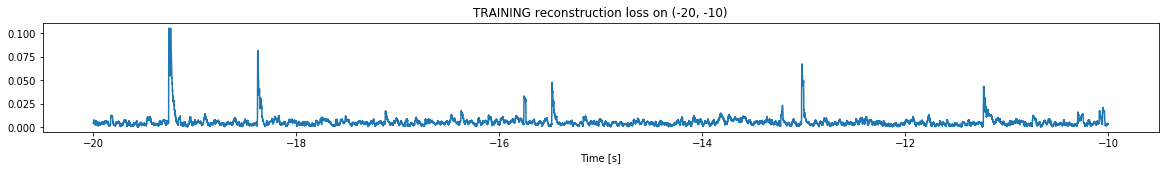

Finished training, median of the log(loss) is:  -2.321778602533458
Triggering for section:  (-10, 0)
Using this median for triggering: -2.10567942398224
Triggering threshold is:  1.6


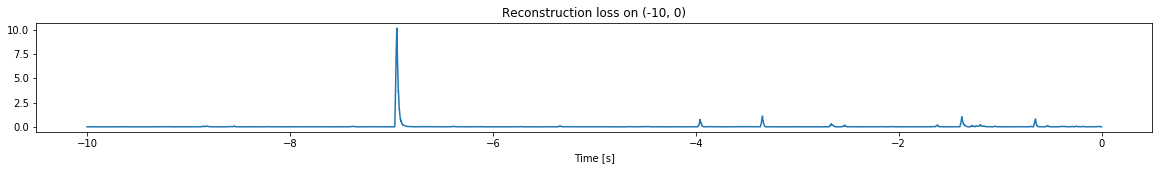

Other trigger time:  [-6.9467998 -3.9587998 -3.3423998 -2.666     -1.3766999 -0.6513   ]
Their log loss values are:  [3.11234564 1.98576863 2.15224819 1.6134342  2.12409994 2.01862707]


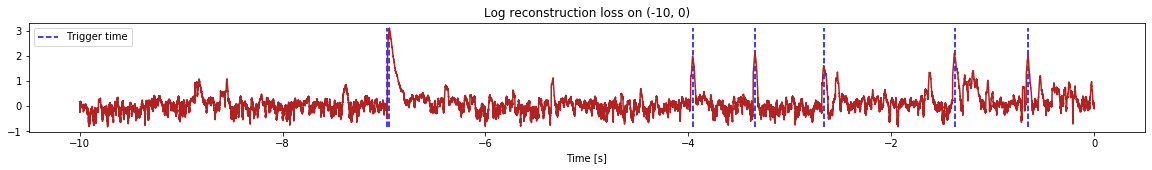

Triggered at:  [-6.9467998, -3.9587998, -3.3423998, -2.666, -1.3766999, -0.6513]
<--------
Finished simulation, all the triggered times are:  [-6.9467998, -3.9587998, -3.3423998, -2.666, -1.3766999, -0.6513]


In [14]:
simulation("Ramp_43", "15T_data", 10,  time_range = (-50,0), reached_max = -1.15)

Flushing input history
Flushing input history
Flushing input history
All data's shape:  (499800, 6)
Flushing input history
Number of sections: 5
Number of triggering sections 4
List of trigger thresholds:  [0, 0, 3.0, 1.6]
Entering sections:  (-50, -40)
-------->
Entering sections:  (-40, -30)
-------->
Training for section:  (None, -40)


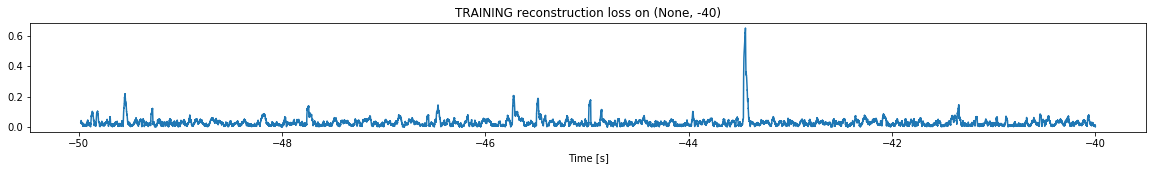

Finished training, median of the log(loss) is:  -1.6215651061785314
<--------
Entering sections:  (-30, -20)
-------->
Training for section:  (-40, -30)


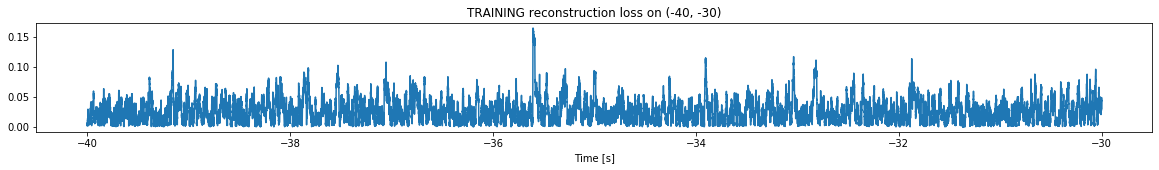

Finished training, median of the log(loss) is:  -1.6378510677496256
Triggering for section:  (-30, -20)
Using this median for triggering: -1.6215651061785314
Triggering threshold is:  3.0


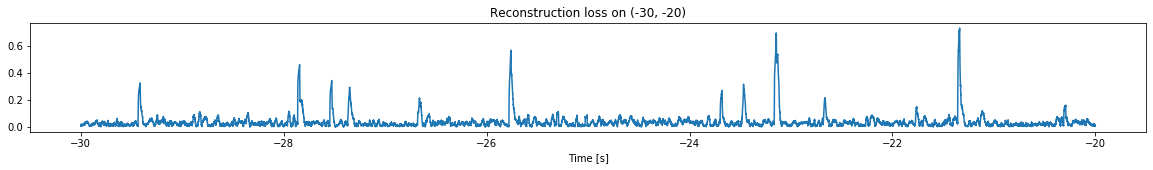

<--------
Entering sections:  (-20, -10)
-------->
Training for section:  (-30, -20)


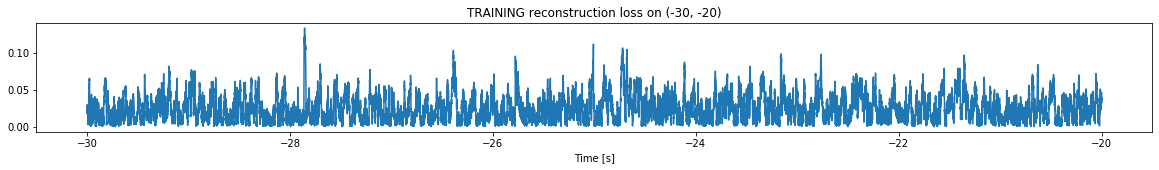

Finished training, median of the log(loss) is:  -1.6644026125614602
Triggering for section:  (-20, -10)
Using this median for triggering: -1.6378510677496256
Triggering threshold is:  1.6


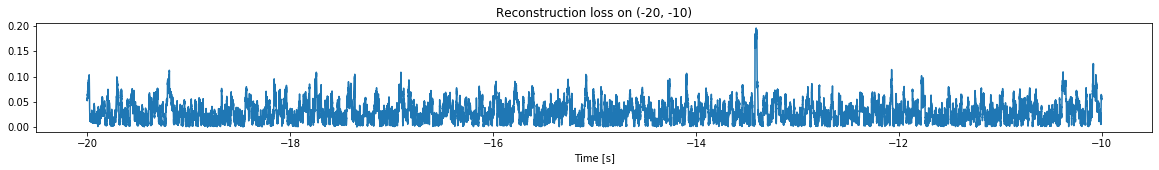

<--------
Entering sections:  (-10, 0)
-------->
Training for section:  (-20, -10)


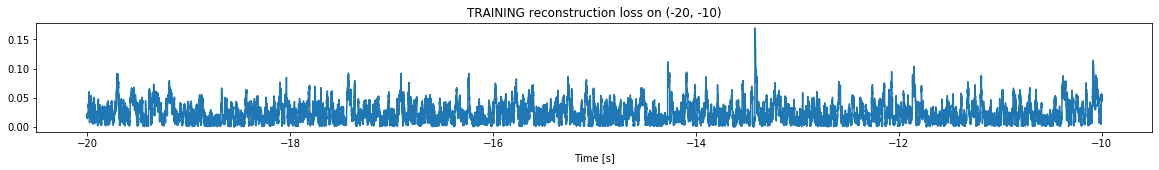

Finished training, median of the log(loss) is:  -1.699372874053467
Triggering for section:  (-10, 0)
Using this median for triggering: -1.6644026125614602
Triggering threshold is:  1.6


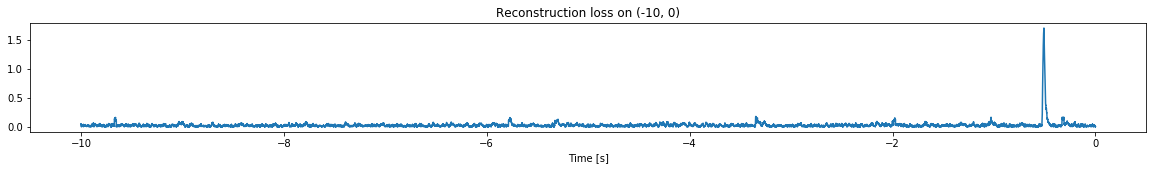

Other trigger time:  [-0.5081]
Their log loss values are:  [1.89804706]


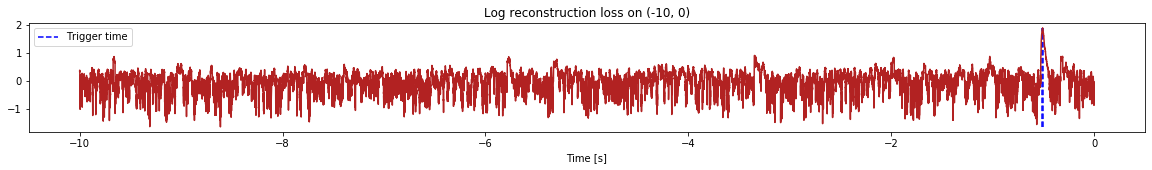

Triggered at:  [-0.5081]
<--------
Finished simulation, all the triggered times are:  [-0.5081]


In [15]:
simulation("Ramp_57", "15T_data", 10,  time_range = (-50,0), reached_max = -1.55)

---------

## Comparison between filtere and non-filtered data

In [40]:
!pwd

/uscms_data/d3/dhoang/quench-detector


In [39]:
!ls figures

MDPCT1b_filtered.pdf  MDPCT1b_non_filtered.pdf


In [30]:
f = h5py.File('Ramp_2-Sonesors__2020_Jun_12__09_26_32.mat','r')
data = np.array(f['x'], dtype = 'float16')

In [31]:
time_axis = np.load('15T_data' + "/time_axis/" + 'Ramp_2' + "_time.npy")

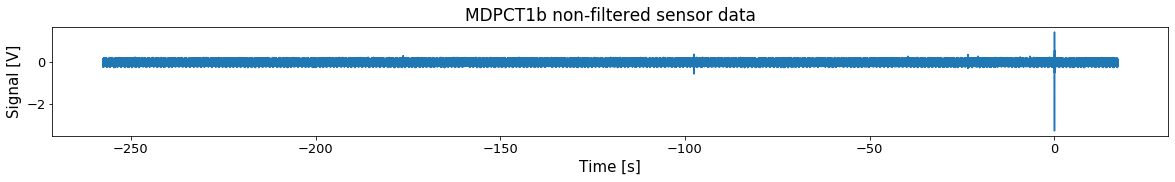

In [32]:
plt.figure(figsize=(20,2))
plt.plot(time_axis, data[0, :][::10])
plt.title("MDPCT1b non-filtered sensor data", fontsize = 17)
plt.ylabel("Signal [V]", fontsize = 15)
plt.xlabel("Time [s]", fontsize = 15)
plt.tick_params(axis='both', labelsize= 13)
plt.savefig("./figures/MDPCT1b_non_filtered.pdf", bbox_inches='tight')
plt.show()

In [33]:
## Filtered data
ramp_num = "Ramp_2"
dir_path = "15T_data"
sensor = 0

"""
Plot a sensor from mat data

Args:
 - ramp_num (str): ramp number
 - dir_path (str): path to directory containing all the ramp's data
 - sensor (int): sensor index (0 or 1)

Returns: None, just plot the sensor's data
"""

needed_file = None

#Scan the directory for correct ramp file
for filename in os.listdir(dir_path):
    if filename.startswith(ramp_num + '-'):
        needed_file = dir_path + "/" + filename

#Load the file
f = h5py.File(needed_file,'r')
data = np.array(f['chanvals'], dtype = 'float16')

#Load time
time_axis = np.load(dir_path + "/time_axis/" + ramp_num + "_time.npy")

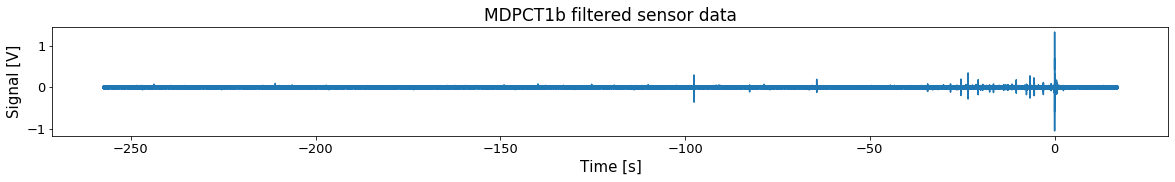

In [35]:
plt.figure(figsize = (20,2))
plt.plot(time_axis, data[sensor, :])
plt.title("MDPCT1b filtered sensor data", fontsize = 17)
plt.ylabel("Signal [V]", fontsize = 15)
plt.xlabel("Time [s]", fontsize = 15)
plt.tick_params(axis='both', labelsize= 13)
plt.savefig("./figures/MDPCT1b_filtered.pdf", bbox_inches='tight')
plt.show()